In [1]:
import numpy as np
import pandas as pd
import datetime as datetime
#import pandas_datareader.data as web
#import quandl
import blpapi
from xbbg import blp
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import utils

import seaborn as sns

import CLO_SQL_Updated as cs



In [2]:
dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
file = 'EQ Comparison.xlsx'
tab = 'bbTickers'


In [3]:
pd.options.display.precision
pd.options.display.float_format = '{:,.4f}'.format

6

# Strategy Level 1

In [203]:
def preprocessGSSData(asdate):
    dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
    fileSL = f'Strategy Level 1 View {asdate}.xlsx'
    # drops any names without weight, these are alladin house keeping lines
    unclean = pd.read_excel(dirpath+fileSL,skiprows=3).dropna(subset=['Market Value %'])

    #egpath = "Z:\\Shared\\Risk Management and Investment Technology\\Equity Risk Modeling\\"
    mmap = pd.read_excel(dirpath+'MasterMap4GSS_orig.xlsx',sheet_name='MMAP')
    #mmap.dropna(subset=['BBTicker'],inplace=True)
    
    mask = unclean['CUSIP'].isnull()
    stocks = unclean.loc[~mask]   # all the rows with CUSIPs
    
    # grap the style buckets and clean up the name list
    maskG = unclean['Level']==3
    groups = unclean.loc[maskG]
    group_names = groups['Filter Level 2'].dropna().unique().tolist()
    for nm in ['CASH','Unassigned']:
        group_names.remove(nm)
    
    maskA = unclean['Level']==0   # all the positions
    stocksA = unclean.loc[maskA]
    
    if len(stocks) != len(stocksA):
        # this should match as the CUSIPs come from Alladin's system
        print('Warning, not all CUSIPs for stocks')
          
    stocks.rename(columns={'CUSIP':'ACUSIP'},inplace=True)
    
    #mmap.drop(columns=['Security Description'],inplace=True)
    stocks = stocks.merge(mmap,left_on='ACUSIP',right_on='ACUSIP',how='left')
    
    return stocks, group_names

In [204]:
stocks, group_names = preprocessGSSData('03-03-22')
stocks
group_names

C:\Users\jknechtel\Miniconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Security Description Filter Level 1    Filter Level 2  \
0              10X GENOMICS INC CLASS A          ONGSS   FAILURE MODEL A   
1                  1LIFE HEALTHCARE INC          ONGSS   FAILURE MODEL A   
2                       3D SYSTEMS CORP          ONGSS       SHORT ALPHA   
3                          ACCOLADE INC          ONGSS       IPO&HD beta   
4              ACV AUCTIONS INC CLASS A          ONGSS       IPO&HD beta   
..                                  ...            ...               ...   
117            WILLIS TOWERS WATSON PLC          ONGSS  LOW VOL, QUALITY   
118  WILLSCOT MOBILE MINI HOLDINGS CORP          ONGSS  CYCLICAL/QUALITY   
119                       WOLFSPEED INC          ONGSS   FAILURE MODEL A   
120                      XP CLASS A INC          ONGSS   FAILURE MODEL A   
121                         ZENDESK INC          ONGSS   FAILURE MODEL A   

                   Filter Level 3  Level     ACUSIP   Price  Market Value %  \
0        10X GENOMICS INC-CLASS A    0.0  88025U109 7.7e+01        -0.00019   
1            1LIFE HEALTHCARE INC    0.0  68269G107 1.1e+01        -0.00021   
2                 3D SYSTEMS CORP    0.0  88554D205 1.7e+01         -0.0033   
3                    ACCOLADE INC    0.0  00437E102 1.6e+01        -0.00042   
4              ACV AUCTIONS INC-A    0.0  00091G104 1.4e+01        -0.00046   
..                            ...    ...        ...     ...             ...   
117      WILLIS TOWERS WATSON PLC    0.0  BRSYCC972 2.2e+02           0.021   
118  WILLSCOT MOBILE MINI HOLDING    0.0  971378104 3.7e+01            0.13   
119                 WOLFSPEED INC    0.0  977852102   1e+02        -0.00028   
120              XP INC - CLASS A    0.0  SBK4Y0520 3.2e+01        -0.00038   
121                   ZENDESK INC    0.0  98936J101 1.2e+02         -0.0004   

     Current Face (m)  Market Value (m)  Risk Contribution %  \
0              -1e+03          -9.7e+04             -0.00041   
1            -7.6e+03          -1.1e+05             -0.00045   
2              -8e+04          -1.7e+06              -0.0062   
3              -1e+04          -2.2e+05             -0.00094   
4            -1.4e+04          -2.4e+05             -0.00096   
..                ...               ...                  ...   
117           3.8e+04           1.1e+07                0.018   
118           1.4e+06           6.6e+07                 0.23   
119          -1.1e+03          -1.5e+05             -0.00042   
120          -4.9e+03            -2e+05             -0.00052   
121          -1.3e+03          -2.1e+05             -0.00045   

     Risk Contribution       X   Sigma  Rho           BBCUSIP BBTicker  \
0                -0.55  -0.019 5.8e+03 0.51  88025U109 Equity      NaN   
1                -0.61  -0.021 6.2e+03 0.48  68269G107 Equity      NaN   
2                 -8.4   -0.33 7.2e+03 0.35  88554D205 Equity   DDD US   
3                 -1.3  -0.042 6.4e+03 0.48  00437E102 Equity      NaN   
4                 -1.3  -0.046 7.3e+03 0.38  00091G104 Equity      NaN   
..                 ...     ...     ...  ...               ...      ...   
117            2.4e+01     2.1 2.6e+03 0.44               NaN      NaN   
118              3e+02 1.3e+01 3.4e+03 0.71  971378104 Equity   WSC US   
119              -0.56  -0.028 5.4e+03 0.38  977852102 Equity      NaN   
120              -0.71  -0.038 5.8e+03 0.33    BK4Y052 Equity      NaN   
121              -0.61   -0.04 4.9e+03 0.31  98936J101 Equity      NaN   

             Bbcall  
0     TXG US Equity  
1    ONEM US Equity  
2     DDD US Equity  
3    ACCD US Equity  
4    ACVA US Equity  
..              ...  
117   WTW US Equity  
118   WSC US Equity  
119  WOLF US Equity  
120    XP US Equity  
121   ZEN US Equity  

[122 rows x 18 columns]

['IDIOSYNCRATIC',
 'GARP GROWTH',
 'CYCLICAL/QUALITY',
 'SHORT CYCLE',
 'LOW VOL, QUALITY',
 'DURATION',
 'FX HEDGE',
 'VALUE',
 'RE-OPEN',
 'DISCRETIONARY',
 'FAILURE MODEL A',
 'SHORT HEDGE',
 'IPO&HD beta',
 'SHORT ALPHA',
 'BETA']

In [149]:
#stocks['ACUSIP'].to_excel(dirpath+'MasterMap4GSS.xlsx',sheet_name='CUSIPs')

In [205]:
#stocks = stocks.merge(mmap,left_on='ACUSIP',right_on='ACUSIP',how='left')
missing = stocks.loc[stocks['BBCUSIP'].isna(),'ACUSIP']
missing = missing.str.lstrip('S')
missing = missing[~missing.str.match('BEN')]
missing

def checkMissingCUSIPs(stocks):
    missing = stocks.loc[stocks['BBCUSIP'].isna(),'ACUSIP']
    #missing = missing.str.lstrip('S')
    missing = missing[~missing.str.match('BEN')]
    missing = missing.loc[~missing.isin(['CAD_ICASH','XCAD00009','XINR00001','XUSD00000'])] 
    bbcall = missing.str.lstrip('S') + ' Equity'
    return missing, bbcall

24     XCAD00009
28      BJXM6072
29     CAD_ICASH
58     XINR00001
112    XUSD00000
117    BRSYCC972
Name: ACUSIP, dtype: object

In [188]:
missing = stocks.loc[stocks['BBCUSIP'].isna(),'ACUSIP']
missing = missing[~missing.str.match('BEN')]
missing = missing.loc[~missing.isin(['CAD_ICASH','XCAD00009','XINR00001','XUSD00000'])] 
missing

5      03769M106
9      SB57FG047
15     90353T100
29     918204108
32     550021109
         ...    
109    SBMYZ2B95
110    058586108
114    00165C104
117    36467W109
118    76954A103
Name: ACUSIP, Length: 77, dtype: object

In [190]:
bbcall #= missing.str.lstrip('S') + ' Equity'

5      03769M106 Equity
9       B57FG047 Equity
15     90353T100 Equity
29     918204108 Equity
32     550021109 Equity
             ...       
109     BMYZ2B95 Equity
110    058586108 Equity
114    00165C104 Equity
117    36467W109 Equity
118    76954A103 Equity
Name: ACUSIP, Length: 77, dtype: object

In [197]:
# 112
dirpath = "Z:\\Shared\\Risk Management and Investment Technology\\Equity Risk Modeling\\"
mmap = pd.read_excel(dirpath+'MasterMap4GSS_orig.xlsx',sheet_name='MMAP')
mmap

ACUSIP           BBCUSIP     BBTicker              Bbcall
0    21240E105  21240E105 Equity      VLRS US      VLRS US Equity
1    SB7FNMQ21    B7FNMQ2 Equity       EFN CN       EFN CN Equity
2    SBDCG2C28    BDCG2C2 Equity       ATZ CN       ATZ CN Equity
3    00187Y100  00187Y100 Equity       APG US       APG US Equity
4    08579W103  08579W103 Equity      BERY US      BERY US Equity
..         ...               ...          ...                 ...
107  36467W109  36467W109 Equity          NaN                 NaN
108  76954A103  76954A103 Equity          NaN                 NaN
109  78464A698  78464A698 Equity       KRE US       KRE US Equity
110  78355W106  78355W106 Equity  9000039D US  9000039D US Equity
111  78462F103  78462F103 Equity       SPY US       SPY US Equity

[112 rows x 4 columns]

In [198]:
eq_prices = blp.bdh(tickers=mmap['BBCUSIP'] , flds=['RT117'],start_date=sdate, end_date=date)
eq_prices

21240E105 Equity B7FNMQ2 Equity BDCG2C2 Equity 00187Y100 Equity  \
                      RT117          RT117          RT117            RT117   
2021-03-17          1.6e+01        1.4e+01          3e+01          2.1e+01   
2021-03-18          1.5e+01        1.4e+01          3e+01            2e+01   
2021-03-19          1.5e+01        1.4e+01        3.1e+01            2e+01   
2021-03-22          1.5e+01        1.4e+01        3.1e+01            2e+01   
2021-03-23          1.4e+01        1.4e+01          3e+01          1.9e+01   
...                     ...            ...            ...              ...   
2022-02-28          1.9e+01        1.3e+01        4.8e+01          2.2e+01   
2022-03-01          1.8e+01        1.2e+01        4.7e+01          2.1e+01   
2022-03-02          1.7e+01        1.3e+01        4.7e+01          2.1e+01   
2022-03-03          1.7e+01        1.3e+01        4.6e+01          2.1e+01   
2022-03-04          1.6e+01        1.3e+01        4.5e+01            2e+01   

           08579W103 Equity 03769M106 Equity 30303M102 Equity BYY88Y7 Equity  \
                      RT117            RT117            RT117          RT117   
2021-03-17          5.9e+01          4.8e+01          2.8e+02        2.1e+03   
2021-03-18          5.9e+01          4.7e+01          2.8e+02          2e+03   
2021-03-19          5.8e+01          4.7e+01          2.9e+02          2e+03   
2021-03-22            6e+01          4.9e+01          2.9e+02          2e+03   
2021-03-23          6.2e+01          4.9e+01          2.9e+02        2.1e+03   
...                     ...              ...              ...            ...   
2022-02-28          6.1e+01          6.7e+01          2.1e+02        2.7e+03   
2022-03-01          5.8e+01          6.4e+01            2e+02        2.7e+03   
2022-03-02          5.9e+01          6.7e+01          2.1e+02        2.7e+03   
2022-03-03          5.9e+01          6.7e+01            2e+02        2.7e+03   
2022-03-04          5.7e+01          6.6e+01            2e+02        2.6e+03   

           971378104 Equity 25278X109 Equity  ... 03782L101 Equity  \
                      RT117            RT117  ...            RT117   
2021-03-17          2.8e+01          8.1e+01  ...          1.7e+02   
2021-03-18          2.7e+01          7.5e+01  ...          1.5e+02   
2021-03-19          2.7e+01          7.6e+01  ...          1.5e+02   
2021-03-22          2.6e+01          7.5e+01  ...          1.6e+02   
2021-03-23          2.5e+01          7.2e+01  ...          1.5e+02   
...                     ...              ...  ...              ...   
2022-02-28          3.6e+01          1.4e+02  ...          6.1e+01   
2022-03-01          3.4e+01          1.4e+02  ...            6e+01   
2022-03-02          3.7e+01          1.4e+02  ...            6e+01   
2022-03-03          3.7e+01          1.4e+02  ...          5.8e+01   
2022-03-04          3.7e+01          1.4e+02  ...          5.5e+01   

           BJXM607 Equity 87663X102 Equity 00165C104 Equity 52567D107 Equity  \
                    RT117            RT117            RT117            RT117   
2021-03-17        1.7e+02          2.2e+01          1.4e+01            1e+02   
2021-03-18        1.7e+02          2.1e+01          1.4e+01          9.6e+01   
2021-03-19        1.7e+02          2.1e+01          1.4e+01            1e+02   
2021-03-22        1.7e+02            2e+01          1.2e+01          9.9e+01   
2021-03-23        1.7e+02            2e+01          1.1e+01          9.6e+01   
...                   ...              ...              ...              ...   
2022-02-28        1.8e+02          1.2e+01          1.9e+01          2.5e+01   
2022-03-01        1.9e+02          1.3e+01          1.8e+01          2.4e+01   
2022-03-02        1.9e+02          1.3e+01          1.9e+01          2.2e+01   
2022-03-03        1.9e+02          1.3e+01          1.8e+01            2e+01   
2022-03-04        1.8e+02          1.2e+01          1.7e+01            2e+01   

   

In [200]:
stash = mmap['BBCUSIP']

stash.loc[~stash.isin(eq_prices.columns)]

9       B57FG047 Equity
10       5636927 Equity
16       BKM1QM4 Equity
22     550021109 Equity
23      BYP3H111 Equity
38     60468T105 Equity
41     697900108 Equity
42      BFZ1K461 Equity
55      BK4Y0520 Equity
57      BYSS4X46 Equity
62      33195215 Equity
87      BP6MXT41 Equity
99      BMYZ2B95 Equity
110    78355W106 Equity
Name: BBCUSIP, dtype: object

In [199]:
eq_prices = eq_prices.droplevel(1,axis=1)

In [167]:
matching = blp.bdh(tickers=bbcall , flds=['RT117'],start_date=sdate, end_date=date)

In [175]:
matching = matching.droplevel(1,axis=1)
matching.columns

Index(['03769M106 Equity', '90353T100 Equity', '918204108 Equity',
       '02553E106 Equity', '136681202 Equity', '969904101 Equity',
       '253393102 Equity', '049560105 Equity', 'G2519Y108 Equity',
       '28414H103 Equity', '44107P104 Equity', '57060D108 Equity',
       '874054109 Equity', '05478C105 Equity', '45784P101 Equity',
       '70975L107 Equity', '50187A107 Equity', '64049M209 Equity',
       '15677J108 Equity', '88025U109 Equity', '336433107 Equity',
       '977852102 Equity', '40131M109 Equity', '462260100 Equity',
       '98936J101 Equity', '68269G107 Equity', '64157F103 Equity',
       '67181A107 Equity', '848637104 Equity', '46185L103 Equity',
       '683712103 Equity', '358039105 Equity', '163092109 Equity',
       '12769G100 Equity', '83417M104 Equity', '450056106 Equity',
       '136635109 Equity', 'G5005R107 Equity', '45782B104 Equity',
       '761330109 Equity', '819047101 Equity', '687793109 Equity',
       '22266M104 Equity', '45332Y109 Equity', '04271T100 Equi

In [ ]:
bbcall.loc[~bbcall.isin(matching.columns)] 

In [181]:
need_to_find = bbcall.loc[~bbcall.isin(matching.columns)]   #['ACUSIP']
need_to_find= need_to_find.loc[~need_to_find.isin(['CAD_ICASH Equity','XCAD00009 Equity','XINR00001 Equity','XUSD00000 Equity'])] 
need_to_find
#for nm in ['CAD_ICASH Equity','XCAD00009 Equity','XINR00001 Equity','XUSD00000 Equity']:
#    need_to_find.remove(nm)

9       B57FG047 Equity
25     CAD_ICASH Equity
26     XCAD00009 Equity
27     XINR00001 Equity
28     XUSD00000 Equity
32     550021109 Equity
33      BYP3H111 Equity
48     60468T105 Equity
51     697900108 Equity
52      BFZ1K461 Equity
65      BK4Y0520 Equity
67      BYSS4X46 Equity
72      33195215 Equity
97      BP6MXT41 Equity
109     BMYZ2B95 Equity
Name: ACUSIP, dtype: object

In [183]:
need_to_find= need_to_find.loc[~need_to_find.isin(['CAD_ICASH Equity','XCAD00009 Equity','XINR00001 Equity','XUSD00000 Equity'])] 

9       B57FG047 Equity
32     550021109 Equity
33      BYP3H111 Equity
48     60468T105 Equity
51     697900108 Equity
52      BFZ1K461 Equity
65      BK4Y0520 Equity
67      BYSS4X46 Equity
72      33195215 Equity
97      BP6MXT41 Equity
109     BMYZ2B95 Equity
Name: ACUSIP, dtype: object

In [160]:
miss_cusips = miss_cusips[~miss_cusips.str.match('BEN')]

In [135]:
mmap.drop(columns=['Security Description'],inplace=True)
stocks = stocks.merge(mmap,left_on='ACUSIP',right_on='ACUSIP',how='left')
stocks

Security Description Filter Level 1    Filter Level 2  \
0   CONTROLADORA VUELA COMPANIA ADR RE          ONGSS     IDIOSYNCRATIC   
1        ELEMENT FLEET MANAGEMENT CORP          ONGSS     IDIOSYNCRATIC   
2       ARITZIA SUBORDINATE VOTING INC          ONGSS     IDIOSYNCRATIC   
3                       API GROUP CORP          ONGSS     IDIOSYNCRATIC   
4               BERRY GLOBAL GROUP INC          ONGSS     IDIOSYNCRATIC   
5           META PLATFORMS INC CLASS A          ONGSS       GARP GROWTH   
6                 ALPHABET INC CLASS C          ONGSS       GARP GROWTH   
7   WILLSCOT MOBILE MINI HOLDINGS CORP          ONGSS  CYCLICAL/QUALITY   
8                      THYSSENKRUPP AG          ONGSS       SHORT CYCLE   
9               DIAMONDBACK ENERGY INC          ONGSS       SHORT CYCLE   
10                     AON PLC CLASS A          ONGSS  LOW VOL, QUALITY   
11  FIDELITY NATIONAL INFORMATION SERV          ONGSS  LOW VOL, QUALITY   
12            WILLIS TOWERS WATSON PLC          ONGSS  LOW VOL, QUALITY   
13            JUST EAT TAKEAWAY.COM NV          ONGSS          DURATION   
14                      NRG ENERGY INC          ONGSS             VALUE   
15                             ARAMARK          ONGSS           RE-OPEN   
16                     CANADIAN DOLLAR          ONGSS              CASH   
17                UNITED STATES DOLLAR          ONGSS              CASH   
18                             KELLOGG          ONGSS     DISCRETIONARY   
19                   GENERAL MILLS INC          ONGSS     DISCRETIONARY   
20         AMERICAN AIRLINES GROUP INC          ONGSS       SHORT HEDGE   
21                 DELTA AIR LINES INC          ONGSS       SHORT HEDGE   
22        UNITED AIRLINES HOLDINGS INC          ONGSS       SHORT HEDGE   
23               HAWAIIAN HOLDINGS INC          ONGSS       SHORT HEDGE   
24          APARTMENT INCOME REIT CORP          ONGSS       SHORT ALPHA   
25                       TRUPANION INC          ONGSS       SHORT ALPHA   
26                  FASTLY INC CLASS A          ONGSS       SHORT ALPHA   
27                 FUELCELL ENERGY INC          ONGSS       SHORT ALPHA   
28             CLEAN ENERGY FUELS CORP          ONGSS       SHORT ALPHA   
29                 APPIAN CORP CLASS A          ONGSS       SHORT ALPHA   
30                        CARGOJET INC          ONGSS       SHORT ALPHA   
31           TATTOOED CHEF INC CLASS A          ONGSS       SHORT ALPHA   
32                        LEMONADE INC          ONGSS       SHORT ALPHA   
33                     3D SYSTEMS CORP          ONGSS       SHORT ALPHA   
34       SPDR S&P REGIONAL BANKING ETF          ONGSS              BETA   
35           INVESCO S&P  EQL WGHT ETF          ONGSS              BETA   
36                 SPDR S&P  ETF TRUST          ONGSS              BETA   

                  Filter Level 3  Level     ACUSIP   Price  Market Value %  \
0     CONTROLADORA VUELA CIA-ADR    0.0  21240E105 1.7e+01            0.06   
1   ELEMENT FLEET MANAGEMENT COR    0.0  SB7FNMQ21 1.3e+01           0.051   
2   ARITZIA INC-SUBORDINATE VOTI    0.0  SBDCG2C28 4.7e+01           0.027   
3                 API GROUP CORP    0.0  00187Y100 2.1e+01            0.03   
4         BERRY GLOBAL GROUP INC    0.0  08579W103 5.9e+01            0.02   
5     META PLATFORMS INC-CLASS A    0.0  30303M102 2.1e+02            0.03   
6              ALPHABET INC-CL C    0.0  SBYY88Y78 2.7e+03           0.047   
7   WILLSCOT MOBILE MINI HOLDING    0.0  971378104 3.7e+01            0.13   
8                THYSSENKRUPP AG    0.0  S56369275     9.7           0.025   
9         DIAMONDBACK ENERGY INC    0.0  25278X109 1.4e+02           0.011   
10                       AON PLC    0.0  SBLP1HW54 2.9e+02           0.084   
11   FIDELITY NATIONAL INFO SERV    0.0  31620M106 9.5e+01           0.017   
12      WILLIS TOWERS WATSON PLC    0.0  BRSYCC972 2.2e+02           0.021   
13             JUST EAT TAKEAWAY    0.0  SBKM1QM46 2.9e+01           0.016 

# Straight from .GSGSS

In [216]:
def read_bbGSSrpt():
    bbsheet = pd.read_excel(dirpath+'MasterMap4GSS_orig.xlsx',skiprows=9,sheet_name='Worksheet') #.dropna(subset=['Market Value %'])
    bbsheet = bbsheet.loc[~bbsheet['Security'].isin(['<Search>','Totals','Cash','EUR/CAD  3/24/2022','GBP/CAD  3/24/2022',
                                    'INR','USD','USD/CAD  3/24/2022'])]
    bbsheet['Weights'] = bbsheet['Principal']/bbsheet['Principal'].sum()
    return bbsheet

In [217]:
bb_df = read_bbGSSrpt()

# Bloomberg Grab

In [165]:
from datetime import datetime, date
from pandas.tseries.offsets import *
sdate = (pd.Timestamp.today()-252*BusinessDay()).strftime("%Y-%m-%d")
date = pd.Timestamp.today().strftime("%Y-%m-%d")

In [219]:

eq_prices = blp.bdh(tickers=bb_df['PK'] , flds=['RT117'],start_date=sdate, end_date=date)
eq_prices

AAL US Equity ACCD US Equity ACVA US Equity AEO US Equity  \
                   RT117          RT117          RT117         RT117   
2021-03-17       2.5e+01        4.7e+01            NaN         3e+01   
2021-03-18       2.5e+01        4.5e+01            NaN         3e+01   
2021-03-19       2.5e+01        4.4e+01            NaN         3e+01   
2021-03-22       2.4e+01        4.3e+01            NaN       2.9e+01   
2021-03-23       2.2e+01        4.2e+01        2.5e+01       2.7e+01   
...                  ...            ...            ...           ...   
2022-02-28       1.7e+01        1.8e+01        1.3e+01       2.1e+01   
2022-03-01       1.6e+01        1.7e+01        1.4e+01       2.1e+01   
2022-03-02       1.6e+01        1.6e+01        1.4e+01       2.2e+01   
2022-03-03       1.6e+01        1.7e+01        1.3e+01         2e+01   
2022-03-04       1.4e+01        1.5e+01        1.2e+01       1.8e+01   

           AIRC US Equity AMC US Equity AON US Equity APG US Equity  \
                    RT117         RT117         RT117         RT117   
2021-03-17        4.5e+01       1.4e+01       2.3e+02       2.1e+01   
2021-03-18        4.5e+01       1.4e+01       2.2e+02         2e+01   
2021-03-19        4.3e+01       1.4e+01       2.2e+02         2e+01   
2021-03-22        4.4e+01       1.2e+01       2.2e+02         2e+01   
2021-03-23        4.4e+01       1.1e+01       2.2e+02       1.9e+01   
...                   ...           ...           ...           ...   
2022-02-28        5.3e+01       1.9e+01       2.9e+02       2.2e+01   
2022-03-01        5.3e+01       1.8e+01       2.9e+02       2.1e+01   
2022-03-02        5.4e+01       1.9e+01         3e+02       2.1e+01   
2022-03-03        5.4e+01       1.8e+01         3e+02       2.1e+01   
2022-03-04        5.5e+01       1.6e+01       2.9e+02         2e+01   

           APO US Equity APPN US Equity  ... VFC US Equity VLRS US Equity  \
                   RT117          RT117  ...         RT117          RT117   
2021-03-17       4.8e+01        1.7e+02  ...       7.8e+01        1.6e+01   
2021-03-18       4.7e+01        1.5e+02  ...       7.9e+01        1.5e+01   
2021-03-19       4.7e+01        1.5e+02  ...         8e+01        1.5e+01   
2021-03-22       4.9e+01        1.6e+02  ...         8e+01        1.5e+01   
2021-03-23       4.9e+01        1.5e+02  ...       7.6e+01        1.4e+01   
...                  ...            ...  ...           ...            ...   
2022-02-28       6.7e+01        6.1e+01  ...       5.9e+01        1.9e+01   
2022-03-01       6.4e+01          6e+01  ...       5.7e+01        1.8e+01   
2022-03-02       6.7e+01          6e+01  ...       5.8e+01        1.7e+01   
2022-03-03       6.7e+01        5.8e+01  ...       5.7e+01        1.7e+01   
2022-03-04       6.5e+01        5.4e+01  ...       5.6e+01        1.6e+01   

           WOLF US Equity WSC US Equity WSM US Equity WTW US Equity  \
                    RT117         RT117         RT117         RT117   
2021-03-17        1.2e+02       2.8e+01       1.4e+02       2.2e+02   
2021-03-18        1.1e+02       2.7e+01       1.6e+02       2.2e+02   
2021-03-19        1.1e+02       2.7e+01       1.7e+02       2.2e+02   
2021-03-22        1.1e+02       2.6e+01       1.8e+02       2.2e+02   
2021-03-23          1e+02       2.5e+01       1.8e+02       2.2e+02   
...                   ...           ...           ...           ...   
2022-02-28          1e+02       3.6e+01       1.5e+02       2.3e+02   
2022-03-01        9.8e+01       3.4e+01       1.5e+02       2.2e+02   
2022-03-02          1e+02       3.7e+01       1.5e+02       2.3e+02   
2022-03-03        9.9e+01       3.7e+01       1.5e+02       2.3e+02   
2022-03-04        9.4e+01       3.6e+01       1.5e+02       2.2e+02   

           XP US Equity ZEN US Equity ZZZ CN Equity JPCACA3M Index  
                  RT117         RT117         RT117          RT117  
2021-03-17      4.1e+01       1.3e+02       3.1e+01          4e+02  
2021-03-18      3

In [9]:
VIX = blp.bdh(tickers='VIX Index' , flds=['RT117'],start_date=sdate, end_date=date)

In [221]:
gssrets = eq_prices.droplevel(1,axis=1).pct_change()
gssrets.info()


<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2021-03-17 to 2022-03-04
Columns: 113 entries, AAL US Equity to JPCACA3M Index
dtypes: float64(113)
memory usage: 225.3+ KB


In [224]:
#index_ntr = blp.bdh(tickers=stocks['Bbcall'] , flds=['RT117'],start_date=sdate, end_date=date)
#index_ntr.to_csv(dirpath + 'GSS_NTR.csv')
    
#index_ntr
gssrets

AAL US Equity  ACCD US Equity  ACVA US Equity  AEO US Equity  \
2021-03-17            NaN             NaN             NaN            NaN   
2021-03-18         -0.018           -0.04             NaN          -0.02   
2021-03-19          0.011          -0.039             NaN       -0.00034   
2021-03-22         -0.046          -0.014             NaN         -0.031   
2021-03-23         -0.065          -0.022             NaN         -0.059   
...                   ...             ...             ...            ...   
2022-02-28         -0.012           0.015          0.0092         -0.013   
2022-03-01         -0.056          -0.061           0.025         -0.028   
2022-03-02         0.0049           -0.03           0.044          0.041   
2022-03-03          -0.04           0.015          -0.062         -0.093   
2022-03-04          -0.08          -0.098          -0.066         -0.067   

            AIRC US Equity  AMC US Equity  AON US Equity  APG US Equity  \
2021-03-17             NaN            NaN            NaN            NaN   
2021-03-18          0.0016          0.032        -0.0055         -0.018   
2021-03-19          -0.044         -0.005        -0.0073          0.002   
2021-03-22           0.018           -0.1         0.0022         -0.036   
2021-03-23          0.0075          -0.15         0.0026         -0.014   
...                    ...            ...            ...            ...   
2022-02-28          -0.015          0.068        -0.0028         -0.016   
2022-03-01          -0.013         -0.029        -0.0079         -0.046   
2022-03-02           0.022          0.011           0.01         0.0053   
2022-03-03          0.0098         -0.025         0.0047         0.0068   
2022-03-04          0.0055         -0.087        -0.0071         -0.059   

            APO US Equity  APPN US Equity  ...  VFC US Equity  VLRS US Equity  \
2021-03-17            NaN             NaN  ...            NaN             NaN   
2021-03-18         -0.016           -0.11  ...          0.012          -0.059   
2021-03-19        -0.0032           0.022  ...         0.0042          -0.022   
2021-03-22          0.045           0.056  ...         0.0024        -0.00068   
2021-03-23        -0.0061          -0.045  ...         -0.042          -0.044   
...                   ...             ...  ...            ...             ...   
2022-02-28        -0.0062           0.038  ...         -0.011          -0.076   
2022-03-01         -0.044          -0.021  ...         -0.043           -0.08   
2022-03-02          0.041           0.013  ...           0.03          -0.015   
2022-03-03        -0.0055           -0.04  ...         -0.017          -0.038   
2022-03-04          -0.02          -0.076  ...          -0.03          -0.047   

            WOLF US Equity  WSC US Equity  WSM US Equity  WTW US Equity  \
2021-03-17             NaN            NaN            NaN            NaN   
2021-03-18          -0.094          -0.03           0.18        -0.0024   
2021-03-19           0.013        -0.0067          0.082        -0.0052   
2021-03-22           0.018         -0.042           0.03         0.0036   
2021-03-23          -0.064         -0.019        5.6e-05         0.0031   
...                    ...            ...            ...            ...   
2022-02-28           0.016         -0.048         0.0023        -0.0059   
2022-03-01          -0.042         -0.031          0.013         -0.015   
2022-03-02            0.02          0.086          0.021          0.023   
2022-03-03          -0.011         -0.018          0.013         0.0038   
2022-03-04          -0.052         -0.006        -0.0015         -0.016   

            XP US Equity  ZEN US Equity  ZZZ CN Equity  JPCACA3M Index  
2021-03-17           NaN            NaN            NaN             NaN  
2021-03-18        -0.069         -0.059        -0.0026         1.3e-05  
2021-03-19         0.043          0.032          0.017         1.3e-05  
2021-03-22         0.003        

In [222]:
indices = ['SPX Index','SPXT Index','SPTR Index','RU20INTR Index','RU10INTR Index','SPTSXN Index',
           'SP400NTR Index','SPTRSMCN Index']

beta_df = blp.bdh(tickers=indices, flds=['PX_LAST'],start_date=sdate, end_date=date)

#call = True

#if call:
    
#    sectors_df.to_csv('H:/Asset Allocation/Data/Sectors_NTR.csv')
#else:
#    sectors_df = pd.read_csv('H:/Asset Allocation/Data/Sectors_NTR.csv')    
    
beta_df

SPX Index SPXT Index SPTR Index RU20INTR Index RU10INTR Index  \
             PX_LAST    PX_LAST    PX_LAST        PX_LAST        PX_LAST   
2021-03-17     4e+03    8.2e+03    8.2e+03        1.2e+04        1.3e+04   
2021-03-18   3.9e+03    8.1e+03    8.1e+03        1.2e+04        1.3e+04   
2021-03-19   3.9e+03    8.1e+03    8.1e+03        1.2e+04        1.3e+04   
2021-03-22   3.9e+03    8.2e+03    8.2e+03        1.2e+04        1.3e+04   
2021-03-23   3.9e+03    8.1e+03    8.1e+03        1.1e+04        1.3e+04   
...              ...        ...        ...            ...            ...   
2022-02-28   4.4e+03    9.2e+03    9.2e+03        1.1e+04        1.5e+04   
2022-03-01   4.3e+03      9e+03      9e+03          1e+04        1.4e+04   
2022-03-02   4.4e+03    9.2e+03    9.2e+03        1.1e+04        1.5e+04   
2022-03-03   4.4e+03    9.2e+03    9.2e+03        1.1e+04        1.4e+04   
2022-03-04   4.3e+03        NaN        NaN            NaN            NaN   

           SPTSXN Index SP400NTR Index SPTRSMCN Index  
                PX_LAST        PX_LAST        PX_LAST  
2021-03-17      2.4e+02        3.9e+03        1.8e+03  
2021-03-18      2.4e+02        3.8e+03        1.7e+03  
2021-03-19      2.4e+02        3.8e+03        1.7e+03  
2021-03-22      2.4e+02        3.8e+03        1.7e+03  
2021-03-23      2.3e+02        3.7e+03        1.6e+03  
...                 ...            ...            ...  
2022-02-28      2.7e+02        3.9e+03        1.7e+03  
2022-03-01      2.7e+02        3.9e+03        1.7e+03  
2022-03-02      2.7e+02          4e+03        1.7e+03  
2022-03-03      2.7e+02        3.9e+03        1.7e+03  
2022-03-04          NaN            NaN            NaN  

[250 rows x 8 columns]

In [223]:
betarets = beta_df.droplevel(1,axis=1).pct_change()
betarets.fillna(0,inplace=True)

In [14]:
betarets

SPX Index  SPXT Index  SPTR Index  RU20INTR Index  RU10INTR Index  \
2021-03-16     0.0000      0.0000      0.0000          0.0000          0.0000   
2021-03-17     0.0029      0.0029      0.0029          0.0073          0.0029   
2021-03-18    -0.0148     -0.0147     -0.0147         -0.0294         -0.0162   
2021-03-19    -0.0006     -0.0005     -0.0005          0.0088          0.0003   
2021-03-22     0.0070      0.0070      0.0070         -0.0090          0.0067   
...               ...         ...         ...             ...             ...   
2022-02-24     0.0150      0.0150      0.0150          0.0268          0.0168   
2022-02-25     0.0224      0.0225      0.0225          0.0226          0.0227   
2022-02-28    -0.0024     -0.0023     -0.0023          0.0036         -0.0014   
2022-03-01    -0.0155     -0.0154     -0.0154         -0.0193         -0.0154   
2022-03-02     0.0186      0.0187      0.0187          0.0251          0.0186   

            SPTSXN Index  SP400NTR Index  SPTRSMCN Index  
2021-03-16        0.0000          0.0000          0.0000  
2021-03-17        0.0058          0.0065          0.0058  
2021-03-18       -0.0076         -0.0191         -0.0222  
2021-03-19        0.0010          0.0004          0.0032  
2021-03-22       -0.0020         -0.0059         -0.0142  
...                  ...             ...             ...  
2022-02-24        0.0009          0.0140          0.0172  
2022-02-25        0.0168          0.0282          0.0224  
2022-02-28        0.0010          0.0000          0.0042  
2022-03-01       -0.0057         -0.0196         -0.0189  
2022-03-02        0.0120          0.0269          0.0274  

[249 rows x 8 columns]

# Aggregate to Groups, Long/Short and Total Portfolio

In [228]:
bb_df = bb_df.loc[bb_df['PK'].isin(gssrets.columns)]

In [229]:
bb_df

Security              PK            ID  Position   Price   PCS  FX Rate  \
3     AAL US   AAL US Equity           AAL  -4.9e+04 1.6e+01  USER      1.3   
4    ACCD US  ACCD US Equity          ACCD    -1e+04 1.7e+01  USER      1.3   
5    ACVA US  ACVA US Equity          ACVA  -1.4e+04 1.3e+01  USER      1.3   
6     AEO US   AEO US Equity           AEO    -2e+04 1.9e+01  USER      1.3   
7    AIRC US  AIRC US Equity          AIRC  -9.3e+03 5.3e+01  USER      1.3   
..       ...             ...           ...       ...     ...   ...      ...   
111   WTW US   WTW US Equity  IE00BDB6Q211   3.8e+04 2.2e+02  USER      1.3   
112    XP US    XP US Equity  KYG982391099  -4.9e+03 3.1e+01  USER      1.3   
113   ZEN US   ZEN US Equity           ZEN  -1.3e+03 1.2e+02  USER      1.3   
114   ZZZ CN   ZZZ CN Equity  CA83125J1049  -1.8e+04 2.8e+01  USER      1.0   
115      CAD  JPCACA3M Index           CAD   2.3e+05     1.0  USER      1.0   

     Principal  Accrued  Market Val  Price.1  FX Rate.1  Principal.1  \
3     -9.7e+05      NaN    -9.7e+05  1.9e+01        1.3     -1.2e+06   
4     -2.2e+05      NaN    -2.2e+05  1.8e+01        1.3     -2.4e+05   
5     -2.3e+05      NaN    -2.3e+05  1.6e+01        1.3     -2.7e+05   
6     -4.8e+05      NaN    -4.8e+05  2.1e+01        1.3     -5.2e+05   
7     -6.2e+05      NaN    -6.2e+05  3.7e+01        1.3     -4.4e+05   
..         ...      ...         ...      ...        ...          ...   
111    1.1e+07      NaN     1.1e+07  2.1e+02        1.3        1e+07   
112   -1.9e+05      NaN    -1.9e+05  2.9e+01        1.3     -1.8e+05   
113   -2.1e+05      NaN    -2.1e+05  9.7e+01        1.3     -1.7e+05   
114     -5e+05      NaN      -5e+05    3e+01        1.0     -5.3e+05   
115    2.3e+08      NaN     2.3e+08      1.0        1.0      2.3e+08   

     Accrued.1  Cost Val Cost Date          STRATEGY  Weights  
3          NaN  -1.2e+06  01/31/22       SHORT HEDGE  -0.0019  
4          NaN  -2.4e+05  01/18/22       IPO&HD beta -0.00043  
5          NaN  -2.7e+05  01/18/22       IPO&HD beta -0.00044  
6          NaN  -5.2e+05  02/28/22     DISCRETIONARY -0.00093  
7          NaN  -4.4e+05  01/31/22       SHORT ALPHA  -0.0012  
..         ...       ...       ...               ...      ...  
111        NaN     1e+07  03/01/21  LOW VOL, QUALITY    0.021  
112        NaN  -1.8e+05  01/06/22   FAILURE MODEL A -0.00037  
113        NaN  -1.7e+05  01/06/22   FAILURE MODEL A  -0.0004  
114        NaN  -5.3e+05  02/28/22     DISCRETIONARY -0.00096  
115        NaN   2.3e+08  11/11/19               NaN     0.45  

[113 rows x 18 columns]

In [16]:
gssrets.fillna(0,inplace=True)
for grp in bb_df['STRATEGY'].unique():
    #grp
    grpstks = bb_df.loc[bb_df['STRATEGY']==grp,'Bbcall']
    #grpstks
    #gssrets.loc[:,grpstks]
    stocks.loc[stocks['Bbcall'].isin(grpstks),'Market Value %'].T
    gssrets[grp] = (gssrets.loc[:,grpstks]*stocks.loc[stocks['Bbcall'].isin(grpstks),'Market Value %'].values).sum(axis=1)/\
        abs((stocks.loc[stocks['Bbcall'].isin(grpstks),'Market Value %'].T).sum())

0   0.0602
1   0.0509
2   0.0268
3   0.0297
4   0.0199
Name: Market Value %, dtype: float64

5   0.0305
6   0.0472
Name: Market Value %, dtype: float64

7   0.1261
Name: Market Value %, dtype: float64

8   0.0247
9   0.0108
Name: Market Value %, dtype: float64

10   0.0840
12   0.0207
Name: Market Value %, dtype: float64

11   0.0174
15   0.0127
Name: Market Value %, dtype: float64

13   0.0162
Name: Market Value %, dtype: float64

14   0.0714
Name: Market Value %, dtype: float64

16   0.4421
17   0.0000
Name: Market Value %, dtype: float64

18   -0.0024
19   -0.0025
Name: Market Value %, dtype: float64

20   -0.0019
25   -0.0006
26   -0.0006
27   -0.0008
28   -0.0012
29   -0.0016
31   -0.0046
32   -0.0024
33   -0.0033
Name: Market Value %, dtype: float64

21   -0.0022
22   -0.0021
Name: Market Value %, dtype: float64

23   -0.0041
30   -0.0030
Name: Market Value %, dtype: float64

24   -0.0012
Name: Market Value %, dtype: float64

34   -0.0061
36   -0.1206
Name: Market Value %, dtype: float64

In [17]:
strategies = stocks['Groups'].unique()

In [18]:
gssrets[strategies].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(dirpath+'SubStrategy.xlsx')

In [19]:
stocks

Security Description Filter Level 1    Filter Level 2  \
0   CONTROLADORA VUELA COMPANIA ADR RE          ONGSS     IDIOSYNCRATIC   
1        ELEMENT FLEET MANAGEMENT CORP          ONGSS     IDIOSYNCRATIC   
2       ARITZIA SUBORDINATE VOTING INC          ONGSS     IDIOSYNCRATIC   
3                       API GROUP CORP          ONGSS     IDIOSYNCRATIC   
4               BERRY GLOBAL GROUP INC          ONGSS     IDIOSYNCRATIC   
5           META PLATFORMS INC CLASS A          ONGSS       GARP GROWTH   
6                 ALPHABET INC CLASS C          ONGSS       GARP GROWTH   
7   WILLSCOT MOBILE MINI HOLDINGS CORP          ONGSS  CYCLICAL/QUALITY   
8                      THYSSENKRUPP AG          ONGSS       SHORT CYCLE   
9               DIAMONDBACK ENERGY INC          ONGSS       SHORT CYCLE   
10                     AON PLC CLASS A          ONGSS  LOW VOL, QUALITY   
11  FIDELITY NATIONAL INFORMATION SERV          ONGSS  LOW VOL, QUALITY   
12            WILLIS TOWERS WATSON PLC          ONGSS  LOW VOL, QUALITY   
13            JUST EAT TAKEAWAY.COM NV          ONGSS          DURATION   
14                      NRG ENERGY INC          ONGSS             VALUE   
15                             ARAMARK          ONGSS           RE-OPEN   
16                     CANADIAN DOLLAR          ONGSS              CASH   
17                UNITED STATES DOLLAR          ONGSS              CASH   
18                             KELLOGG          ONGSS     DISCRETIONARY   
19                   GENERAL MILLS INC          ONGSS     DISCRETIONARY   
20         AMERICAN AIRLINES GROUP INC          ONGSS       SHORT HEDGE   
21                 DELTA AIR LINES INC          ONGSS       SHORT HEDGE   
22        UNITED AIRLINES HOLDINGS INC          ONGSS       SHORT HEDGE   
23               HAWAIIAN HOLDINGS INC          ONGSS       SHORT HEDGE   
24          APARTMENT INCOME REIT CORP          ONGSS       SHORT ALPHA   
25                       TRUPANION INC          ONGSS       SHORT ALPHA   
26                  FASTLY INC CLASS A          ONGSS       SHORT ALPHA   
27                 FUELCELL ENERGY INC          ONGSS       SHORT ALPHA   
28             CLEAN ENERGY FUELS CORP          ONGSS       SHORT ALPHA   
29                 APPIAN CORP CLASS A          ONGSS       SHORT ALPHA   
30                        CARGOJET INC          ONGSS       SHORT ALPHA   
31           TATTOOED CHEF INC CLASS A          ONGSS       SHORT ALPHA   
32                        LEMONADE INC          ONGSS       SHORT ALPHA   
33                     3D SYSTEMS CORP          ONGSS       SHORT ALPHA   
34       SPDR S&P REGIONAL BANKING ETF          ONGSS              BETA   
36                 SPDR S&P  ETF TRUST          ONGSS              BETA   

                  Filter Level 3  Level     ACUSIP      Price  Market Value %  \
0     CONTROLADORA VUELA CIA-ADR 0.0000  21240E105    17.3000          0.0602   
1   ELEMENT FLEET MANAGEMENT COR 0.0000  SB7FNMQ21    12.6700          0.0509   
2   ARITZIA INC-SUBORDINATE VOTI 0.0000  SBDCG2C28    47.2200          0.0268   
3                 API GROUP CORP 0.0000  00187Y100    20.6800          0.0297   
4         BERRY GLOBAL GROUP INC 0.0000  08579W103    58.6800          0.0199   
5     META PLATFORMS INC-CLASS A 0.0000  30303M102   208.1100          0.0305   
6              ALPHABET INC-CL C 0.0000  SBYY88Y78 2,695.0300          0.0472   
7   WILLSCOT MOBILE MINI HOLDING 0.0000  971378104    37.3800          0.1261   
8                THYSSENKRUPP AG 0.0000  S56369275     9.7260          0.0247   
9         DIAMONDBACK ENERGY INC 0.0000  25278X109   136.6700          0.0108   
10                       AON PLC 0.0000  SBLP1HW54   292.8400          0.0840   
11   FIDELITY NATIONAL INFO SERV 0.0000  31620M106    95.2500          0.0174   
12      WILLIS TOWERS WATSON PLC 0.0000  BRSYCC972   223.8800          0.0207   
13             JUST EAT TAKEAWAY 0.0000  SBKM1QM46    29.0750          0.0162   
14                NRG ENERG

In [20]:
gssrets['GSS'] = (gssrets.loc[:,stocks['Bbcall']]*stocks['Market Value %'].values).sum(axis=1)/\
        (stocks['Market Value %'].values).sum()
lmask = (stocks['Market Value %']>0) & (stocks['ACUSIP']!='XCAD00009') & (stocks['ACUSIP']!='XUSD00000')
gssrets['Longs'] = (gssrets.loc[:,stocks.loc[lmask,'Bbcall']]*stocks.loc[lmask,'Market Value %'].values).sum(axis=1)
smask = (stocks['Market Value %']<=0) & (stocks['ACUSIP']!='XCAD00009') & (stocks['ACUSIP']!='XUSD00000')
gssrets['Shorts'] = (gssrets.loc[:,stocks.loc[smask,'Bbcall']]*stocks.loc[smask,'Market Value %'].values).sum(axis=1)

# + rescaled to 1
gssrets['Longs (rescaled)'] = (gssrets.loc[:,stocks.loc[lmask,'Bbcall']]*stocks.loc[lmask,'Market Value %'].values).sum(axis=1)/\
            (stocks.loc[lmask,'Market Value %'].values).sum()
gssrets['Shorts (rescaled)'] = (gssrets.loc[:,stocks.loc[smask,'Bbcall']]*stocks.loc[smask,'Market Value %'].values).sum(axis=1)/\
            (stocks.loc[smask,'Market Value %'].values).sum()


In [21]:

#gssrets['GSS']
#missing_dates = gssrets.loc[~gssrets.index.isin(betarets.index)].index
#missing_dates
#betarets.index = gssrets.index
allrets = gssrets.join(betarets)
allrets.fillna(0,inplace=True)
allrets

VLRS US Equity  EFN CN Equity  ATZ CN Equity  APG US Equity  \
2021-03-16          0.0000         0.0000         0.0000         0.0000   
2021-03-17          0.0178        -0.0048        -0.0123         0.0078   
2021-03-18         -0.0594        -0.0222        -0.0217        -0.0185   
2021-03-19         -0.0219         0.0007         0.0349         0.0020   
2021-03-22         -0.0007        -0.0170         0.0003        -0.0356   
...                    ...            ...            ...            ...   
2022-02-25          0.0330         0.0197         0.0150         0.0176   
2022-02-28         -0.0764         0.0008        -0.0221        -0.0155   
2022-03-01         -0.0801        -0.0402        -0.0320        -0.0464   
2022-03-02         -0.0148         0.0611         0.0122         0.0053   
2022-03-03          0.0000         0.0000         0.0000         0.0000   

            BERY US Equity  FB US Equity  GOOG US Equity  WSC US Equity  \
2021-03-16          0.0000        0.0000          0.0000         0.0000   
2021-03-17          0.0060        0.0169         -0.0007         0.0176   
2021-03-18         -0.0002       -0.0190         -0.0262        -0.0298   
2021-03-19         -0.0041        0.0412          0.0034        -0.0067   
2021-03-22          0.0313        0.0118         -0.0023        -0.0421   
...                    ...           ...             ...            ...   
2022-02-25          0.0317        0.0139          0.0139        -0.0098   
2022-02-28         -0.0246        0.0026          0.0028        -0.0480   
2022-03-01         -0.0406       -0.0357         -0.0054        -0.0312   
2022-03-02          0.0084        0.0227          0.0043         0.0860   
2022-03-03          0.0000        0.0000          0.0000         0.0000   

            TKA GY Equity  FANG US Equity  ...  Longs (rescaled)  \
2021-03-16         0.0000          0.0000  ...            0.0000   
2021-03-17        -0.0241         -0.0083  ...           -0.0159   
2021-03-18         0.0000         -0.0766  ...           -0.0198   
2021-03-19        -0.0037          0.0085  ...            0.0002   
2021-03-22        -0.0243         -0.0066  ...           -0.0142   
...                   ...             ...  ...               ...   
2022-02-25         0.0561          0.0421  ...            0.0126   
2022-02-28         0.1142          0.0362  ...           -0.0130   
2022-03-01        -0.0154         -0.0092  ...           -0.0312   
2022-03-02         0.0201         -0.0012  ...            0.0294   
2022-03-03         0.0118          0.0000  ...           -0.0004   

            Shorts (rescaled)  SPX Index  SPXT Index  SPTR Index  \
2021-03-16            -0.0000     0.0000      0.0000      0.0000   
2021-03-17             0.0056     0.0029      0.0029      0.0029   
2021-03-18            -0.0172    -0.0148     -0.0147     -0.0147   
2021-03-19            -0.0018    -0.0006     -0.0005     -0.0005   
2021-03-22             0.0033     0.0070      0.0070      0.0070   
...                       ...        ...         ...         ...   
2022-02-25             0.0208     0.0224      0.0225      0.0225   
2022-02-28             0.0006    -0.0024     -0.0023     -0.0023   
2022-03-01            -0.0174    -0.0155     -0.0154     -0.0154   
2022-03-02             0.0164     0.0186      0.0187      0.0187   
2022-03-03            -0.0000     0.0000      0.0000      0.0000   

            RU20INTR Index  RU10INTR Index  SPTSXN Index  SP400NTR Index  \
2021-03-16          0.0000          0.0000        0.0000          0.0000   
2021-03-17          0.0073          0.0029        0.0058          0.0065   
2021-03-18         -0.0294         -0.0162       -0.0076         -0.0191   
2021-03-19          0.0088          0.0003        0.0010          0.0004   
2021-03-22         -0.0090          0.0067       -0.0020         -0.0059   
...                    ...             ...           ...             ...   
2022-02-25          0.0226          0.0227  

In [22]:
gssrets[['Longs','Shorts']].corr()

Longs  Shorts
Longs   1.0000 -0.8335
Shorts -0.8335  1.0000

In [23]:
VIX = VIX.droplevel(1,axis=1)
#len(VIX)
highVIX = VIX.loc[VIX['VIX Index']>20].index
highVIX.values

array([datetime.date(2021, 3, 18), datetime.date(2021, 3, 19),
       datetime.date(2021, 3, 23), datetime.date(2021, 3, 24),
       datetime.date(2021, 3, 29), datetime.date(2021, 5, 11),
       datetime.date(2021, 5, 12), datetime.date(2021, 5, 13),
       datetime.date(2021, 5, 18), datetime.date(2021, 5, 19),
       datetime.date(2021, 5, 20), datetime.date(2021, 5, 21),
       datetime.date(2021, 6, 18), datetime.date(2021, 7, 19),
       datetime.date(2021, 8, 18), datetime.date(2021, 8, 19),
       datetime.date(2021, 9, 10), datetime.date(2021, 9, 17),
       datetime.date(2021, 9, 20), datetime.date(2021, 9, 21),
       datetime.date(2021, 9, 22), datetime.date(2021, 9, 28),
       datetime.date(2021, 9, 29), datetime.date(2021, 9, 30),
       datetime.date(2021, 10, 1), datetime.date(2021, 10, 4),
       datetime.date(2021, 10, 5), datetime.date(2021, 10, 6),
       datetime.date(2021, 11, 26), datetime.date(2021, 11, 29),
       datetime.date(2021, 11, 30), datetime.date(202

In [24]:
from scipy import stats
strats = list(strategies) + ['GSS','Longs','Shorts','Longs (rescaled)','Shorts (rescaled)']
betas = pd.DataFrame(np.nan,index=betarets.columns,columns=strats)
dnbetas = pd.DataFrame(np.nan,index=betarets.columns,columns=strats)
upbetas = pd.DataFrame(np.nan,index=betarets.columns,columns=strats)

for col in betarets.columns:
    for strat in strats:
        betas.loc[col,strat] = stats.linregress(allrets[col].values,
                    allrets[strat].values)[0]
        
        upbetas.loc[col,strat] = stats.linregress(allrets.loc[~allrets.index.isin(highVIX),col].values,
                    allrets.loc[~allrets.index.isin(highVIX),strat].values)[0]
        dnbetas.loc[col,strat] = stats.linregress(allrets.loc[allrets.index.isin(highVIX),col].values,
                    allrets.loc[allrets.index.isin(highVIX),strat].values)[0]

betas
upbetas
dnbetas

IDIOSYNCRATIC  GARP GROWTH  LONG CYCLE  SHORT CYCLE  \
SPX Index              0.9542       1.4380      1.2585       0.9895   
SPXT Index             0.9546       1.4381      1.2589       0.9899   
SPTR Index             0.9546       1.4381      1.2589       0.9899   
RU20INTR Index         0.6354       0.6110      0.8941       0.7358   
RU10INTR Index         0.9520       1.4028      1.2589       0.9672   
SPTSXN Index           1.3160       1.3919      1.5745       1.8043   
SP400NTR Index         0.8216       0.7624      1.1022       0.9385   
SPTRSMCN Index         0.6660       0.5498      0.9204       0.8220   

                LOW VOL, QUALITY  RE-OPEN  DURATION  VALUE    CASH  \
SPX Index                 0.7163   0.9763    0.7378 0.8085  0.0000   
SPXT Index                0.7163   0.9767    0.7378 0.8085  0.0000   
SPTR Index                0.7163   0.9767    0.7378 0.8085  0.0000   
RU20INTR Index            0.3161   0.6449    0.2985 0.4682 -0.0000   
RU10INTR Index            0.6980   0.9697    0.7601 0.7942  0.0000   
SPTSXN Index              0.7971   1.2568    0.9177 0.8494 -0.0001   
SP400NTR Index            0.4960   0.8691    0.3625 0.6219 -0.0000   
SPTRSMCN Index            0.3302   0.6984    0.1720 0.4952 -0.0000   

                COST INFLATION  REAL RATES  CYCLICAL/QUALITY  SHORT ALPHA  \
SPX Index              -0.1069     -1.6499           -1.4192      -1.2280   
SPXT Index             -0.1068     -1.6495           -1.4195      -1.2275   
SPTR Index             -0.1068     -1.6495           -1.4196      -1.2275   
RU20INTR Index          0.0569     -1.5810           -1.2160      -1.0760   
RU10INTR Index         -0.0640     -1.7655           -1.4248      -1.2463   
SPTSXN Index            0.0139     -2.4751           -1.9844      -1.7963   
SP400NTR Index         -0.0597     -1.4937           -1.4622      -1.2434   
SPTRSMCN Index         -0.0284     -1.3859           -1.3073      -1.1450   

                SHORT HEDGE    BETA    GSS  Longs  Shorts  Longs (rescaled)  \
SPX Index           -0.7981 -0.9999 0.5243 0.6584 -0.1707            1.0144   
SPXT Index          -0.7980 -0.9999 0.5245 0.6586 -0.1707            1.0146   
SPTR Index          -0.7980 -0.9999 0.5245 0.6586 -0.1707            1.0146   
RU20INTR Index      -0.3854 -0.5164 0.3129 0.3962 -0.1051            0.6104   
RU10INTR Index      -0.7756 -0.9748 0.5186 0.6517 -0.1694            1.0041   
SPTSXN Index        -0.8297 -1.0784 0.6597 0.8141 -0.2004            1.2543   
SP400NTR Index      -0.6006 -0.6884 0.4144 0.5139 -0.1284            0.7917   
SPTRSMCN Index      -0.4294 -0.5277 0.3246 0.4065 -0.1045            0.6263   

                Shorts (rescaled)  
SPX Index                  1.0607  
SPXT Index                 1.0607  
SPTR Index                 1.0607  
RU20INTR Index             0.6530  
RU10INTR Index             1.0526  
SPTSXN Index               1.2457  
SP400NTR Index             0.7981  
SPTRSMCN Index             0.6497

IDIOSYNCRATIC  GARP GROWTH  LONG CYCLE  SHORT CYCLE  \
SPX Index              0.9297       1.3597      1.5478       0.9456   
SPXT Index             0.9309       1.3603      1.5497       0.9455   
SPTR Index             0.9309       1.3603      1.5497       0.9455   
RU20INTR Index         0.5646       0.4025      0.9607       0.8256   
RU10INTR Index         0.9699       1.3316      1.5811       0.9659   
SPTSXN Index           1.2072       0.8600      1.7672       1.4993   
SP400NTR Index         0.7656       0.4645      1.2589       1.0993   
SPTRSMCN Index         0.5585       0.3093      0.9463       0.9085   

                LOW VOL, QUALITY  RE-OPEN  DURATION  VALUE    CASH  \
SPX Index                 0.5750   0.8633    0.1295 0.6310  0.0000   
SPXT Index                0.5746   0.8637    0.1279 0.6312  0.0000   
SPTR Index                0.5745   0.8637    0.1279 0.6312  0.0000   
RU20INTR Index            0.1347   0.5252   -0.1941 0.3213 -0.0000   
RU10INTR Index            0.5543   0.8748    0.1730 0.6464  0.0000   
SPTSXN Index              0.5381   1.0119    0.0916 0.4529 -0.0002   
SP400NTR Index            0.3656   0.7548   -0.2760 0.4533 -0.0000   
SPTRSMCN Index            0.1652   0.5468   -0.3430 0.3279 -0.0000   

                COST INFLATION  REAL RATES  CYCLICAL/QUALITY  SHORT ALPHA  \
SPX Index              -0.1276     -1.6276           -1.2850      -1.2182   
SPXT Index             -0.1284     -1.6263           -1.2846      -1.2154   
SPTR Index             -0.1284     -1.6263           -1.2846      -1.2154   
RU20INTR Index          0.1032     -1.6986           -1.1935      -1.1169   
RU10INTR Index         -0.0574     -1.8653           -1.3273      -1.2735   
SPTSXN Index            0.1731     -2.3950           -1.6104      -1.7588   
SP400NTR Index         -0.0272     -1.5269           -1.4081      -1.2614   
SPTRSMCN Index          0.0065     -1.3726           -1.2165      -1.1374   

                SHORT HEDGE    BETA    GSS  Longs  Shorts  Longs (rescaled)  \
SPX Index           -0.7990 -0.9925 0.5086 0.6420 -0.1688            0.9891   
SPXT Index          -0.7996 -0.9926 0.5091 0.6424 -0.1688            0.9898   
SPTR Index          -0.7996 -0.9927 0.5091 0.6424 -0.1688            0.9898   
RU20INTR Index      -0.2252 -0.3845 0.2656 0.3373 -0.0901            0.5196   
RU10INTR Index      -0.7829 -0.9673 0.5185 0.6522 -0.1699            1.0048   
SPTSXN Index        -0.4985 -0.7792 0.5714 0.6898 -0.1582            1.0627   
SP400NTR Index      -0.4601 -0.5509 0.3817 0.4663 -0.1112            0.7184   
SPTRSMCN Index      -0.2487 -0.3773 0.2660 0.3319 -0.0845            0.5114   

                Shorts (rescaled)  
SPX Index                  1.0493  
SPXT Index                 1.0491  
SPTR Index                 1.0491  
RU20INTR Index             0.5602  
RU10INTR Index             1.0557  
SPTSXN Index               0.9831  
SP400NTR Index             0.6908  
SPTRSMCN Index             0.5249

IDIOSYNCRATIC  GARP GROWTH  LONG CYCLE  SHORT CYCLE  \
SPX Index              0.9363       1.4604      1.1284       0.8699   
SPXT Index             0.9362       1.4598      1.1279       0.8707   
SPTR Index             0.9362       1.4598      1.1279       0.8707   
RU20INTR Index         0.6661       0.7322      0.8296       0.5604   
RU10INTR Index         0.9138       1.4174      1.1128       0.8303   
SPTSXN Index           1.3328       1.6634      1.4026       1.8712   
SP400NTR Index         0.8358       0.9129      0.9915       0.7125   
SPTRSMCN Index         0.7415       0.7201      0.8834       0.6290   

                LOW VOL, QUALITY  RE-OPEN  DURATION  VALUE    CASH  \
SPX Index                 0.8308   1.0423    0.9996 0.9234 -0.0000   
SPXT Index                0.8306   1.0423    1.0000 0.9230 -0.0000   
SPTR Index                0.8306   1.0423    1.0000 0.9230 -0.0000   
RU20INTR Index            0.4790   0.7424    0.6857 0.5964 -0.0001   
RU10INTR Index            0.8083   1.0243    1.0131 0.8900 -0.0000   
SPTSXN Index              1.0036   1.4132    1.4394 1.1248 -0.0001   
SP400NTR Index            0.6096   0.9601    0.7756 0.7556 -0.0001   
SPTRSMCN Index            0.5031   0.8479    0.6402 0.6669 -0.0001   

                COST INFLATION  REAL RATES  CYCLICAL/QUALITY  SHORT ALPHA  \
SPX Index              -0.0855     -1.7056           -1.5500      -1.3137   
SPXT Index             -0.0851     -1.7049           -1.5500      -1.3137   
SPTR Index             -0.0851     -1.7049           -1.5500      -1.3137   
RU20INTR Index          0.0358     -1.5226           -1.2784      -1.0937   
RU10INTR Index         -0.0516     -1.7719           -1.5336      -1.3113   
SPTSXN Index           -0.0708     -2.5673           -2.3055      -1.9041   
SP400NTR Index         -0.0720     -1.5013           -1.5704      -1.3057   
SPTRSMCN Index         -0.0517     -1.4202           -1.4492      -1.2111   

                SHORT HEDGE    BETA    GSS  Longs  Shorts  Longs (rescaled)  \
SPX Index           -0.7954 -1.0028 0.5262 0.6626 -0.1730            1.0208   
SPXT Index          -0.7946 -1.0025 0.5261 0.6624 -0.1730            1.0205   
SPTR Index          -0.7946 -1.0025 0.5261 0.6624 -0.1730            1.0205   
RU20INTR Index      -0.5022 -0.6047 0.3402 0.4324 -0.1159            0.6662   
RU10INTR Index      -0.7666 -0.9743 0.5120 0.6466 -0.1703            0.9961   
SPTSXN Index        -1.0224 -1.2407 0.6967 0.8735 -0.2253            1.3458   
SP400NTR Index      -0.6912 -0.7668 0.4273 0.5371 -0.1396            0.8275   
SPTRSMCN Index      -0.5919 -0.6504 0.3684 0.4648 -0.1220            0.7161   

                Shorts (rescaled)  
SPX Index                  1.0754  
SPXT Index                 1.0751  
SPTR Index                 1.0751  
RU20INTR Index             0.7203  
RU10INTR Index             1.0582  
SPTSXN Index               1.4003  
SP400NTR Index             0.8673  
SPTRSMCN Index             0.7585

In [26]:
date

'2022-02-16'

In [25]:
with pd.ExcelWriter(dirpath+'GSS Analysis '+date+'.xlsx') as writer:  
    allrets[['GSS','Longs','Shorts']+list(betarets.columns)].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer, sheet_name='Aggregate Correlations')
    betas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='Betas')
    upbetas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='UpBetas')
    dnbetas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='DownBetas')
    gssrets[strategies].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,'SubStrategy Correlations')

In [26]:
betas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='Betas')

In [27]:
import CLO_SQL_Updated as cs
agg_corr = allrets[['GSS','Longs','Shorts']+list(betarets.columns)].corr()
#agg_corr.drop(columns=['CASH'],inplace=True)
agg_corr.reset_index(inplace=True)
cs.insertTable(agg_corr,'EQ_Aggregate_Correlations')


In [28]:
betas.drop(columns=['CASH'],inplace=True)
betas.reset_index(inplace=True)
cs.insertTable(betas,'EQ_Betas')
gss_corr = gssrets[strategies].corr()
gss_corr.drop(columns=['CASH'],inplace=True)
gss_corr.reset_index(inplace=True)
cs.insertTable(gss_corr,'EQ_SubStrategy_Correlations')

ProgrammingError: (pyodbc.ProgrammingError) ('42S22', "[42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid column name 'Longs (rescaled)'. (207) (SQLExecDirectW); [42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid column name 'Shorts (rescaled)'. (207); [42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Statement(s) could not be prepared. (8180)")
[SQL: INSERT INTO dbo.[EQ_Betas] ([index], [IDIOSYNCRATIC], [GARP GROWTH], [LONG CYCLE], [SHORT CYCLE], [LOW VOL, QUALITY], [RE-OPEN], [DURATION], [VALUE], [COST INFLATION], [REAL RATES], [CYCLICAL/QUALITY], [SHORT ALPHA], [SHORT HEDGE], [BETA], [GSS], [Longs], [Shorts], [Longs (rescaled)], [Shorts (rescaled)]) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)]
[parameters: (('SPX Index', 0.9541657927958231, 1.4380034864759783, 1.2584563241630444, 0.9894659088536798, 0.7162764617545309, 0.9763454889337794, 0.737776751370334, 0.8084602577314282, -0.10685845632266228, -1.6498841773289474, -1.419216290985117, -1.2279512312993164, -0.7981168515566817, -0.9998617575388017, 0.5243093362227172, 0.6583826922710864, -0.17067645044652768, 1.0143643718550701, 1.0607177729068213), ('SPXT Index', 0.954597296615843, 1.4380963796462434, 1.258914047183313, 0.9898734079521995, 0.7163082793599276, 0.9767221913764974, 0.7377693180135794, 0.808516603073132, -0.10684469752593387, -1.6494870481662465, -1.4195494884013506, -1.2274927178158788, -0.7979767082944871, -0.9999088716326663, 0.5245041495894663, 0.658561564172956, -0.1706736430774948, 1.0146399582070695, 1.0607003257064573), ('SPTR Index', 0.954605808529879, 1.4380943151218253, 1.2589220324064163, 0.9898751479620461, 0.7163033028677843, 0.9767301558555395, 0.7377619491925683, 0.8085161801492665, -0.10684647724492022, -1.6494857697228433, -1.4195605345771087, -1.2275043792502054, -0.7979788901675143, -0.9999086506742121, 0.5245062815741345, 0.6585636382689083, -0.1706737340757031, 1.0146431537482987, 1.0607008912409326), ('RU20INTR Index', 0.6353650019829812, 0.6110207673635626, 0.8940954383300975, 0.7358169983950466, 0.316124483622465, 0.6449273645995498, 0.29848823351557546, 0.4682029949111285, 0.05689648442884239, -1.5810216355909241, -1.2160329781620745, -1.0760246918943108, -0.38544699771317853, -0.5163882535007037, 0.3129482021234338, 0.39619222782064645, -0.10507614586148435, 0.6104098498106891, 0.6530258575933107), ('RU10INTR Index', 0.9520128534751698, 1.4028475394223006, 1.2588546313257472, 0.9671869622137991, 0.6980294424145463, 0.9696551821406042, 0.7600535970804053, 0.7942343641633245, -0.06403358110473095, -1.7655086842488494, -1.4248070462613678, -1.2462831674294148, -0.7755837318632512, -0.9747535400422161, 0.5185706466632145, 0.6517418239545273, -0.16937122752471184, 1.0041328449671718, 1.0526060905560728), ('SPTSXN Index', 1.3160380137594998, 1.3919426500298877, 1.574474069888399, 1.8042621572015618, 0.7970955184973415, 1.2567673788330835, 0.9176960274551477, 0.8494231591624847, 0.013866081102308806, -2.475106684474629, -1.984420971067664, -1.7963186867220367, -0.8296668612786874, -1.078381924685171, 0.6597037394951064, 0.8141449647138456, -0.20044528590763985, 1.2543459228586349, 1.24572474234947), ('SP400NTR Index', 0.8216301321879829, 0.7623696699480471, 1.1021687326411875, 0.9384888944639533, 0.4959832018875549, 0.8690837625375999, 0.36250353656888146, 0.6219100912471429, -0.05973913265931448, -1.4937007606639106, -1.4622194891738147, -1.2434143509330366, -0.600586350612147, -0.6883561022523033, 0.4143648749559781, 0.5138821575854503, -0.12842361301179303, 0.79173368028342, 0.7981253912073483), ('SPTRSMCN Index', 0.6659571370011887, 0.5497796436463713, 0.920387021574599, 0.8219809290185633, 0.33024719737928654, 0.6984302372620139, 0.1719542140065648, 0.4952218184187001, -0.02840197262154093, -1.3859240466642202, -1.3073140941183128, -1.1449807571021287, -0.4294251092608699, -0.527676766861259, 0.32461556983238476, 0.4065194376492916, -0.1045482557505844, 0.6263208903556854, 0.6497451330334292))]
(Background on this error at: http://sqlalche.me/e/13/f405)

# Some Risk Diagnosis

In [29]:
# need to check the annualization of this, looks off
import utils
gssrets.apply(lambda x: utils.RetStats(x,freq='Daily'))

VLRS US Equity EFN CN Equity ATZ CN Equity  \
AnnRet                        10.01%       -10.79%        52.86%   
AnnVol                        39.86%        21.79%        37.82%   
MaxDD                         35.90%        19.41%        21.92%   
MaxQDD                        27.74%        14.57%         6.98%   
AvgQDD                        13.52%         5.19%         4.38%   
MaxDD/Vol                        0.9          0.89          0.58   
Worst Return                  -8.01%        -6.39%        -7.40%   
Best Return                    8.21%         6.11%        18.91%   
Worst 5y Return                 nan%          nan%          nan%   
Best 5y Return                  nan%          nan%          nan%   
Skewness                       -0.06        -0.035           3.2   
Kurtosis                         1.1           3.5       2.4e+01   
Sharpe Ratio                    0.25         -0.49           1.4   
Sortino Ratio                   0.37         -0.69           2.8   
PositivePeriods Ratio           0.48          0.44          0.51   

                      APG US Equity BERY US Equity FB US Equity  \
AnnRet                        1.37%          0.61%      -25.40%   
AnnVol                       33.74%         24.13%       40.03%   
MaxDD                        22.74%         21.29%       48.07%   
MaxQDD                       16.94%         17.43%       40.75%   
AvgQDD                        5.42%          5.59%       12.92%   
MaxDD/Vol                      0.67           0.88          1.2   
Worst Return                 -7.12%         -6.68%      -26.39%   
Best Return                   9.44%          7.73%        7.30%   
Worst 5y Return                nan%           nan%         nan%   
Best 5y Return                 nan%           nan%         nan%   
Skewness                       0.42         -0.012         -4.4   
Kurtosis                        1.7            4.1      4.5e+01   
Sharpe Ratio                  0.041          0.025        -0.63   
Sortino Ratio                 0.072          0.036        -0.63   
PositivePeriods Ratio          0.47            0.5         0.47   

                      GOOG US Equity WSC US Equity TKA GY Equity  \
AnnRet                        28.66%        36.50%       -12.81%   
AnnVol                        23.29%        30.01%        44.69%   
MaxDD                         15.91%        16.52%        34.69%   
MaxQDD                        13.27%        11.15%        27.44%   
AvgQDD                         5.87%         3.99%        13.58%   
MaxDD/Vol                       0.68          0.55          0.78   
Worst Return                  -4.68%        -4.80%       -10.24%   
Best Return                    7.37%         8.60%        12.01%   
Worst 5y Return                 nan%          nan%          nan%   
Best 5y Return                  nan%          nan%          nan%   
Skewness                        0.29          0.67         -0.11   
Kurtosis                         2.9           2.3           3.0   
Sharpe Ratio                     1.2           1.2         -0.29   
Sortino Ratio                    1.8           2.2         -0.38   
PositivePeriods Ratio           0.54          0.48          0.52   

                      FANG US Equity  ... REAL RATES CYCLICAL/QUALITY  \
AnnRet                        68.67%  ...     51.06%           15.85%   
AnnVol                        47.49%  ...     46.58%           38.69%   
MaxDD                         31.46%  ...     35.47%           26.87%   
MaxQDD                        16.93%  ...     28.13%           18.24%   
AvgQDD                         7.87%  ...     10.93%            6.28%   
MaxDD/Vol                       0.66  ...       0.76             0.69   
Worst Return                  -7.66%  ...     -8.46%           -7.98%   
Best Return                   10.52%  ...      8.45%            8.94%   
Worst 5y Return                 nan%  ...       nan%             nan%   
Best 5y Return                  nan%  ...

In [42]:
gssrets

VLRS US Equity  EFN CN Equity  ATZ CN Equity  APG US Equity  \
2021-03-16             0.0            0.0            0.0            0.0   
2021-03-17           0.018        -0.0048         -0.012         0.0078   
2021-03-18          -0.059         -0.022         -0.022         -0.018   
2021-03-19          -0.022        0.00071          0.035          0.002   
2021-03-22        -0.00068         -0.017        0.00032         -0.036   
...                    ...            ...            ...            ...   
2022-02-25           0.033           0.02          0.015          0.018   
2022-02-28          -0.076         0.0008         -0.022         -0.016   
2022-03-01           -0.08          -0.04         -0.032         -0.046   
2022-03-02          -0.015          0.061          0.012         0.0053   
2022-03-03             0.0            0.0            0.0            0.0   

            BERY US Equity  FB US Equity  GOOG US Equity  WSC US Equity  \
2021-03-16             0.0           0.0             0.0            0.0   
2021-03-17           0.006         0.017        -0.00069          0.018   
2021-03-18        -0.00017        -0.019          -0.026          -0.03   
2021-03-19         -0.0041         0.041          0.0034        -0.0067   
2021-03-22           0.031         0.012         -0.0023         -0.042   
...                    ...           ...             ...            ...   
2022-02-25           0.032         0.014           0.014        -0.0098   
2022-02-28          -0.025        0.0026          0.0028         -0.048   
2022-03-01          -0.041        -0.036         -0.0054         -0.031   
2022-03-02          0.0084         0.023          0.0043          0.086   
2022-03-03             0.0           0.0             0.0            0.0   

            TKA GY Equity  FANG US Equity  ...  REAL RATES  CYCLICAL/QUALITY  \
2021-03-16            0.0             0.0  ...         0.0               0.0   
2021-03-17         -0.024         -0.0083  ...      -0.015            -0.032   
2021-03-18            0.0          -0.077  ...       0.058             0.026   
2021-03-19        -0.0037          0.0085  ...     -0.0059            0.0023   
2021-03-22         -0.024         -0.0066  ...      0.0034              0.03   
...                   ...             ...  ...         ...               ...   
2022-02-25          0.056           0.042  ...      0.0037            -0.035   
2022-02-28           0.11           0.036  ...      -0.041             0.035   
2022-03-01         -0.015         -0.0092  ...        0.01             0.057   
2022-03-02           0.02         -0.0012  ...      0.0039            -0.012   
2022-03-03          0.012             0.0  ...         0.0               0.0   

            SHORT ALPHA  SHORT HEDGE    BETA      GSS    Longs   Shorts  \
2021-03-16          0.0          0.0     0.0      0.0      0.0      0.0   
2021-03-17      -0.0088      -0.0054 -0.0036   -0.012    -0.01 -0.00091   
2021-03-18      -0.0022      -0.0016   0.014   -0.011   -0.013   0.0028   
2021-03-19       0.0093        0.044  0.0022  0.00047  0.00014  0.00029   
2021-03-22        0.028       -0.018 -0.0061    -0.01  -0.0092 -0.00053   
...                 ...          ...     ...      ...      ...      ...   
2022-02-25       -0.018       -0.022  -0.023   0.0052   0.0082  -0.0033   
2022-02-28        0.012        0.015  0.0022  -0.0092  -0.0085  -0.0001   
2022-03-01        0.023        0.013   0.017   -0.019    -0.02   0.0028   
2022-03-02       -0.014       -0.022   -0.02    0.018    0.019  -0.0026   
2022-03-03          0.0          0.0     0.0 -0.00031 -0.00029      0.0   

            Longs (rescaled)  Shorts (rescaled)  
2021-03-16               0.0               -0.0  
2021-03-17            -0.016             0.0056  
2021-03-18             -0.02             -0.017  
2021-03-19           0.00022            -0.0018  
2021-03-22            -0.014             0.0033  
...                      ...                ... 

In [40]:

shorts = stocks.loc[stocks.MarketValuePercent < 0]
longs = stocks.loc[stocks.MarketValuePercent >= 0]

AttributeError: 'DataFrame' object has no attribute 'MarketValuePercent'

In [31]:
#gssrets[]#shorts.BBTickers.values
gss_shorts = (gssrets[shorts.BBTickers.values + ' Equity'] * shorts.MarketValuePercent.values ).sum(axis=1)
gss_longs = (gssrets[longs.BBTickers.values + ' Equity'] * longs.MarketValuePercent.values ).sum(axis=1)

NameError: name 'shorts' is not defined

In [32]:
#np.correlate(gss_shorts,gss_longs)
np.corrcoef(gss_shorts,gss_longs)

NameError: name 'gss_shorts' is not defined

In [ ]:
tckrs.sort_values(by='MarketValuePercent',inplace=True)

In [33]:
corr = gssrets.corr()
pd.options.display.float_format = "{:,.2}".format  
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\JKNECH~1\AppData\Local\Temp/ipykernel_7596/2323773306.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [34]:
import seaborn as sns
sns_plot = sns.pairplot(index_rets[weights.index], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig("H:/Asset Allocation/Research Code/Asset_PairPlot.png") 

NameError: name 'index_rets' is not defined

# Residual Analysis

In [35]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


In [36]:
residuals = pd.read_excel(dirpath+'Residuals.xlsx',sheet_name='Clean')
residuals.set_index('Description',inplace=True)
residuals = residuals.T

In [37]:
residuals

Description                         2022-02-01  2022-01-31  2022-01-28  \
CARGOJET INC                               0.0      0.0028       0.023   
GENERAL MILLS INC                          0.0     -0.0032      0.0088   
KELLOGG                                    0.0      -0.029     -0.0043   
TATTOOED CHEF INC CLASS A                  0.0       0.013     -0.0039   
LEMONADE INC                               0.0      -0.013     -0.0024   
3D SYSTEMS CORP                            0.0    -0.00055     0.00053   
DATADOG INC CLASS A                        0.0     -0.0077       0.017   
APTIV PLC                                  0.0       -0.03      -0.013   
AIRBNB INC CLASS A                         0.0      0.0058       0.005   
CLEAN ENERGY FUELS CORP                    0.0      -0.007     -0.0033   
FASTLY INC CLASS A                         0.0       0.035      -0.028   
APARTMENT INCOME REIT CORP                 0.0      0.0091     -0.0087   
SITEONE LANDSCAPE SUPPLY INC               0.0      -0.018     -0.0074   
APPIAN CORP CLASS A                        0.0      -0.018      -0.011   
CAMPBELL SOUP                              0.0      0.0012     -0.0028   
DOORDASH INC CLASS A                       0.0       -0.02       0.041   
TRUPANION INC                              0.0      -0.015       -0.01   
FUELCELL ENERGY INC                        0.0       0.041       0.009   
AMYRIS INC                                 0.0        0.03       0.015   
Magnite Inc                                0.0      -0.023      0.0096   
BIGCOMMERCE HOLDINGS INC SERIES            0.0      -0.013       0.016   
POSHMARK INC CLASS A                       0.0      -0.017       0.024   
MAGNA INTERNATIONAL INC                    0.0       0.011      -0.019   
DIAMONDBACK ENERGY INC                     0.0       -0.03      -0.015   
WM TECHNOLOGY INC CLASS A                  0.0       0.044      -0.021   
AMAZON COM INC                             0.0     -0.0043      0.0065   
ARAMARK                                    0.0      0.0018     -0.0028   
THYSSENKRUPP AG                            0.0      0.0066      -0.023   
TRONOX HOLDINGS PLC                        0.0       0.021      -0.041   
ARITZIA SUBORDINATE VOTING INC             0.0      0.0023       0.012   
JUST EAT TAKEAWAY.COM NV                   0.0       0.013      -0.019   
CONTROLADORA VUELA COMPANIA ADR RE         0.0      0.0095      0.0031   
BERRY GLOBAL GROUP INC                     0.0      -0.011      -0.017   
FIDELITY NATIONAL INFORMATION SERV         0.0      0.0057       0.047   
ELEMENT FLEET MANAGEMENT CORP              0.0      0.0076      -0.003   
WILLIS TOWERS WATSON PLC                   0.0     -0.0035       0.014   
API GROUP CORP                             0.0     -0.0051      0.0055   
META PLATFORMS INC CLASS A                 0.0      0.0028     -0.0088   
AON PLC CLASS A                            0.0      0.0019       0.002   
ALPHABET INC CLASS C                       0.0     -0.0089     0.00068   
APOLLO GLOBAL MANAGEMENT INC CLASS         0.0      -0.016      0.0023   
NRG ENERGY INC                             0.0      -0.011      0.0079   
WILLSCOT MOBILE MINI HOLDINGS CORP         0.0       -0.03      0.0094   
UNITED AIRLINES HOLDINGS INC               0.0      -0.002     -0.0029   
DELTA AIR LINES INC                        0.0     -0.0011       0.001   
HAWAIIAN HOLDINGS INC                      0.0       0.015     -0.0032   
AMERICAN AIRLINES GROUP INC                0.0     -0.0018      -0.013   

Description                         2022-01-27  2022-01-26  2022-01-25  \
CARGOJET INC                            -0.032        0.03      0.0006   
GENERAL MILLS INC                      -0.0026     -0.0019      0.0052   
KELLOGG                                -0.0047      -0.013      0.0068   
TATTOOED CHEF INC CLASS A               -0.019       0.024       0.033   
LEMONADE INC                             0.031      -0.013       0.025   
3D 

In [38]:
residuals = residuals.loc[residuals.index != 'MAGNA INTERNATIONAL INC']
#cs.insertTable(residuals.T,'EQ_GSS_residuals')

ProgrammingError: (pyodbc.ProgrammingError) ('42S22', "[42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid column name 'META PLATFORMS INC CLASS A'. (207) (SQLExecDirectW); [42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Statement(s) could not be prepared. (8180)")
[SQL: INSERT INTO dbo.[EQ_GSS_residuals] ([CARGOJET INC], [GENERAL MILLS INC], [KELLOGG], [TATTOOED CHEF INC CLASS A], [LEMONADE INC], [3D SYSTEMS CORP], [DATADOG INC CLASS A], [APTIV PLC], [AIRBNB INC CLASS A], [CLEAN ENERGY FUELS CORP], [FASTLY INC CLASS A], [APARTMENT INCOME REIT CORP], [SITEONE LANDSCAPE SUPPLY INC], [APPIAN CORP CLASS A], [CAMPBELL SOUP], [DOORDASH INC CLASS A], [TRUPANION INC], [FUELCELL ENERGY INC], [AMYRIS INC], [Magnite Inc], [BIGCOMMERCE HOLDINGS INC SERIES], [POSHMARK INC CLASS A], [DIAMONDBACK ENERGY INC], [WM TECHNOLOGY INC CLASS A], [AMAZON COM INC], [ARAMARK], [THYSSENKRUPP AG], [TRONOX HOLDINGS PLC], [ARITZIA SUBORDINATE VOTING INC], [JUST EAT TAKEAWAY.COM NV], [CONTROLADORA VUELA COMPANIA ADR RE], [BERRY GLOBAL GROUP INC], [FIDELITY NATIONAL INFORMATION SERV], [ELEMENT FLEET MANAGEMENT CORP], [WILLIS TOWERS WATSON PLC], [API GROUP CORP], [META PLATFORMS INC CLASS A], [AON PLC CLASS A], [ALPHABET INC CLASS C], [APOLLO GLOBAL MANAGEMENT INC CLASS], [NRG ENERGY INC], [WILLSCOT MOBILE MINI HOLDINGS CORP], [UNITED AIRLINES HOLDINGS INC], [DELTA AIR LINES INC], [HAWAIIAN HOLDINGS INC], [AMERICAN AIRLINES GROUP INC]) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)]
[parameters: ((0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0), (0.0027923528105020523, -0.003183783730491996, -0.02912878431379795, 0.012903791852295399, -0.013431102968752384, -0.0005468135932460427, -0.007671605329960585, -0.03012901172041893, 0.0057702939957380295, -0.0069719296880066395, 0.034532345831394196, 0.009101184085011482, -0.01827182248234749, -0.017624907195568085, 0.0011968272738158703, -0.019665267318487167, -0.01482643373310566, 0.041411202400922775, 0.030441895127296448, -0.0225240308791399, -0.013213551603257656, -0.01746634766459465, -0.029965369030833244, 0.044409263879060745, -0.004326916299760342, 0.001834204769693315, 0.006575441919267178, 0.021484797820448875, 0.0022685592994093895, 0.013146196492016315, 0.009547112509608269, -0.010805876925587654, 0.005667206831276417, 0.0075739664025604725, -0.003549217712134123, -0.005081437062472105, 0.002801540307700634, 0.0019023773493245244, -0.008866612799465656, -0.01628786325454712, -0.010629155673086643, -0.02995961904525757, -0.0020032876636832952, -0.0010795495472848415, 0.014860451221466064, -0.0017599428538233042), (0.022513940930366516, 0.008825656026601791, -0.004276154562830925, -0.003937778528779745, -0.0024148363154381514, 0.0005325087113305926, 0.017156356945633888, -0.012827963568270206, 0.00498917093500495, -0.0032530506141483784, -0.028388530015945435, -0.008715583011507988, -0.0074383653700351715, -0.010632606223225594, -0.0028082176577299833, 0.04055781289935112, -0.010368903167545795, 0.008991840295493603, 0.015004528686404228, 0.009552022442221642, 0.016030173748731613, 0.023942388594150543, -0.015043923631310463, -0.021019138395786285, 0.006524186581373215, -0.0027774309273809195, -0.022838139906525612, -0.04077102988958359, 0.012290249578654766, -0.018753498792648315, 0.00310349278151989, -0.01692276820540428, 0.04689672216773033, -0.0029780506156384945, 0.014307655394077301, 0.00551719032227993, -0.008774311281740665, 0.0019919490441679955, 0.0006784441065974534, 0.002305335830897093, 0.007906474173069, 0.009399141184985638, -0.0029002774972468615, 0.001034436747431755, -0.0032002395018935204, -0.012508336454629898), (-0.03182390704751015, -0.0025623098481446505, -0.0047408463433384895, -0.019343098625540733, 0.030629349872469902, 0.019642118364572525, 0.02334948256611824, 0.036033548414707184, 0.002603070577606559, 0.029294440522789955, -0.0011355570750311017, 0.004517044872045517, -0.010227805003523827, 0.06141909956932068, 0.0066696577705442905, -0.013919091783463955, -0.013316519558429718, -0.016699355095624924, -0.025343257933855057, 0.010319402441382408, 0.0127289779484272, 0.04357922449707985, 0.004123759921640158, -0.025818904861807823, -0.009881687350571156, -0.010957303456962109, -0.010388961061835289, 0.019749268889427185, -0.002746392274275422, -0.00034935178700834513, -0.005537196062505245, -0.0092683807015419, 0.0010865466902032495, -0.014874928630888462, 0.0025868727825582027, -0.001038762042298913, 0.003273864509537816, -0.005364481825381517, 0.00031389319337904453, 0.05019330605864525, -0.023184914141893387, 0.01854560151696205, -0.0021980395540595055, -0.0026092971675097942, -0.030870284885168076, -0.015675999224185944), (0.029907984659075737, -0.0018942446913570166, -0.01292816735804081, 0.024125710129737854, -0.013168947771191597, -0.006584180984646082, 0.030751466751098633, -0.0037698594387620687, -0.011282209306955338, 0.04926358535885811, -0.012773220427334309, 0.009973530657589436, 0.015599625185132027, 0.010531362146139145, -0.009675356559455395, -0.057988956570625305, 0.009542817249894142, 0.0225872490555048, 0.02502211183309555, 0.00936353299766779, 0.04808831959962845, 0.005394956097006798, 0.009367476217448711, 0.037481166422367096, -0.002201840514317155, 0.0003123276983387768, 0.011193245649337769, -0.00910029374063015, 0.026496946811676025, 0.009669000282883644, -0.009843201376497746, -0.01774565503001213, -0.001612411462701857, -0.004606776870787144, 0.002426409162580967, 0.0030913068912923336, -0.015827462077140808, 0.0033955383114516735, 0.01875823177397251, -0.006608131341636181, 0.008633576333522797, 0.008381745778024197, -2.1906998881604522e-06, 0.007380343973636627, -0.07038994133472443, -0.007893680594861507), (0.0006002592272125185, 0.00518411211669445, 0.006764789577573538, 0.033394940197467804, 0.025000939145684242, 0.019930414855480194, -0.02789364941418171, -0.004376262426376343, 0.010751643218100071, 0.04641277715563774, -0.0090737110003829, 0.014215641655027866, -0.03326990827918053, -0.010538173839449883, -0.014560109935700893, -0.030380411073565483, 0.009695759043097496, 0.018614156171679497, -0.061461370438337326, -0.0004562021931633353, 0.0013495696475729346, 0.05736445635557175, 0.023479128256440163, -0.01760184019804001, -0.00903802365064621, -0.0026550153270363808, 0.014909261837601662, 0.02334102801978588, 0.02836083248257637, -0.01721562072634697, 0.009224139153957367, 0.011359674856066704, -0.0011913086054846644, 0.01389540545642376, -0.005070382263511419, 0.005681105889379978, -0.0014501643599942327, -0.0043997750617563725, -0.0023316184524446726, -0.00927867740392685, 0.00537799671292305, 0.010424532927572727, 0.002804079093039036, 0.01107502356171608, -0.013728092424571514, -0.00015931889356579632), (0.010385159403085709, -0.0026121463160961866, -0.00283993361517787, -0.06025538593530655, -0.016672031953930855, -0.02797708660364151, 0.05073348432779312, 0.0007469872944056988, -0.05589614063501358, -0.004245375748723745, -0.030928678810596466, -0.0005637276917695999, 0.011227386072278023, -0.01254362240433693, 0.0010628333548083901, -0.009328272193670273, -0.016904037445783615, -0.029310982674360275, 0.08820004761219025, -0.0082788597792387, 0.04943101853132248, -0.05223050341010094, -0.00732708815485239, 0.01802784949541092, 0.006786673329770565, -0.014788707718253136, -0.0329059362411499, -0.014339549466967583, -0.005367507226765156, -0.03190551698207855, -0.036980804055929184, -0.015601414255797863, 0.0015172900166362524, 0.004289630800485611, 0.00738089345395565, -0.0028973876032978296, 0.015038259327411652, 0.016092946752905846, 0.0015778582310304046, -0.0060319192707538605, 0.01240572240203619, 0.004509966820478439, -0.008216647431254387, 0.0045844740234315395, -0.01842845045030117, 0.014252168126404285), (-0.030413389205932617, 0.004625279922038317, 0.0004897558828815818, -0.017159629613161087, -0.014819339849054813, -0.03901706263422966, 0.011226975359022617, 0.021914895623922348, 0.03608791157603264, -0.02481018751859665, 0.010741785168647766, -0.010349602438509464, 0.0025023401249200106, 0.019918018952012062, 0.005862443242222071, -0.018494991585612297, 0.030705366283655167, -0.009743992239236832, -0.012006646953523159, 0.0015446500619873405, -0.0038618198595941067, -0.020170312374830246, 0.014227651059627533, -0.028595149517059326, -0.007312910631299019, -0.0022629208397120237, -0.02793765626847744, 0.01630638726055622, 0.004940351936966181, -0.01638057641685009, 0.01578601635992527, -0.01664077863097191, 0.013707632198929787, 0.006921306252479553, -0.004089038353413343, -0.004299615044146776, -0.011144587770104408, -0.003996952436864376, 0.004119159188121557, 0.009146797470748425, 0.032672807574272156, -0.00165287044364959, 0.01032080128788948, 0.002045817906036973, -0.014565289951860905, 0.0038462174125015736)  ... displaying 10 of 252 total bound parameter sets ...  (-0.008359144441783428, -0.0007378361187875271, -0.0019546840339899063, 0.0179908387362957, -0.026299888268113136, -0.0038460521027445793, -0.005625970661640167, -0.008365850895643234, 0.03982985392212868, -0.009823713451623917, -0.013585818000137806, 0.008822553791105747, -0.003125540679320693, 0.05761389806866646, -0.0035540710669010878, 0.03408389165997505, -0.011179561726748943, 0.02447139471769333, 0.022583598271012306, 0.030568750575184822, 0.04165418818593025, -0.05542599409818649, 0.017123840749263763, 0.027214646339416504, -0.009540928527712822, 0.01202721893787384, -0.009616614319384098, 0.021397093310952187, 0.02304520271718502, -0.03740140423178673, -0.030290793627500534, 0.012565654702484608, -0.013628790155053139, 0.003691326593980193, 0.0032396242022514343, -0.022839661687612534, -0.019456570968031883, 0.0037327625323086977, -0.015437562018632889, 0.0007130471058189869, -0.021215315908193588, -0.022140048444271088, -0.032505396753549576, -0.005850613582879305, 0.014563515782356262, -0.042541105300188065), (-0.01741945743560791, -0.015016768127679825, -0.007450214587152004, 0.0011914859060198069, 0.033839814364910126, 0.09991130977869034, 0.039869338274002075, 0.002720192540436983, 0.003445153124630451, 0.2110244333744049, 0.02154342457652092, -0.0155463432893157, -0.023353252559900284, 0.05362433195114136, -0.003227276261895895, -0.04512855038046837, -0.0020614350214600563, 0.06860537081956863, 0.1969466507434845, -0.006475477013736963, 0.03936873748898506, -0.013503088615834713, 0.02184489741921425, 0.03647438809275627, -0.00880431104451418, 0.0026983984280377626, -0.03895444795489311, 0.0014179785503074527, -0.009480253793299198, 0.0063157533295452595, -0.021898603066802025, 0.009076227433979511, -0.002164235105738044, 0.0015964752528816462, -0.018760044127702713, -0.0034483890049159527, -0.018772566691040993, -0.016937872394919395, 0.05636436864733696, 0.026934172958135605, -0.004222320392727852, -0.004056292120367289, -0.012361721135675907, -0.01192562747746706, 0.0020920822862535715, 0.017931632697582245))]
(Background on this error at: http://sqlalche.me/e/13/f405)

In [43]:
stocks.loc[~stocks['Security Description'].isin(residuals.index)]

Security Description Filter Level 1 Filter Level 2  \
16                CANADIAN DOLLAR          ONGSS           CASH   
17           UNITED STATES DOLLAR          ONGSS           CASH   
34  SPDR S&P REGIONAL BANKING ETF          ONGSS           BETA   
36            SPDR S&P  ETF TRUST          ONGSS           BETA   

                Filter Level 3  Level     ACUSIP   Price  Market Value %  \
16       CAD - Canadian Dollar    0.0  XCAD00009   1e+02            0.44   
17  USD - United States Dollar    0.0  XUSD00000   1e+02           1e-09   
34   SPDR S&P REGIONAL BANKING    0.0  78464A698 7.3e+01         -0.0061   
36      SPDR S&P 500 ETF TRUST    0.0  78462F103 4.4e+02           -0.12   

    Current Face (m)  Market Value (m)  Risk Contribution %  \
16           2.3e+08           2.3e+08                  0.0   
17              0.42              0.53                  NaN   
34          -3.4e+04          -3.2e+06              -0.0059   
36          -1.1e+05          -6.3e+07                -0.11   

    Risk Contribution        X   Sigma  Rho Groups      CUSIP  \
16                0.0      NaN     NaN  NaN   CASH        NaN   
17                NaN      NaN     NaN  NaN   CASH        NaN   
34               -8.0    -0.61 2.1e+03 0.64   BETA  78464A698   
36           -1.5e+02 -1.2e+01 1.7e+03 0.73   BETA  78462F103   

             BBCUSIP  BBTicker          Bbcall  
16               NaN  JPCACA3M  JPCACA3M Index  
17               NaN  JPCAUS3M  JPCAUS3M Index  
34  78464A698 Equity    KRE US   KRE US Equity  
36  78462F103 Equity    SPY US   SPY US Equity

In [44]:
stocks['Security Description']

0     CONTROLADORA VUELA COMPANIA ADR RE
1          ELEMENT FLEET MANAGEMENT CORP
2         ARITZIA SUBORDINATE VOTING INC
3                         API GROUP CORP
4                 BERRY GLOBAL GROUP INC
5             META PLATFORMS INC CLASS A
6                   ALPHABET INC CLASS C
7     WILLSCOT MOBILE MINI HOLDINGS CORP
8                        THYSSENKRUPP AG
9                 DIAMONDBACK ENERGY INC
10                       AON PLC CLASS A
11    FIDELITY NATIONAL INFORMATION SERV
12              WILLIS TOWERS WATSON PLC
13              JUST EAT TAKEAWAY.COM NV
14                        NRG ENERGY INC
15                               ARAMARK
16                       CANADIAN DOLLAR
17                  UNITED STATES DOLLAR
18                               KELLOGG
19                     GENERAL MILLS INC
20           AMERICAN AIRLINES GROUP INC
21                   DELTA AIR LINES INC
22          UNITED AIRLINES HOLDINGS INC
23                 HAWAIIAN HOLDINGS INC
24            AP

In [45]:
attrib = stocks.loc[stocks['Security Description'].isin(residuals.index),['Security Description','Market Value %','ACUSIP']]

In [46]:
len(attrib)
len(residuals)
attrib.sum()

32

46

Security Description    CONTROLADORA VUELA COMPANIA ADR REELEMENT FLEE...
Market Value %                                                       0.61
ACUSIP                  21240E105SB7FNMQ21SBDCG2C2800187Y10008579W1033...
dtype: object

In [47]:
residuals.loc[residuals.index.isin(stocks['Security Description'])]

#which new stocks do we have?
stocks.loc[~stocks['Security Description'].isin(residuals.index),'Security Description']

Description                         2022-02-01  2022-01-31  2022-01-28  \
CARGOJET INC                               0.0      0.0028       0.023   
GENERAL MILLS INC                          0.0     -0.0032      0.0088   
KELLOGG                                    0.0      -0.029     -0.0043   
TATTOOED CHEF INC CLASS A                  0.0       0.013     -0.0039   
LEMONADE INC                               0.0      -0.013     -0.0024   
3D SYSTEMS CORP                            0.0    -0.00055     0.00053   
CLEAN ENERGY FUELS CORP                    0.0      -0.007     -0.0033   
FASTLY INC CLASS A                         0.0       0.035      -0.028   
APARTMENT INCOME REIT CORP                 0.0      0.0091     -0.0087   
APPIAN CORP CLASS A                        0.0      -0.018      -0.011   
TRUPANION INC                              0.0      -0.015       -0.01   
FUELCELL ENERGY INC                        0.0       0.041       0.009   
DIAMONDBACK ENERGY INC                     0.0       -0.03      -0.015   
ARAMARK                                    0.0      0.0018     -0.0028   
THYSSENKRUPP AG                            0.0      0.0066      -0.023   
ARITZIA SUBORDINATE VOTING INC             0.0      0.0023       0.012   
JUST EAT TAKEAWAY.COM NV                   0.0       0.013      -0.019   
CONTROLADORA VUELA COMPANIA ADR RE         0.0      0.0095      0.0031   
BERRY GLOBAL GROUP INC                     0.0      -0.011      -0.017   
FIDELITY NATIONAL INFORMATION SERV         0.0      0.0057       0.047   
ELEMENT FLEET MANAGEMENT CORP              0.0      0.0076      -0.003   
WILLIS TOWERS WATSON PLC                   0.0     -0.0035       0.014   
API GROUP CORP                             0.0     -0.0051      0.0055   
META PLATFORMS INC CLASS A                 0.0      0.0028     -0.0088   
AON PLC CLASS A                            0.0      0.0019       0.002   
ALPHABET INC CLASS C                       0.0     -0.0089     0.00068   
NRG ENERGY INC                             0.0      -0.011      0.0079   
WILLSCOT MOBILE MINI HOLDINGS CORP         0.0       -0.03      0.0094   
UNITED AIRLINES HOLDINGS INC               0.0      -0.002     -0.0029   
DELTA AIR LINES INC                        0.0     -0.0011       0.001   
HAWAIIAN HOLDINGS INC                      0.0       0.015     -0.0032   
AMERICAN AIRLINES GROUP INC                0.0     -0.0018      -0.013   

Description                         2022-01-27  2022-01-26  2022-01-25  \
CARGOJET INC                            -0.032        0.03      0.0006   
GENERAL MILLS INC                      -0.0026     -0.0019      0.0052   
KELLOGG                                -0.0047      -0.013      0.0068   
TATTOOED CHEF INC CLASS A               -0.019       0.024       0.033   
LEMONADE INC                             0.031      -0.013       0.025   
3D SYSTEMS CORP                           0.02     -0.0066        0.02   
CLEAN ENERGY FUELS CORP                  0.029       0.049       0.046   
FASTLY INC CLASS A                     -0.0011      -0.013     -0.0091   
APARTMENT INCOME REIT CORP              0.0045        0.01       0.014   
APPIAN CORP CLASS A                      0.061       0.011      -0.011   
TRUPANION INC                           -0.013      0.0095      0.0097   
FUELCELL ENERGY INC                     -0.017       0.023       0.019   
DIAMONDBACK ENERGY INC                  0.0041      0.0094       0.023   
ARAMARK                                 -0.011     0.00031     -0.0027   
THYSSENKRUPP AG                          -0.01       0.011       0.015   
ARITZIA SUBORDINATE VOTING INC         -0.0027       0.026       0.028   
JUST EAT TAKEAWAY.COM NV              -0.00035      0.0097      -0.017   
CONTROLADORA VUELA COMPANIA ADR RE     -0.0055     -0.0098      0.0092   
BERRY GLOBAL GROUP INC                 -0.0093      -0.018       0.011   
FIDELITY NATIONAL INFORMATION SERV      0.0011     -0.0016     -0.0012   
ELE

16                  CANADIAN DOLLAR
17             UNITED STATES DOLLAR
34    SPDR S&P REGIONAL BANKING ETF
36              SPDR S&P  ETF TRUST
Name: Security Description, dtype: object

In [48]:
#attrib
residuals.loc[~residuals.index.isin(attrib['Security Description'])]
residuals = residuals.loc[residuals.index != 'MAGNA INTERNATIONAL INC']
residuals

Description                         2022-02-01  2022-01-31  2022-01-28  \
DATADOG INC CLASS A                        0.0     -0.0077       0.017   
APTIV PLC                                  0.0       -0.03      -0.013   
AIRBNB INC CLASS A                         0.0      0.0058       0.005   
SITEONE LANDSCAPE SUPPLY INC               0.0      -0.018     -0.0074   
CAMPBELL SOUP                              0.0      0.0012     -0.0028   
DOORDASH INC CLASS A                       0.0       -0.02       0.041   
AMYRIS INC                                 0.0        0.03       0.015   
Magnite Inc                                0.0      -0.023      0.0096   
BIGCOMMERCE HOLDINGS INC SERIES            0.0      -0.013       0.016   
POSHMARK INC CLASS A                       0.0      -0.017       0.024   
WM TECHNOLOGY INC CLASS A                  0.0       0.044      -0.021   
AMAZON COM INC                             0.0     -0.0043      0.0065   
TRONOX HOLDINGS PLC                        0.0       0.021      -0.041   
APOLLO GLOBAL MANAGEMENT INC CLASS         0.0      -0.016      0.0023   

Description                         2022-01-27  2022-01-26  2022-01-25  \
DATADOG INC CLASS A                      0.023       0.031      -0.028   
APTIV PLC                                0.036     -0.0038     -0.0044   
AIRBNB INC CLASS A                      0.0026      -0.011       0.011   
SITEONE LANDSCAPE SUPPLY INC             -0.01       0.016      -0.033   
CAMPBELL SOUP                           0.0067     -0.0097      -0.015   
DOORDASH INC CLASS A                    -0.014      -0.058       -0.03   
AMYRIS INC                              -0.025       0.025      -0.061   
Magnite Inc                               0.01      0.0094    -0.00046   
BIGCOMMERCE HOLDINGS INC SERIES          0.013       0.048      0.0013   
POSHMARK INC CLASS A                     0.044      0.0054       0.057   
WM TECHNOLOGY INC CLASS A               -0.026       0.037      -0.018   
AMAZON COM INC                         -0.0099     -0.0022      -0.009   
TRONOX HOLDINGS PLC                       0.02     -0.0091       0.023   
APOLLO GLOBAL MANAGEMENT INC CLASS        0.05     -0.0066     -0.0093   

Description                         2022-01-24  2022-01-21  2022-01-20  \
DATADOG INC CLASS A                      0.051       0.011      0.0026   
APTIV PLC                              0.00075       0.022     -0.0024   
AIRBNB INC CLASS A                      -0.056       0.036       0.022   
SITEONE LANDSCAPE SUPPLY INC             0.011      0.0025       -0.03   
CAMPBELL SOUP                           0.0011      0.0059      -0.013   
DOORDASH INC CLASS A                   -0.0093      -0.018      -0.036   
AMYRIS INC                               0.088      -0.012      -0.032   
Magnite Inc                            -0.0083      0.0015     -0.0058   
BIGCOMMERCE HOLDINGS INC SERIES          0.049     -0.0039       0.016   
POSHMARK INC CLASS A                    -0.052       -0.02       0.016   
WM TECHNOLOGY INC CLASS A                0.018      -0.029     -0.0072   
AMAZON COM INC                          0.0068     -0.0073      -0.012   
TRONOX HOLDINGS PLC                     -0.014       0.016     -0.0025   
APOLLO GLOBAL MANAGEMENT INC CLASS      -0.006      0.0091      0.0019   

Description                         2022-01-19  ...  2021-02-17  2021-02-16  \
DATADOG INC CLASS A                     0.0028  ...      -0.021      -0.032   
APTIV PLC                               0.0036  ...       0.011     -0.0038   
AIRBNB INC CLASS A                      0.0046  ...      -0.027      -0.022   
SITEONE LANDSCAPE SUPPLY INC           -0.0039  ...      0.0047      0.0051   
CAMPBELL SOUP                          -0.0072  ...     -0.0025     -0.0052   
DOORDASH INC CLASS A                     0.032  ...      -0.057       0.037   
AMYRIS INC                               0.042  ...       0.047      -0.022   
Magnite Inc                        

Description                         2022-02-01  2022-01-31  2022-01-28  \
CARGOJET INC                               0.0      0.0028       0.023   
GENERAL MILLS INC                          0.0     -0.0032      0.0088   
KELLOGG                                    0.0      -0.029     -0.0043   
TATTOOED CHEF INC CLASS A                  0.0       0.013     -0.0039   
LEMONADE INC                               0.0      -0.013     -0.0024   
3D SYSTEMS CORP                            0.0    -0.00055     0.00053   
DATADOG INC CLASS A                        0.0     -0.0077       0.017   
APTIV PLC                                  0.0       -0.03      -0.013   
AIRBNB INC CLASS A                         0.0      0.0058       0.005   
CLEAN ENERGY FUELS CORP                    0.0      -0.007     -0.0033   
FASTLY INC CLASS A                         0.0       0.035      -0.028   
APARTMENT INCOME REIT CORP                 0.0      0.0091     -0.0087   
SITEONE LANDSCAPE SUPPLY INC               0.0      -0.018     -0.0074   
APPIAN CORP CLASS A                        0.0      -0.018      -0.011   
CAMPBELL SOUP                              0.0      0.0012     -0.0028   
DOORDASH INC CLASS A                       0.0       -0.02       0.041   
TRUPANION INC                              0.0      -0.015       -0.01   
FUELCELL ENERGY INC                        0.0       0.041       0.009   
AMYRIS INC                                 0.0        0.03       0.015   
Magnite Inc                                0.0      -0.023      0.0096   
BIGCOMMERCE HOLDINGS INC SERIES            0.0      -0.013       0.016   
POSHMARK INC CLASS A                       0.0      -0.017       0.024   
DIAMONDBACK ENERGY INC                     0.0       -0.03      -0.015   
WM TECHNOLOGY INC CLASS A                  0.0       0.044      -0.021   
AMAZON COM INC                             0.0     -0.0043      0.0065   
ARAMARK                                    0.0      0.0018     -0.0028   
THYSSENKRUPP AG                            0.0      0.0066      -0.023   
TRONOX HOLDINGS PLC                        0.0       0.021      -0.041   
ARITZIA SUBORDINATE VOTING INC             0.0      0.0023       0.012   
JUST EAT TAKEAWAY.COM NV                   0.0       0.013      -0.019   
CONTROLADORA VUELA COMPANIA ADR RE         0.0      0.0095      0.0031   
BERRY GLOBAL GROUP INC                     0.0      -0.011      -0.017   
FIDELITY NATIONAL INFORMATION SERV         0.0      0.0057       0.047   
ELEMENT FLEET MANAGEMENT CORP              0.0      0.0076      -0.003   
WILLIS TOWERS WATSON PLC                   0.0     -0.0035       0.014   
API GROUP CORP                             0.0     -0.0051      0.0055   
META PLATFORMS INC CLASS A                 0.0      0.0028     -0.0088   
AON PLC CLASS A                            0.0      0.0019       0.002   
ALPHABET INC CLASS C                       0.0     -0.0089     0.00068   
APOLLO GLOBAL MANAGEMENT INC CLASS         0.0      -0.016      0.0023   
NRG ENERGY INC                             0.0      -0.011      0.0079   
WILLSCOT MOBILE MINI HOLDINGS CORP         0.0       -0.03      0.0094   
UNITED AIRLINES HOLDINGS INC               0.0      -0.002     -0.0029   
DELTA AIR LINES INC                        0.0     -0.0011       0.001   
HAWAIIAN HOLDINGS INC                      0.0       0.015     -0.0032   
AMERICAN AIRLINES GROUP INC                0.0     -0.0018      -0.013   

Description                         2022-01-27  2022-01-26  2022-01-25  \
CARGOJET INC                            -0.032        0.03      0.0006   
GENERAL MILLS INC                      -0.0026     -0.0019      0.0052   
KELLOGG                                -0.0047      -0.013      0.0068   
TATTOOED CHEF INC CLASS A               -0.019       0.024       0.033   
LEMONADE INC                             0.031      -0.013       0.025   
3D SYSTEMS CORP                           0.02     -0.0066        0.02   
DAT

In [49]:
longs = attrib.loc[attrib['Market Value %']>0]
shorts = attrib.loc[attrib['Market Value %']<=0]
residuals

Description                         2022-02-01  2022-01-31  2022-01-28  \
CARGOJET INC                               0.0      0.0028       0.023   
GENERAL MILLS INC                          0.0     -0.0032      0.0088   
KELLOGG                                    0.0      -0.029     -0.0043   
TATTOOED CHEF INC CLASS A                  0.0       0.013     -0.0039   
LEMONADE INC                               0.0      -0.013     -0.0024   
3D SYSTEMS CORP                            0.0    -0.00055     0.00053   
DATADOG INC CLASS A                        0.0     -0.0077       0.017   
APTIV PLC                                  0.0       -0.03      -0.013   
AIRBNB INC CLASS A                         0.0      0.0058       0.005   
CLEAN ENERGY FUELS CORP                    0.0      -0.007     -0.0033   
FASTLY INC CLASS A                         0.0       0.035      -0.028   
APARTMENT INCOME REIT CORP                 0.0      0.0091     -0.0087   
SITEONE LANDSCAPE SUPPLY INC               0.0      -0.018     -0.0074   
APPIAN CORP CLASS A                        0.0      -0.018      -0.011   
CAMPBELL SOUP                              0.0      0.0012     -0.0028   
DOORDASH INC CLASS A                       0.0       -0.02       0.041   
TRUPANION INC                              0.0      -0.015       -0.01   
FUELCELL ENERGY INC                        0.0       0.041       0.009   
AMYRIS INC                                 0.0        0.03       0.015   
Magnite Inc                                0.0      -0.023      0.0096   
BIGCOMMERCE HOLDINGS INC SERIES            0.0      -0.013       0.016   
POSHMARK INC CLASS A                       0.0      -0.017       0.024   
DIAMONDBACK ENERGY INC                     0.0       -0.03      -0.015   
WM TECHNOLOGY INC CLASS A                  0.0       0.044      -0.021   
AMAZON COM INC                             0.0     -0.0043      0.0065   
ARAMARK                                    0.0      0.0018     -0.0028   
THYSSENKRUPP AG                            0.0      0.0066      -0.023   
TRONOX HOLDINGS PLC                        0.0       0.021      -0.041   
ARITZIA SUBORDINATE VOTING INC             0.0      0.0023       0.012   
JUST EAT TAKEAWAY.COM NV                   0.0       0.013      -0.019   
CONTROLADORA VUELA COMPANIA ADR RE         0.0      0.0095      0.0031   
BERRY GLOBAL GROUP INC                     0.0      -0.011      -0.017   
FIDELITY NATIONAL INFORMATION SERV         0.0      0.0057       0.047   
ELEMENT FLEET MANAGEMENT CORP              0.0      0.0076      -0.003   
WILLIS TOWERS WATSON PLC                   0.0     -0.0035       0.014   
API GROUP CORP                             0.0     -0.0051      0.0055   
META PLATFORMS INC CLASS A                 0.0      0.0028     -0.0088   
AON PLC CLASS A                            0.0      0.0019       0.002   
ALPHABET INC CLASS C                       0.0     -0.0089     0.00068   
APOLLO GLOBAL MANAGEMENT INC CLASS         0.0      -0.016      0.0023   
NRG ENERGY INC                             0.0      -0.011      0.0079   
WILLSCOT MOBILE MINI HOLDINGS CORP         0.0       -0.03      0.0094   
UNITED AIRLINES HOLDINGS INC               0.0      -0.002     -0.0029   
DELTA AIR LINES INC                        0.0     -0.0011       0.001   
HAWAIIAN HOLDINGS INC                      0.0       0.015     -0.0032   
AMERICAN AIRLINES GROUP INC                0.0     -0.0018      -0.013   

Description                         2022-01-27  2022-01-26  2022-01-25  \
CARGOJET INC                            -0.032        0.03      0.0006   
GENERAL MILLS INC                      -0.0026     -0.0019      0.0052   
KELLOGG                                -0.0047      -0.013      0.0068   
TATTOOED CHEF INC CLASS A               -0.019       0.024       0.033   
LEMONADE INC                             0.031      -0.013       0.025   
3D SYSTEMS CORP                           0.02     -0.0066        0.02   
DAT

In [50]:
long_group = residuals.loc[residuals.index.isin(longs['Security Description'])]
short_group = residuals.loc[residuals.index.isin(shorts['Security Description'])]

sdates = short_group.columns
snames = short_group.index
sX = short_group.values

ldates = long_group.columns
lnames = long_group.index
lX = long_group.values

In [51]:
dates = residuals.columns
names = residuals.index
X = residuals.values

In [52]:
dates
X

DatetimeIndex(['2022-02-01', '2022-01-31', '2022-01-28', '2022-01-27',
               '2022-01-26', '2022-01-25', '2022-01-24', '2022-01-21',
               '2022-01-20', '2022-01-19',
               ...
               '2021-02-17', '2021-02-16', '2021-02-12', '2021-02-11',
               '2021-02-10', '2021-02-09', '2021-02-08', '2021-02-05',
               '2021-02-04', '2021-02-03'],
              dtype='datetime64[ns]', name='Description', length=252, freq=None)

array([[ 0.        ,  0.00279235,  0.02251394, ..., -0.01416669,
        -0.00835914, -0.01741946],
       [ 0.        , -0.00318378,  0.00882566, ..., -0.0003885 ,
        -0.00073784, -0.01501677],
       [ 0.        , -0.02912878, -0.00427615, ..., -0.00438824,
        -0.00195468, -0.00745021],
       ...,
       [ 0.        , -0.00107955,  0.00103444, ...,  0.0106189 ,
        -0.00585061, -0.01192563],
       [ 0.        ,  0.01486045, -0.00320024, ...,  0.00576394,
         0.01456352,  0.00209208],
       [ 0.        , -0.00175994, -0.01250834, ..., -0.0067631 ,
        -0.04254111,  0.01793163]])

In [53]:
names

Index(['CARGOJET INC', 'GENERAL MILLS INC', 'KELLOGG',
       'TATTOOED CHEF INC CLASS A', 'LEMONADE INC', '3D SYSTEMS CORP',
       'DATADOG INC CLASS A', 'APTIV PLC', 'AIRBNB INC CLASS A',
       'CLEAN ENERGY FUELS CORP', 'FASTLY INC CLASS A',
       'APARTMENT INCOME REIT CORP', 'SITEONE LANDSCAPE SUPPLY INC',
       'APPIAN CORP CLASS A', 'CAMPBELL SOUP', 'DOORDASH INC CLASS A',
       'TRUPANION INC', 'FUELCELL ENERGY INC', 'AMYRIS INC', 'Magnite Inc',
       'BIGCOMMERCE HOLDINGS INC SERIES', 'POSHMARK INC CLASS A',
       'DIAMONDBACK ENERGY INC', 'WM TECHNOLOGY INC CLASS A', 'AMAZON COM INC',
       'ARAMARK', 'THYSSENKRUPP AG', 'TRONOX HOLDINGS PLC',
       'ARITZIA SUBORDINATE VOTING INC', 'JUST EAT TAKEAWAY.COM NV',
       'CONTROLADORA VUELA COMPANIA ADR RE', 'BERRY GLOBAL GROUP INC',
       'FIDELITY NATIONAL INFORMATION SERV', 'ELEMENT FLEET MANAGEMENT CORP',
       'WILLIS TOWERS WATSON PLC', 'API GROUP CORP',
       'META PLATFORMS INC CLASS A', 'AON PLC CLASS A', 'ALP

In [54]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,  **kwargs)
    return linkage_matrix


In [55]:

# setting distance_threshold=0 ensures we compute the full tree.
#model = AgglomerativeClustering(n_clusters=8)  #distance_threshold=None, 

#model = model.fit(X)
#plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode="level", p=3)
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.show()

Text(0.5, 0, '')

(2.0, 0.0)

Text(0.5, 1.0, 'Cluster Analysis (p=15) on GSS as a Whole')

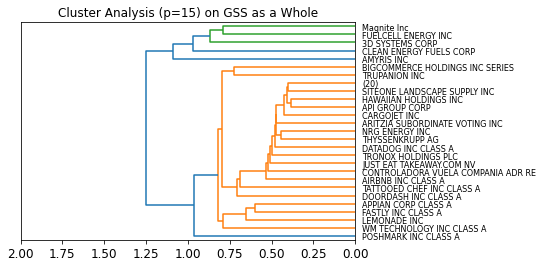

In [56]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(X)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
Z = plot_dendrogram(model, truncate_mode='level',labels=names,
                    p=15,leaf_font_size=12,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
plt.xlim([2, 0])
ax = plt.gca()
#plt.rc({'font.size':'12'})
plt.rc('axes', titlesize=12)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.title("Cluster Analysis (p=15) on GSS as a Whole")
plt.savefig(dirpath+"Total_Cluster.png") 


## Shorts

In [57]:
attrib

Security Description  Market Value %     ACUSIP
0   CONTROLADORA VUELA COMPANIA ADR RE            0.06  21240E105
1        ELEMENT FLEET MANAGEMENT CORP           0.051  SB7FNMQ21
2       ARITZIA SUBORDINATE VOTING INC           0.027  SBDCG2C28
3                       API GROUP CORP            0.03  00187Y100
4               BERRY GLOBAL GROUP INC            0.02  08579W103
5           META PLATFORMS INC CLASS A            0.03  30303M102
6                 ALPHABET INC CLASS C           0.047  SBYY88Y78
7   WILLSCOT MOBILE MINI HOLDINGS CORP            0.13  971378104
8                      THYSSENKRUPP AG           0.025  S56369275
9               DIAMONDBACK ENERGY INC           0.011  25278X109
10                     AON PLC CLASS A           0.084  SBLP1HW54
11  FIDELITY NATIONAL INFORMATION SERV           0.017  31620M106
12            WILLIS TOWERS WATSON PLC           0.021  BRSYCC972
13            JUST EAT TAKEAWAY.COM NV           0.016  SBKM1QM46
14                      NRG ENERGY INC           0.071  629377508
15                             ARAMARK           0.013  03852U106
18                             KELLOGG         -0.0024  487836108
19                   GENERAL MILLS INC         -0.0025  370334104
20         AMERICAN AIRLINES GROUP INC         -0.0019  02376R102
21                 DELTA AIR LINES INC         -0.0022  247361702
22        UNITED AIRLINES HOLDINGS INC         -0.0021  910047109
23               HAWAIIAN HOLDINGS INC         -0.0041  419879101
24          APARTMENT INCOME REIT CORP         -0.0012  03750L109
25                       TRUPANION INC        -0.00059  898202106
26                  FASTLY INC CLASS A        -0.00056  31188V100
27                 FUELCELL ENERGY INC        -0.00085  35952H601
28             CLEAN ENERGY FUELS CORP         -0.0012  184499101
29                 APPIAN CORP CLASS A         -0.0016  03782L101
30                        CARGOJET INC          -0.003  SBJXM6072
31           TATTOOED CHEF INC CLASS A         -0.0046  87663X102
32                        LEMONADE INC         -0.0024  52567D107
33                     3D SYSTEMS CORP         -0.0033  88554D205

Text(0.5, 0, '')

(2.0, 0.0)

Text(0.5, 1.0, "Cluster Analysis (p=15) on GSS's Short Positions")

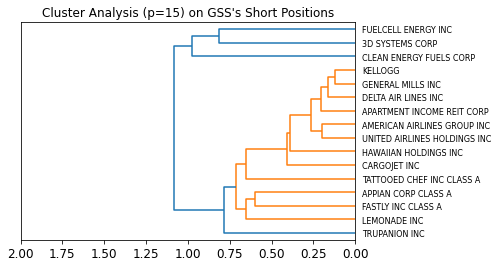

In [58]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(sX)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
sZ = plot_dendrogram(model, truncate_mode='level',labels=snames,
                    p=15,leaf_font_size=12,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
plt.xlim([2, 0])

ax = plt.gca()
#plt.rc({'font.size':'12'})
plt.rc('axes', titlesize=12)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.title("Cluster Analysis (p=15) on GSS\'s Short Positions")
plt.savefig(dirpath+"Short_Cluster.png") 



## Longs

Text(0.5, 0, '')

(2.0, 0.0)

Text(0.5, 1.0, "Cluster Analysis (p=15) on GSS's Long Positions")

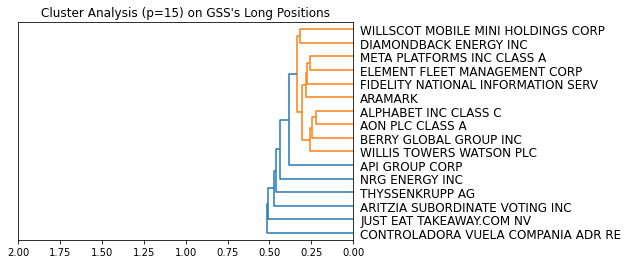

In [59]:
#model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(lX)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
lZ = plot_dendrogram(model, truncate_mode='level',labels=lnames,
                    p=15,leaf_font_size=12,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
#plt.ytick(fontsize=6)
plt.rc('ytick', labelsize=8) 
#plt.xlabel('xlabel', fontsize=18)
plt.xlim([2, 0])
plt.title("Cluster Analysis (p=15) on GSS\'s Long Positions")
plt.savefig(dirpath+"Long_Cluster.png") 

In [55]:
model.children_.shape[0]
model.labels_

15

array([ 8, 10,  9, 15, 11,  7, 14, 12, 13,  5,  6,  4,  3,  1,  2,  0],
      dtype=int64)

In [56]:
#residuals['AC-15 (longs)'] 
model.labels_.T

array([ 8, 10,  9, 15, 11,  7, 14, 12, 13,  5,  6,  4,  3,  1,  2,  0],
      dtype=int64)

In [57]:
residuals['AC-15 (longs)'].sort_values()

KeyError: 'AC-15 (longs)'

# Regional Style Factors

In [60]:
#dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
dirpath = 'C:/Users/jknechtel/Documents/Equity Risk Modeling/'
ffile = 'FactorTSraw_hist.xlsx'
#tab = 'bbTickers'

In [61]:
usfactors = pd.read_excel(dirpath+ffile,sheet_name='USAM')
cafactors = pd.read_excel(dirpath+ffile,sheet_name='CAND')
wldfactors = pd.read_excel(dirpath+ffile,sheet_name='WRLD')
usfactors.set_index('date',inplace=True)
usfactors.sort_index(inplace=True) 
cafactors.set_index('date',inplace=True)
cafactors.sort_index(inplace=True) 
wldfactors.set_index('date',inplace=True)
wldfactors.sort_index(inplace=True) 
us_frets = usfactors.pct_change()
ca_frets = cafactors.pct_change()
wld_frets = wldfactors.pct_change()

In [62]:
sdate
date
#us_frets = us_frets.loc[sdate:]
#ca_frets = ca_frets.loc[sdate:]
#wld_frets = wld_frets.loc[sdate:]

'2021-03-16'

'2022-03-03'

In [63]:

us_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(dirpath+'US Factor Detailed Stats.xlsx')

In [64]:

ca_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(dirpath+'CA Factor Detailed Stats.xlsx')

In [65]:
wld_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(dirpath+'WLD Factor Detailed Stats.xlsx')

In [66]:
us_frets

FMI_USAM_DIVYIELD  FMI_USAM_EARNYIELD  FMI_USAM_GROWTH  \
date                                                                 
2002-01-22                NaN                 NaN              NaN   
2002-01-23            0.00099             0.00043         -0.00012   
2002-01-24             0.0015             -0.0011          -0.0027   
2002-01-25            0.00013             0.00053          -0.0011   
2002-01-28            0.00092             0.00021          -0.0028   
...                       ...                 ...              ...   
2022-02-24            -0.0041             -0.0017           0.0073   
2022-02-25              0.002              0.0021         -0.00051   
2022-02-28             0.0021              0.0017           0.0046   
2022-03-01           -0.00048             0.00027           0.0041   
2022-03-02                0.0                 0.0              0.0   

            FMI_USAM_LEVERAGE  FMI_USAM_LIQUIDITY  FMI_USAM_MARKET  \
date                                                                 
2002-01-22                NaN                 NaN              NaN   
2002-01-23           -9.5e-05              0.0012            0.013   
2002-01-24            -0.0012               0.002           0.0074   
2002-01-25            -0.0002             0.00019           0.0024   
2002-01-28           -0.00046            -0.00058           0.0005   
...                       ...                 ...              ...   
2022-02-24            -0.0022              0.0014            0.021   
2022-02-25           -0.00021            -0.00019            0.024   
2022-02-28            -0.0013              0.0016           0.0005   
2022-03-01             0.0021             0.00088           -0.017   
2022-03-02                0.0                 0.0              0.0   

            FMI_USAM_MOMENTUM  FMI_USAM_PROFIT  FMI_USAM_REVERSAL  \
date                                                                
2002-01-22                NaN              NaN                NaN   
2002-01-23            7.3e-05           0.0021           -0.00016   
2002-01-24            -0.0045         -0.00027            -0.0019   
2002-01-25            0.00012         -0.00014            0.00022   
2002-01-28             0.0017          0.00067           -0.00041   
...                       ...              ...                ...   
2022-02-24             -0.002         -0.00066            -0.0037   
2022-02-25             0.0019           0.0005            -0.0019   
2022-02-28            -0.0019         -1.7e-05           -0.00019   
2022-03-01            5.7e-05          0.00069           -0.00095   
2022-03-02                0.0              0.0                0.0   

            FMI_USAM_SIZE  FMI_USAM_SMALLCAP  FMI_USAM_VALUE  \
date                                                           
2002-01-22            NaN                NaN             NaN   
2002-01-23        -0.0026            -0.0027         0.00088   
2002-01-24        -0.0014           -0.00077         -0.0018   
2002-01-25        -0.0006            -0.0011         0.00028   
2002-01-28       -0.00011            0.00085          0.0017   
...                   ...                ...             ...   
2022-02-24       -0.00034           -0.00072         -0.0063   
2022-02-25       -0.00036            -0.0016          0.0013   
2022-02-28       -0.00092            0.00018         -0.0038   
2022-03-01        -0.0014             0.0014         -0.0021   
2022-03-02            0.0                0.0             0.0   

            FMI_USAM_VOLATILITY  
date                             
2002-01-22                  NaN  
2002-01-23                0.007  
2002-01-24               0.0058  
2002-01-25               -0.002  
2002-01-28             -0.00079  
...                         ...  
2022-02-24                0.014  
2022-02-25               0.0027  
2022-02-28               0.0061  
2022-03-01              -0.0074  
2022-03-02                  0.0  

[5057 rows x 13 

In [67]:
cs.insertTable(us_frets.loc[sdate:],"EQ_USFactorIndices")
cs.insertTable(ca_frets.loc[sdate:],"EQ_CAFactorIndices")
cs.insertTable(wld_frets.loc[sdate:],"EQ_WLDFactorIndices")

In [68]:
pd.options.display.float_format = "{:,.2}".format  

uscorr = us_frets.loc[sdate:].corr()
uscorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'US Factor Correlations.xlsx')

In [69]:
pd.options.display.float_format = "{:,.2}".format  

cacorr = ca_frets.loc[sdate:].corr()
cacorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'CA Factor Correlations.xlsx')


In [70]:
pd.options.display.float_format = "{:,.2}".format  

wldcorr = wld_frets.loc[sdate:].corr()
wldcorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'WLD Factor Correlations.xlsx')

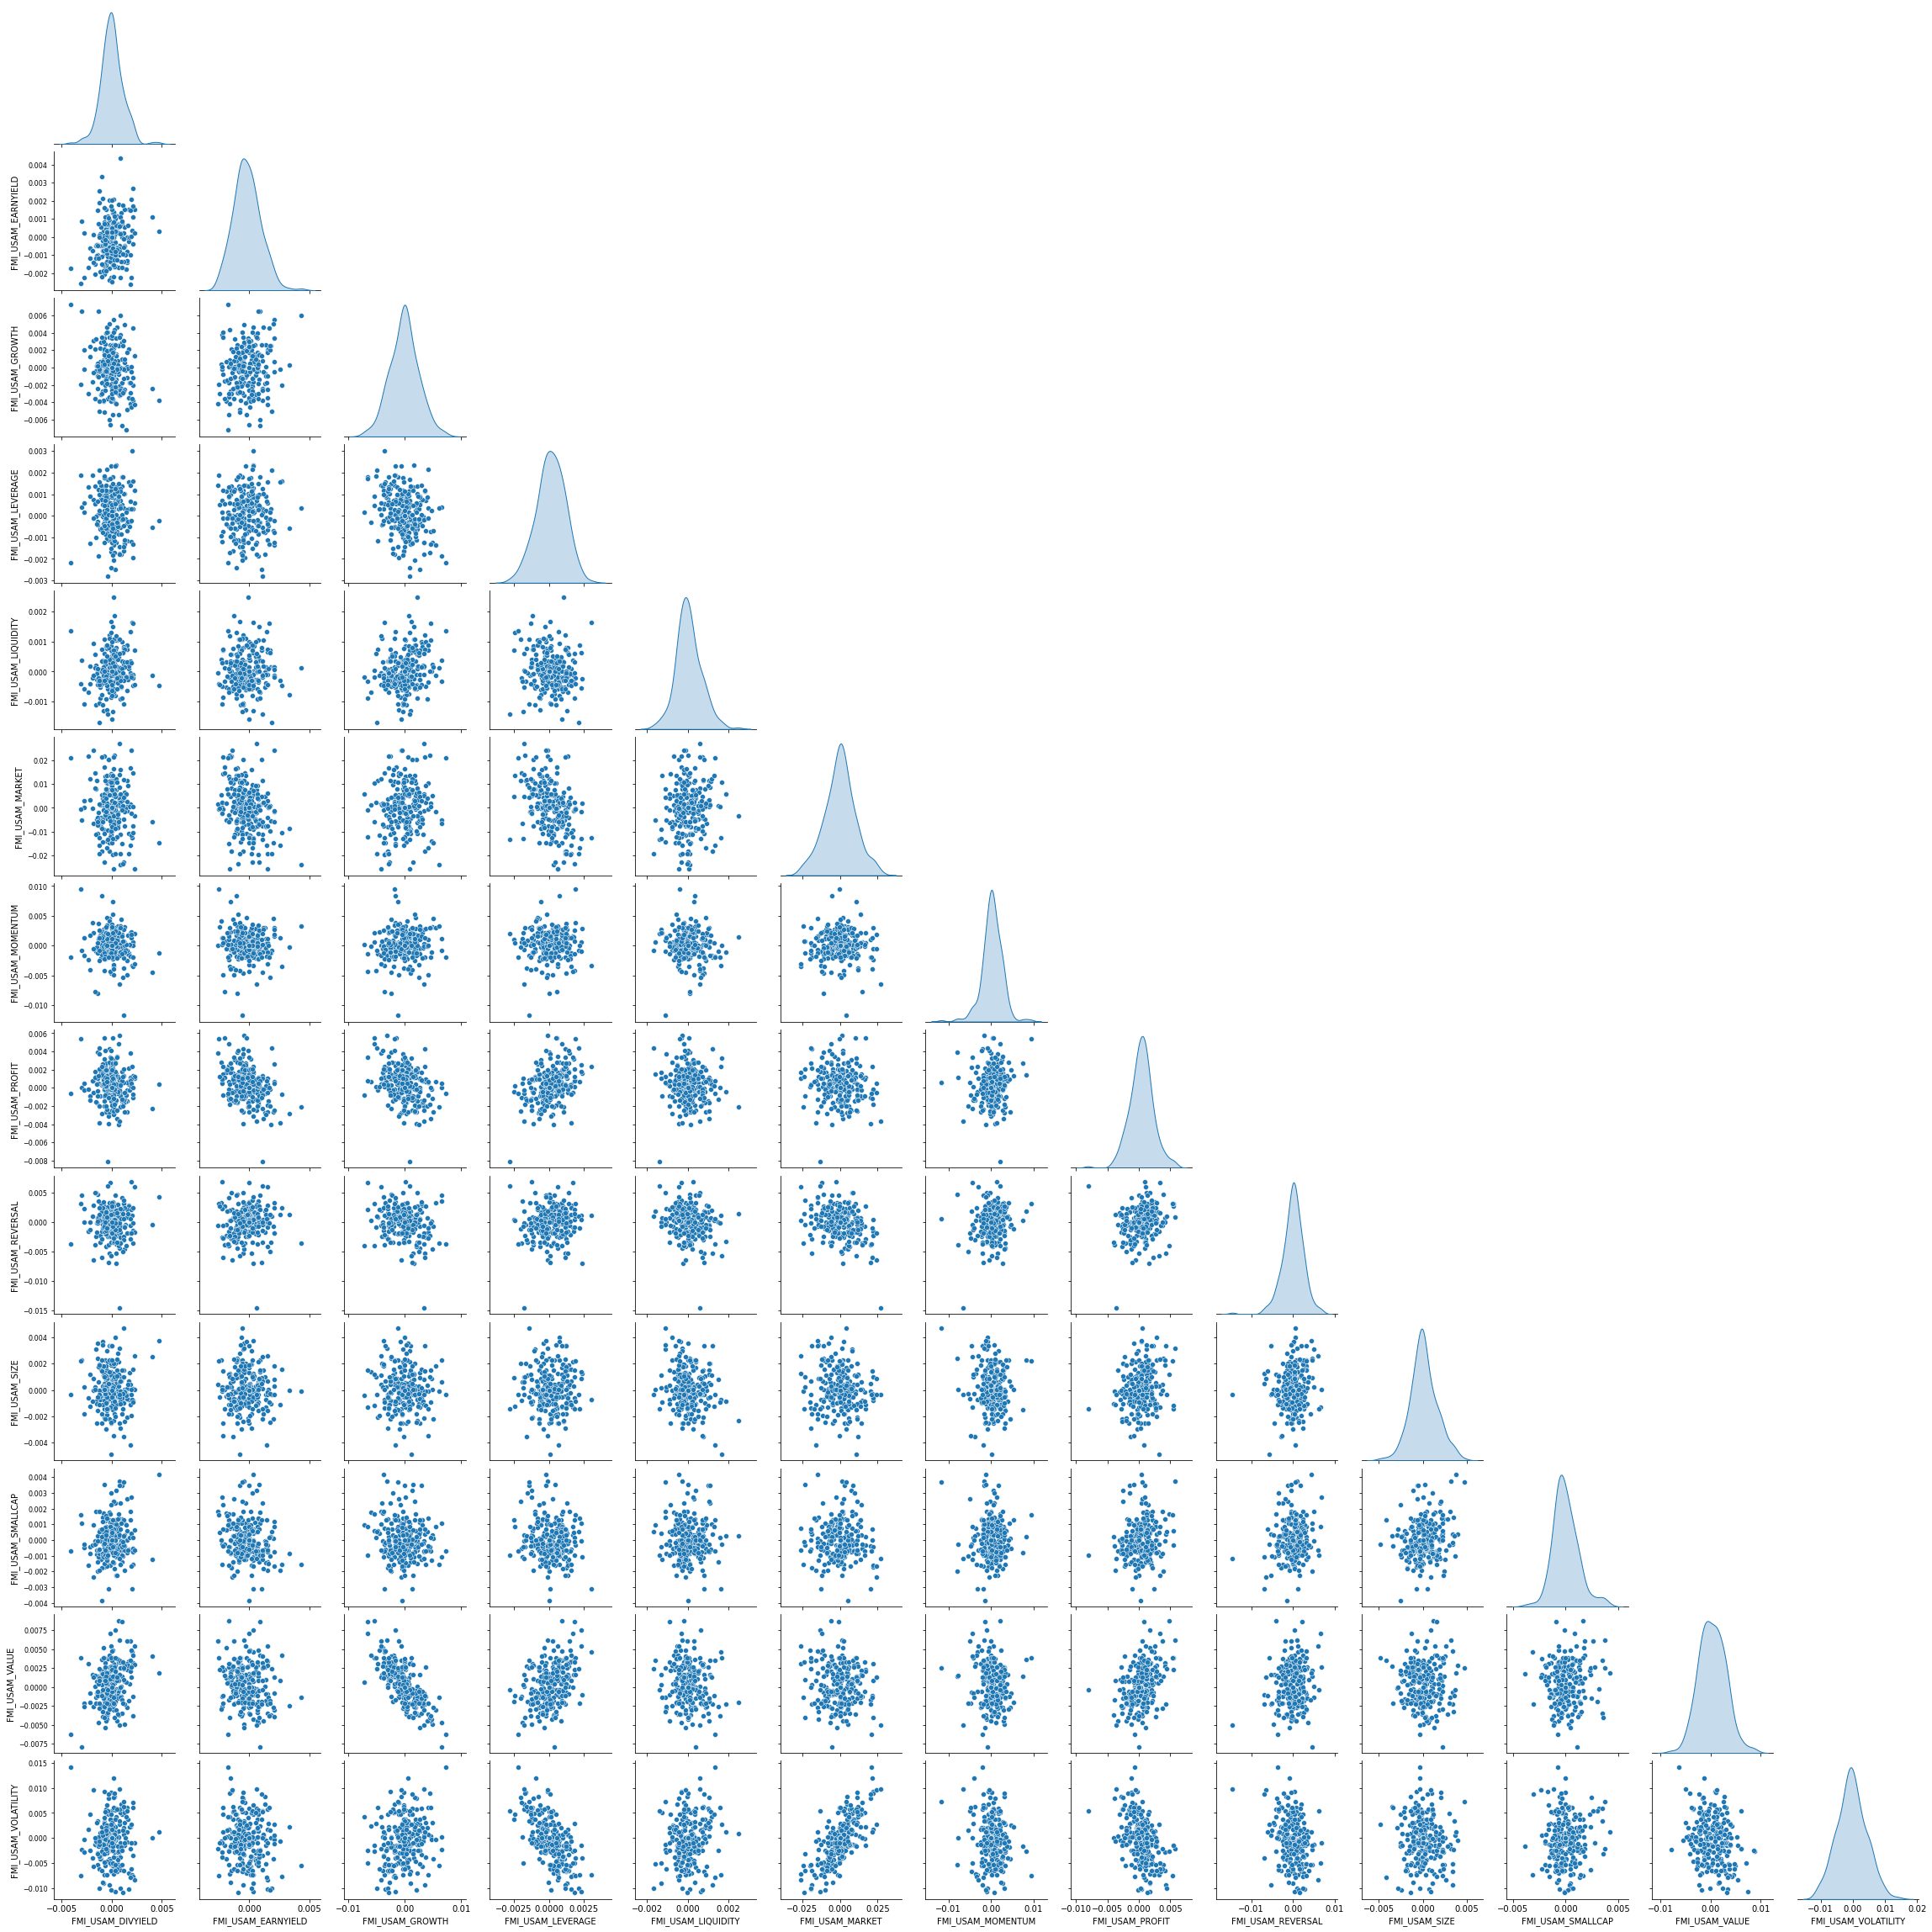

In [71]:

sns_plot = sns.pairplot(us_frets.loc[sdate:], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"USStyleFactors_PairPlot.png") 

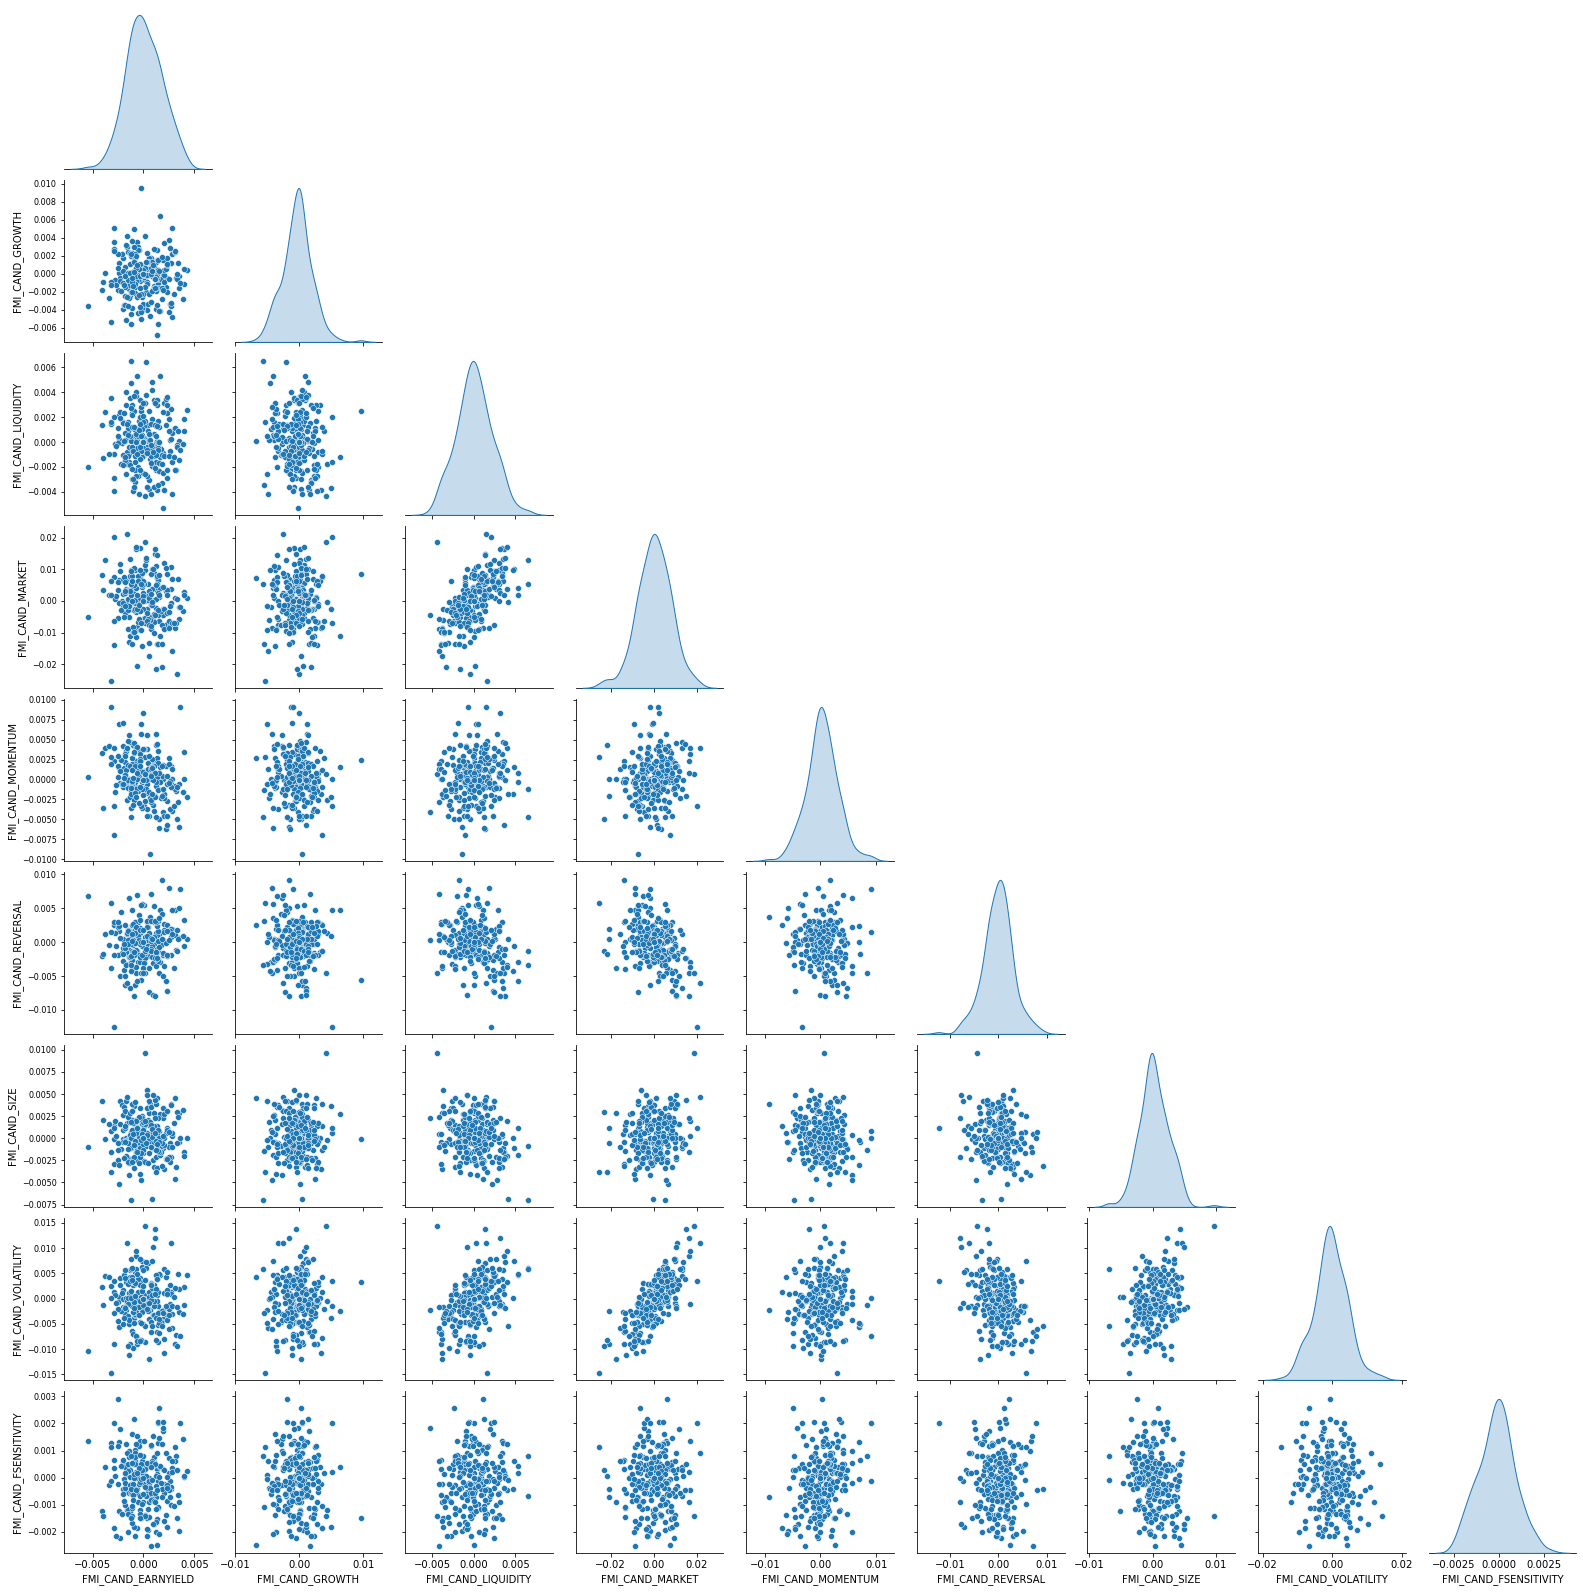

In [72]:
sns_plot = sns.pairplot(ca_frets.loc[sdate:], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"CAStyleFactors_PairPlot.png") 

In [97]:
dirpath

'C:/Users/jknechtel/Documents/Equity Risk Modeling/'

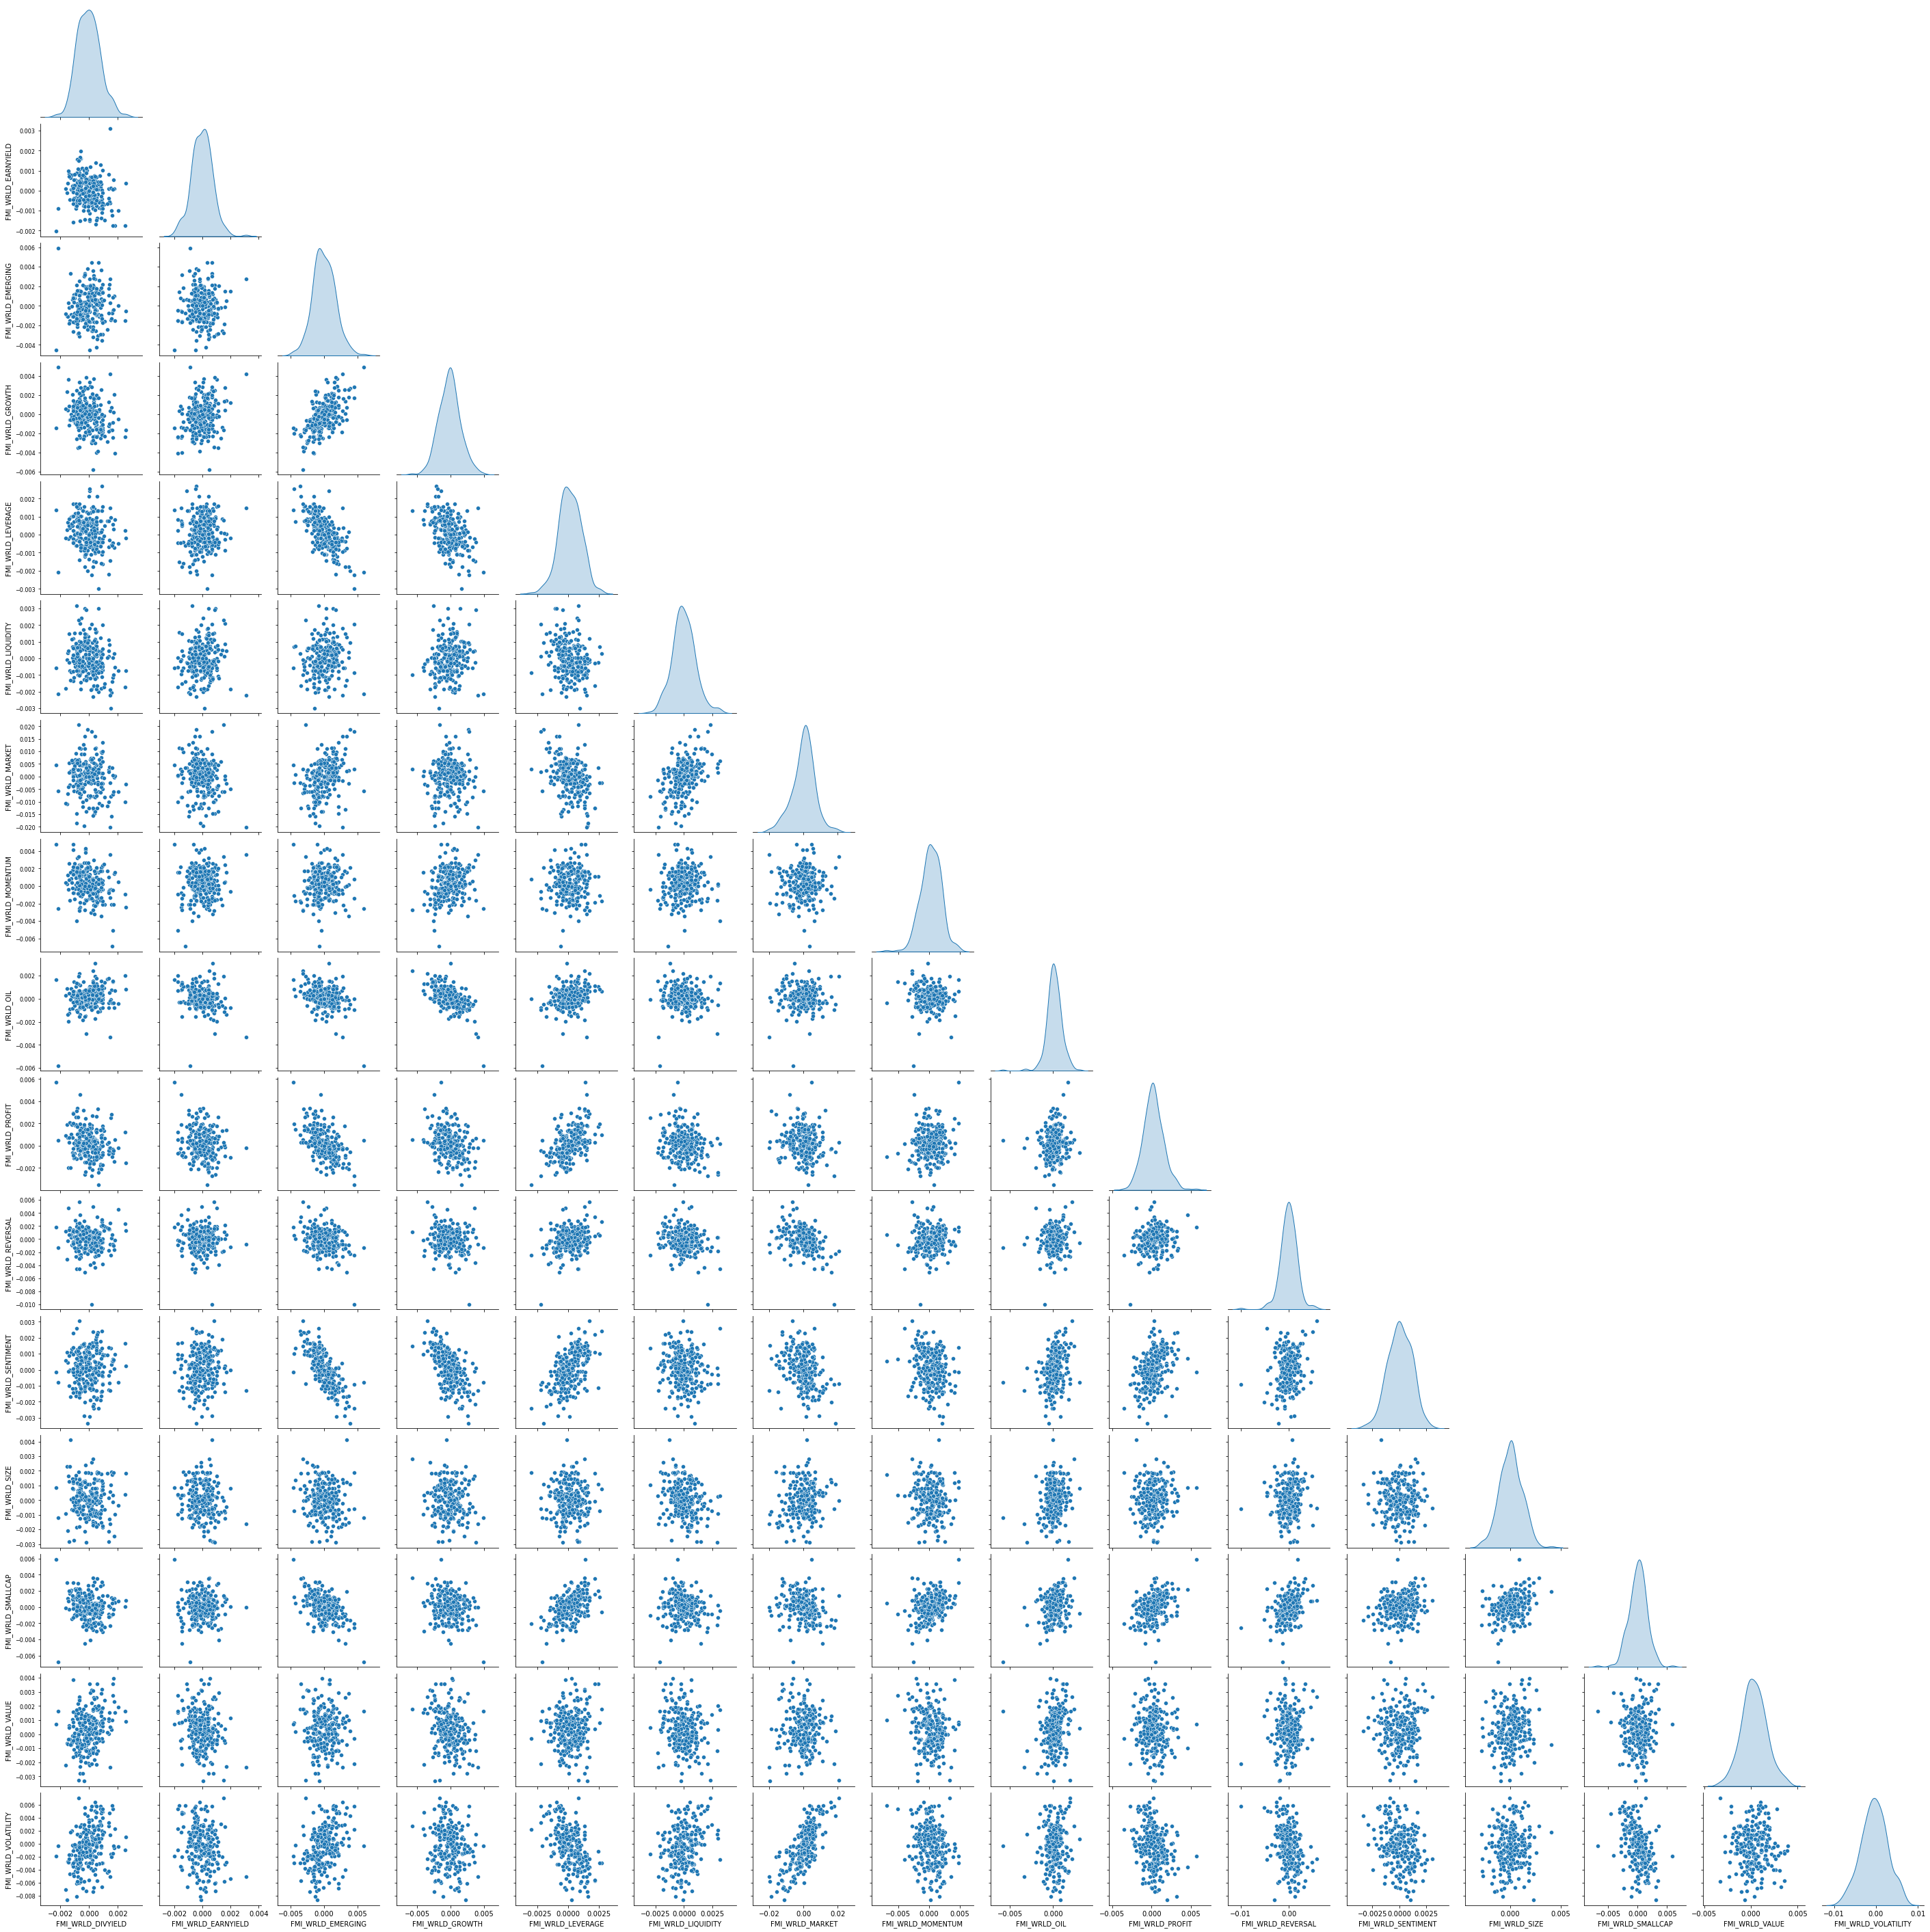

In [73]:
sns_plot = sns.pairplot(wld_frets.loc[sdate:], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"WldStyleFactors_PairPlot.png") 

In [76]:
mri.SimpleRets(usfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'US Factor Returns.xlsx')
mri.SimpleRets(cafactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'CA Factor Returns.xlsx')
mri.SimpleRets(wldfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'WLD Factor Returns.xlsx')

In [ ]:
usfactors.columns.str.lstrip('FMI_USAM')

## Factor Turbulence

In [75]:
import MacroRiskIndictators as mri

In [77]:
returns = us_frets.join(wld_frets).join(ca_frets)

In [78]:
corr = returns.corr()
pd.options.display.float_format = "{:,.2}".format  
corr.style.background_gradient(cmap='RdBu').set_precision(2)

C:\Users\JKNECH~1\AppData\Local\Temp/ipykernel_7596/1955355093.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='RdBu').set_precision(2)


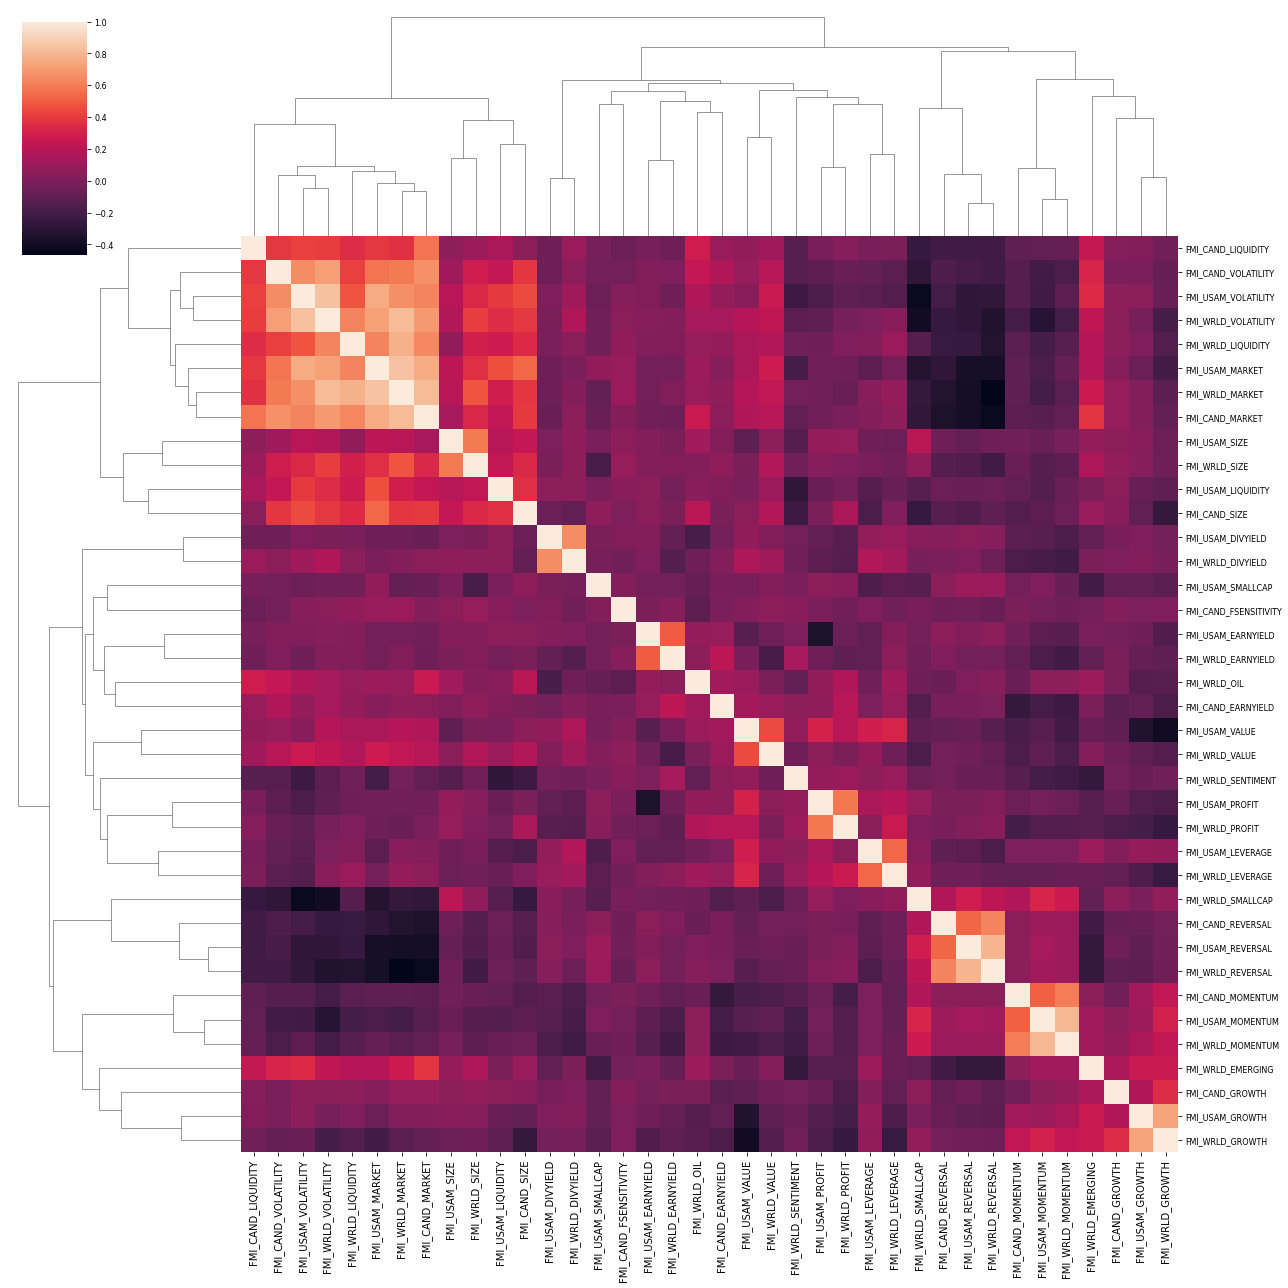

In [79]:
#import seaborn as sns
#import matplotlib.pyplot as plt
sns.clustermap(returns.corr(), figsize=(18,18),  yticklabels=True).savefig(dirpath+'Alladin Factor Cluster Map.png')

In [80]:
us_frets.index.name = 'Dates'
us_frets.reset_index(inplace=True)
turbulence = mri.calculate_turbulence(us_frets, initial_window_size=250)
turbulence['Turbulence'] = mri.exponential_smoother(raw_data=turbulence['Raw Turbulence'], half_life=12)
absorbRatio = mri.calculate_systemic_risk(us_frets, window_size=250)

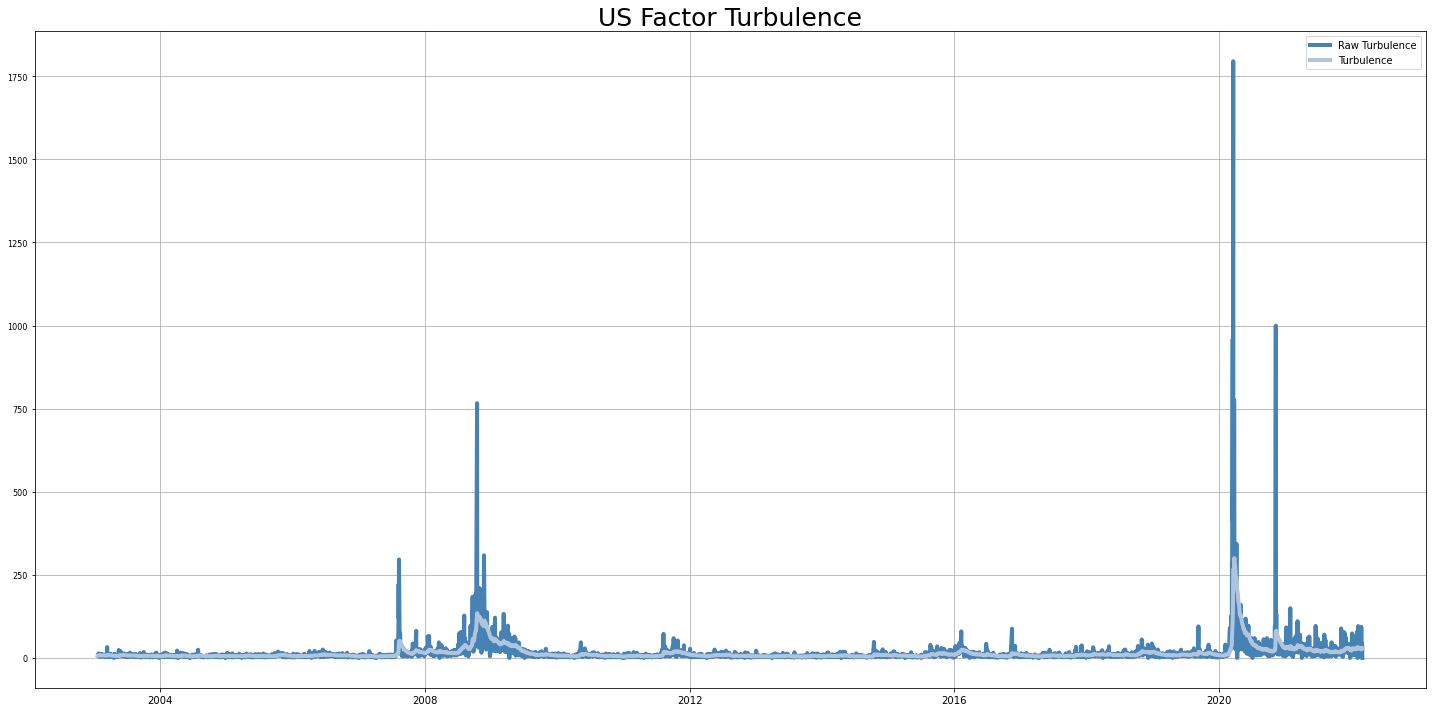

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Turbulence'}>)

In [81]:
utils.StandardLinePlot(turbulence.set_index('Dates'),"US Factor Turbulence",save=True)

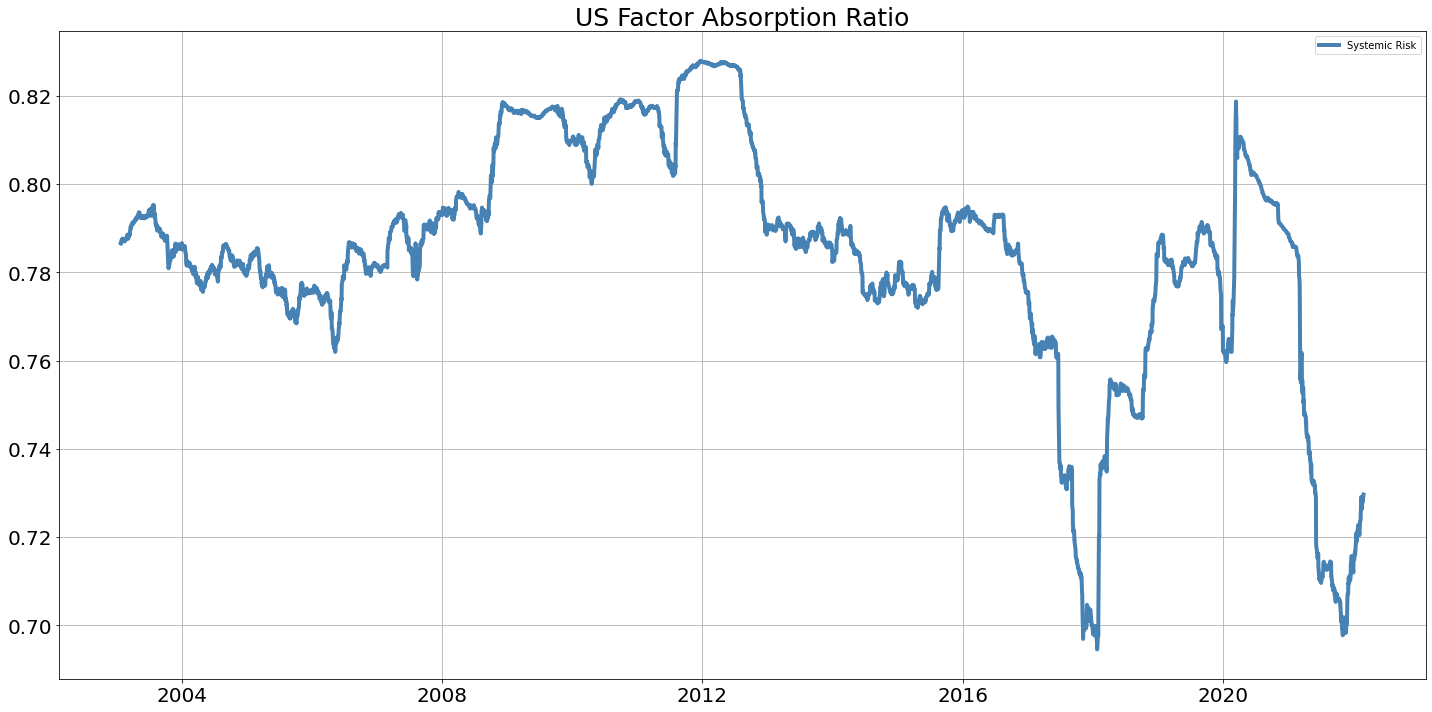

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Absorption Ratio'}>)

In [82]:

utils.StandardLinePlot(absorbRatio.set_index('Dates'),"US Factor Absorption Ratio",save=True)

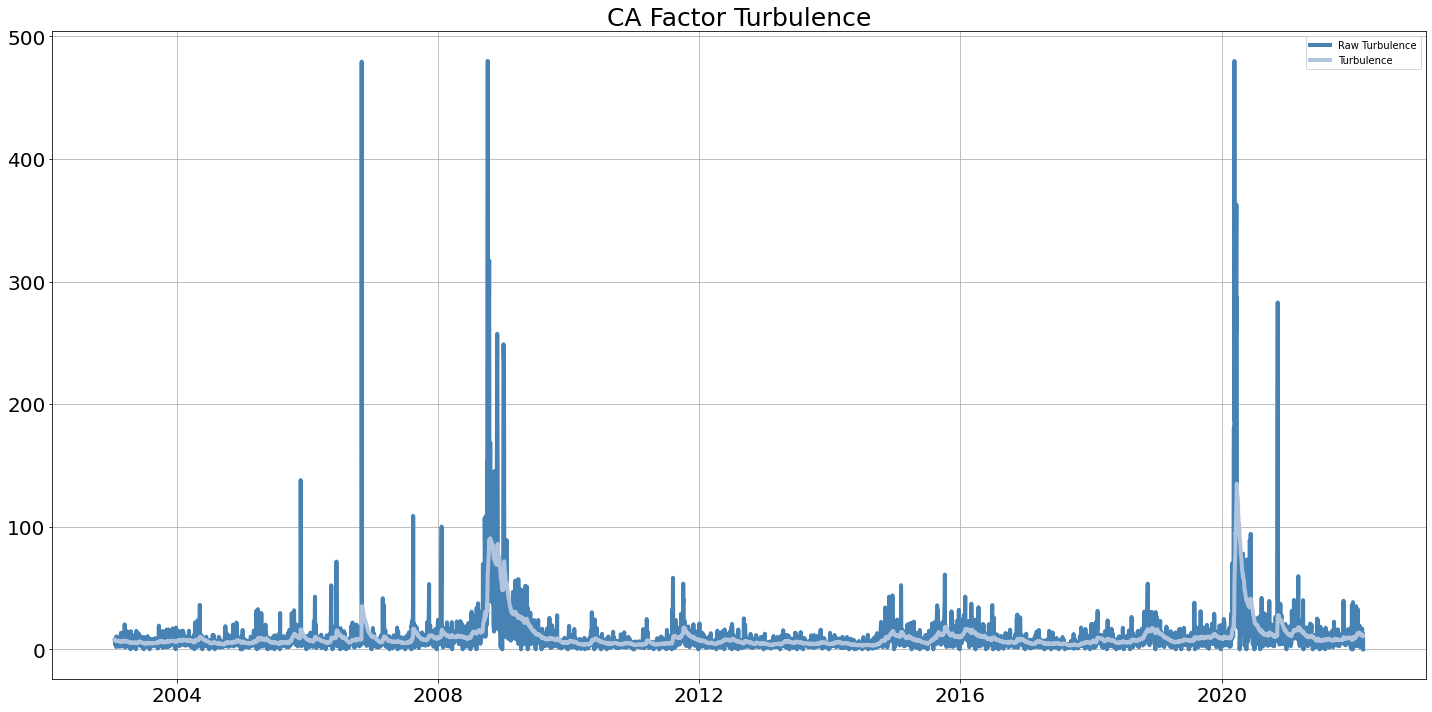

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'CA Factor Turbulence'}>)

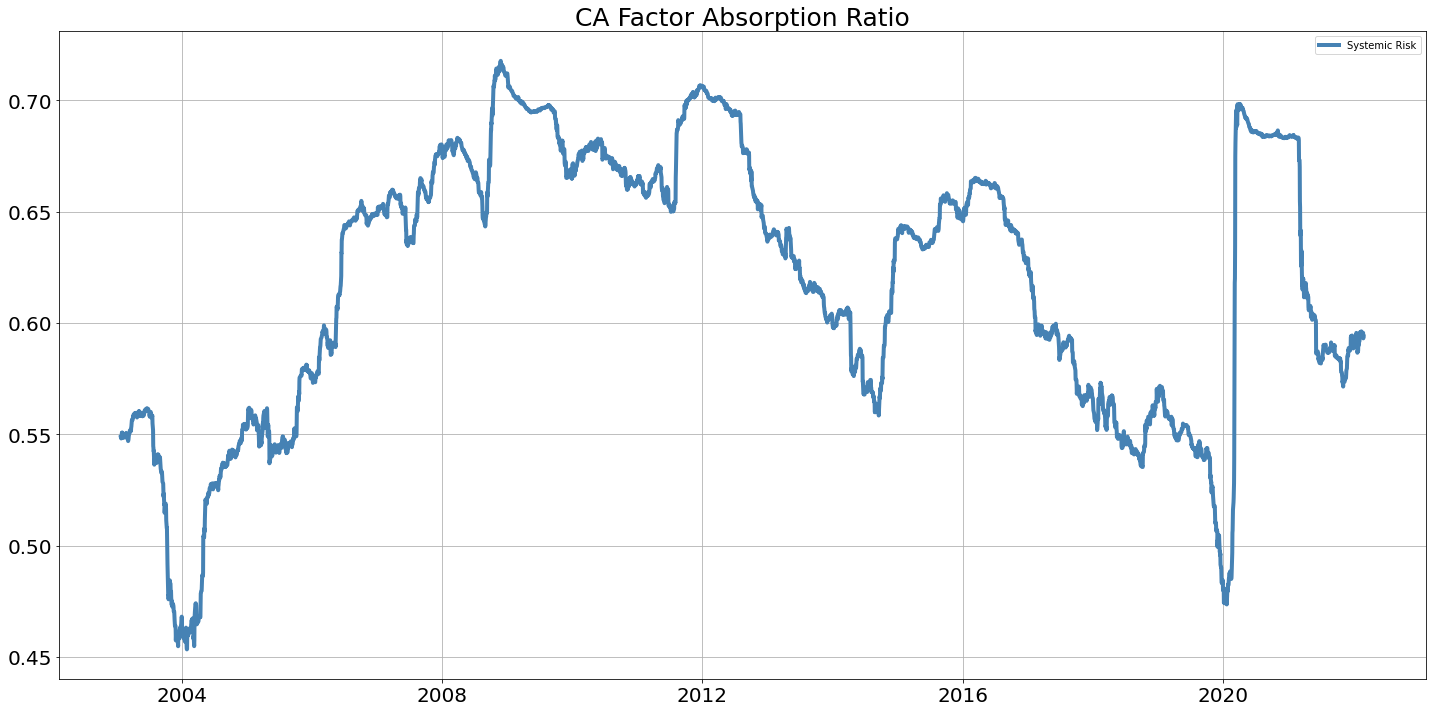

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'CA Factor Absorption Ratio'}>)

In [83]:
ca_frets.index.name = 'Dates'
ca_frets.reset_index(inplace=True)
turbulence = mri.calculate_turbulence(ca_frets, initial_window_size=250)
turbulence['Turbulence'] = mri.exponential_smoother(raw_data=turbulence['Raw Turbulence'], half_life=12)
absorbRatio = mri.calculate_systemic_risk(ca_frets, window_size=250)
utils.StandardLinePlot(turbulence.set_index('Dates'),"CA Factor Turbulence",save=True)
utils.StandardLinePlot(absorbRatio.set_index('Dates'),"CA Factor Absorption Ratio",save=True)

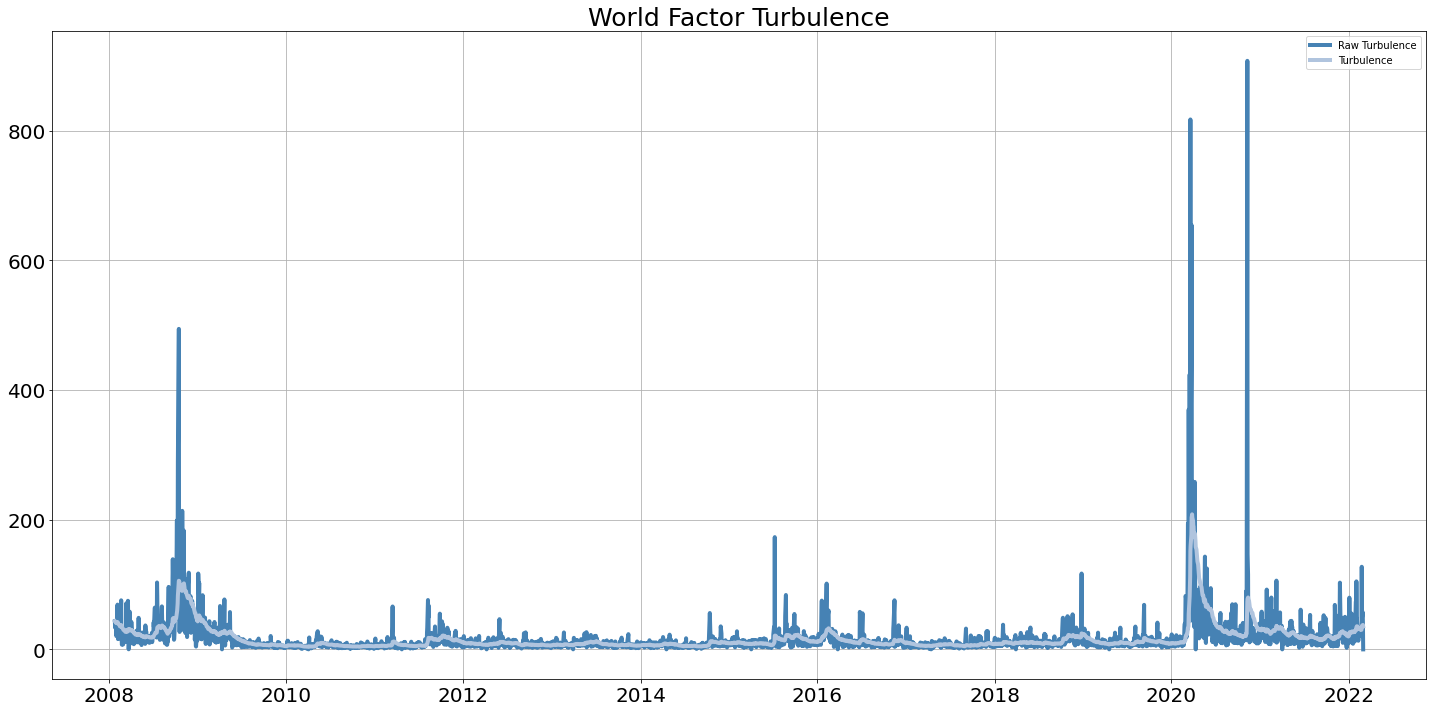

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'World Factor Turbulence'}>)

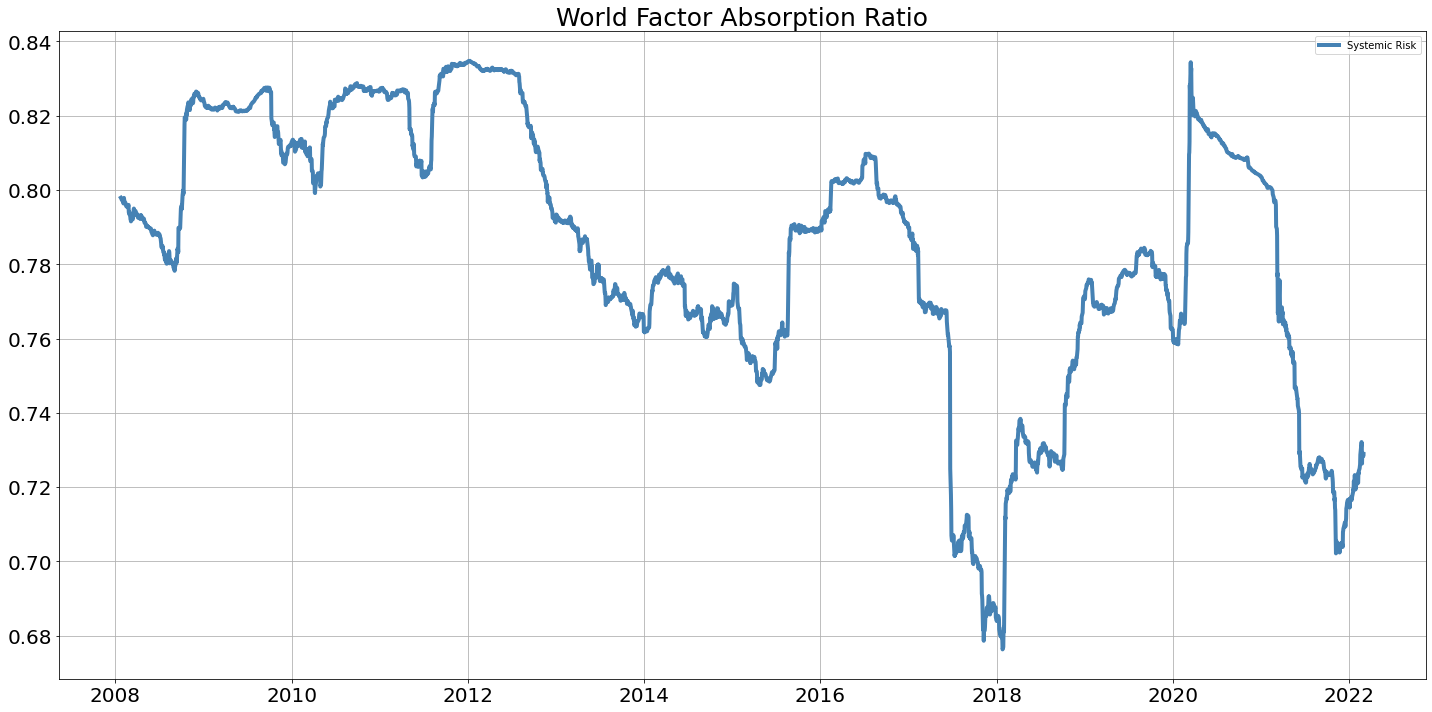

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'World Factor Absorption Ratio'}>)

In [84]:
wld_frets.index.name = 'Dates'
wld_frets.reset_index(inplace=True)
turbulence = mri.calculate_turbulence(wld_frets, initial_window_size=250)
turbulence['Turbulence'] = mri.exponential_smoother(raw_data=turbulence['Raw Turbulence'], half_life=12)
absorbRatio = mri.calculate_systemic_risk(wld_frets, window_size=250)
utils.StandardLinePlot(turbulence.set_index('Dates'),"World Factor Turbulence",save=True)
utils.StandardLinePlot(absorbRatio.set_index('Dates'),"World Factor Absorption Ratio",save=True)

## Factor Graphs

In [90]:
us_frets.set_index('Dates',inplace=True)
us_frets.dropna(how='all',inplace=True)

In [89]:
us_frets

Dates  FMI_USAM_DIVYIELD  FMI_USAM_EARNYIELD  FMI_USAM_GROWTH  \
0    2002-01-22                NaN                 NaN              NaN   
1    2002-01-23            0.00099             0.00043         -0.00012   
2    2002-01-24             0.0015             -0.0011          -0.0027   
3    2002-01-25            0.00013             0.00053          -0.0011   
4    2002-01-28            0.00092             0.00021          -0.0028   
...         ...                ...                 ...              ...   
5052 2022-02-24            -0.0041             -0.0017           0.0073   
5053 2022-02-25              0.002              0.0021         -0.00051   
5054 2022-02-28             0.0021              0.0017           0.0046   
5055 2022-03-01           -0.00048             0.00027           0.0041   
5056 2022-03-02                0.0                 0.0              0.0   

      FMI_USAM_LEVERAGE  FMI_USAM_LIQUIDITY  FMI_USAM_MARKET  \
0                   NaN                 NaN              NaN   
1              -9.5e-05              0.0012            0.013   
2               -0.0012               0.002           0.0074   
3               -0.0002             0.00019           0.0024   
4              -0.00046            -0.00058           0.0005   
...                 ...                 ...              ...   
5052            -0.0022              0.0014            0.021   
5053           -0.00021            -0.00019            0.024   
5054            -0.0013              0.0016           0.0005   
5055             0.0021             0.00088           -0.017   
5056                0.0                 0.0              0.0   

      FMI_USAM_MOMENTUM  FMI_USAM_PROFIT  FMI_USAM_REVERSAL  FMI_USAM_SIZE  \
0                   NaN              NaN                NaN            NaN   
1               7.3e-05           0.0021           -0.00016        -0.0026   
2               -0.0045         -0.00027            -0.0019        -0.0014   
3               0.00012         -0.00014            0.00022        -0.0006   
4                0.0017          0.00067           -0.00041       -0.00011   
...                 ...              ...                ...            ...   
5052             -0.002         -0.00066            -0.0037       -0.00034   
5053             0.0019           0.0005            -0.0019       -0.00036   
5054            -0.0019         -1.7e-05           -0.00019       -0.00092   
5055            5.7e-05          0.00069           -0.00095        -0.0014   
5056                0.0              0.0                0.0            0.0   

      FMI_USAM_SMALLCAP  FMI_USAM_VALUE  FMI_USAM_VOLATILITY  
0                   NaN             NaN                  NaN  
1               -0.0027         0.00088                0.007  
2              -0.00077         -0.0018               0.0058  
3               -0.0011         0.00028               -0.002  
4               0.00085          0.0017             -0.00079  
...                 ...             ...                  ...  
5052           -0.00072         -0.0063                0.014  
5053            -0.0016          0.0013               0.0027  
5054            0.00018         -0.0038               0.0061  
5055             0.0014         -0.0021              -0.0074  
5056                0.0             0.0                  0.0  

[5057 rows x 14 columns]

In [86]:
usfactors

FMI_USAM_DIVYIELD  FMI_USAM_EARNYIELD  FMI_USAM_GROWTH  \
Dates                                                                
2002-01-22               0.99                 1.1              0.9   
2002-01-23               0.99                 1.1              0.9   
2002-01-24                1.0                 1.1              0.9   
2002-01-25                1.0                 1.1              0.9   
2002-01-28                1.0                 1.1              0.9   
...                       ...                 ...              ...   
2022-02-24               0.91                0.98             0.84   
2022-02-25               0.91                0.98             0.84   
2022-02-28               0.91                0.98             0.85   
2022-03-01               0.91                0.98             0.85   
2022-03-02               0.91                0.98             0.85   

            FMI_USAM_LEVERAGE  FMI_USAM_LIQUIDITY  FMI_USAM_MARKET  \
Dates                                                                
2002-01-22                1.0                0.97              2.7   
2002-01-23                1.0                0.97              2.7   
2002-01-24                1.0                0.97              2.8   
2002-01-25                1.0                0.97              2.8   
2002-01-28                1.0                0.97              2.8   
...                       ...                 ...              ...   
2022-02-24                1.0                 1.0          2.4e+01   
2022-02-25                1.0                 1.0          2.5e+01   
2022-02-28                1.0                 1.0          2.5e+01   
2022-03-01                1.0                 1.0          2.5e+01   
2022-03-02                1.0                 1.0          2.5e+01   

            FMI_USAM_MOMENTUM  FMI_USAM_PROFIT  FMI_USAM_REVERSAL  \
Dates                                                               
2002-01-22                1.4              1.2               0.51   
2002-01-23                1.4              1.2               0.51   
2002-01-24                1.4              1.2               0.51   
2002-01-25                1.4              1.2               0.51   
2002-01-28                1.4              1.2               0.51   
...                       ...              ...                ...   
2022-02-24                1.6              1.7               0.26   
2022-02-25                1.6              1.7               0.26   
2022-02-28                1.6              1.7               0.26   
2022-03-01                1.6              1.7               0.26   
2022-03-02                1.6              1.7               0.26   

            FMI_USAM_SIZE  FMI_USAM_SMALLCAP  FMI_USAM_VALUE  \
Dates                                                          
2002-01-22           0.92                1.1             1.2   
2002-01-23           0.92                1.1             1.2   
2002-01-24           0.92                1.1             1.2   
2002-01-25           0.92                1.1             1.2   
2002-01-28           0.92                1.1             1.2   
...                   ...                ...             ...   
2022-02-24           0.83                1.1             1.6   
2022-02-25           0.83                1.1             1.6   
2022-02-28           0.83                1.1             1.6   
2022-03-01           0.83                1.1             1.6   
2022-03-02           0.83                1.1             1.6   

            FMI_USAM_VOLATILITY  
Dates                            
2002-01-22                  1.3  
2002-01-23                  1.3  
2002-01-24                  1.3  
2002-01-25                  1.3  
2002-01-28                  1.3  
...                         ...  
2022-02-24                  1.7  
2022-02-25                  1.7  
2022-02-28                  1.7  
2022-03-01                  1.7  
2022-03-02                  1.7  

[5057 rows x 13 

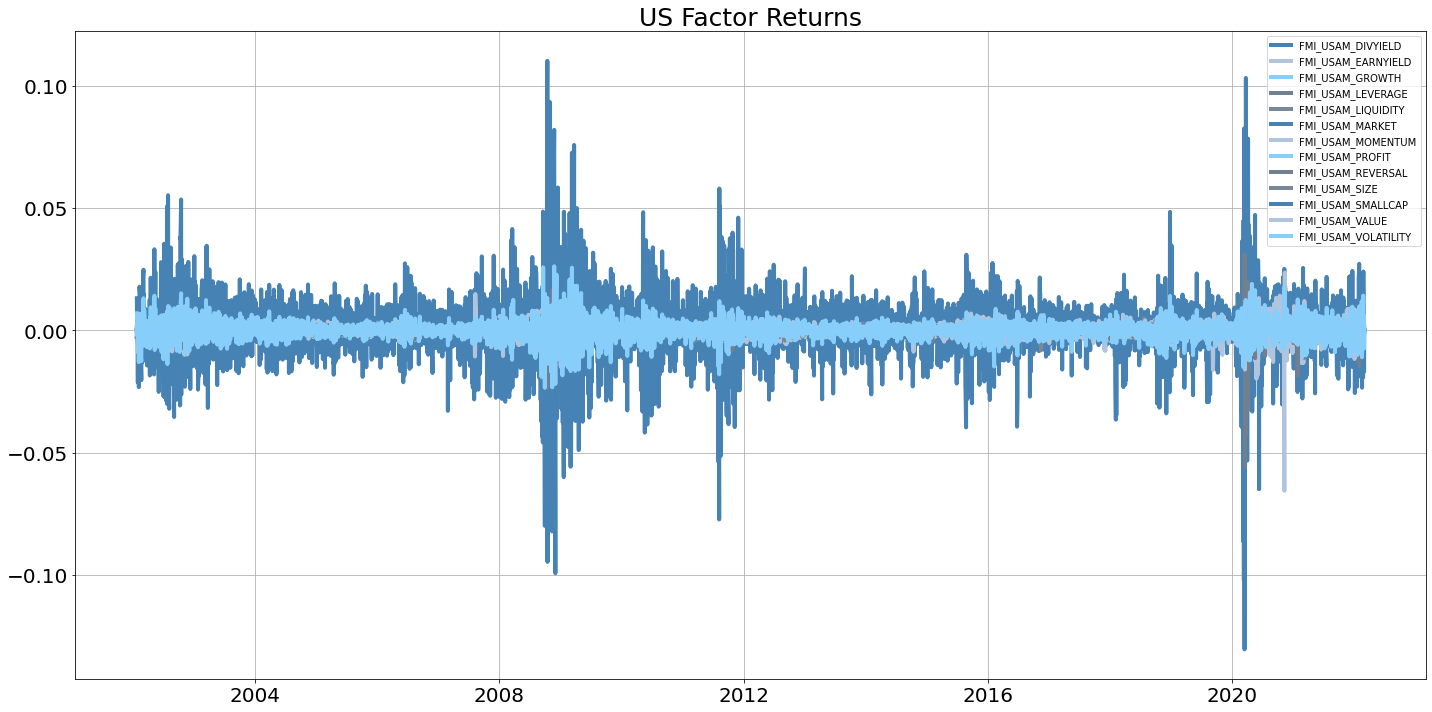

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Returns'}>)

In [91]:

utils.StandardLinePlot(us_frets,"US Factor Returns",save=True)

In [92]:
def MultiLinePlot(graph_data,plot_title,include_lines="",win=120,save=False):
    '''
    Standardized Line Plot with "onbrand" color scheme/theme
    Arguments:
        graph_data: needs to be a DF currently
        plot_title: string
        save: optional, names the file the plot_title
    Returns:
        fig, ax: for further customization if needed
    '''
    fig, ax = plt.subplots(figsize=(20,10))
    parameters = {'xtick.labelsize': 20,'ytick.labelsize': 20,'figure.titlesize': 25}
    plt.rcParams.update(parameters)
    
    if include_lines == 'hist':
        graph_data['Historical average'] = graph_data.expanding(min_periods=12).mean()
        # '#4682b4': steelblue  ,'#b0c4de': lightsteelblue ,'#87cefa':lightskyblue
        # '#708090': slategrey  ,'#778899': lightslategrey ,'#d3d3d3':lightgrey
        #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa','#708090','#778899']))
    elif include_lines == 'move':
        graph_data[[graph_data.columns[0]]]
        graph_data['Moving {} average'.format(win)] = graph_data[[graph_data.columns[0]]].rolling(win).mean()
        graph_data['-std'] = graph_data[[graph_data.columns[0]]].rolling(win).mean()-graph_data[[graph_data.columns[0]]].rolling(win).std()
        graph_data['+std'] = graph_data[[graph_data.columns[0]]].rolling(win).mean()+graph_data[[graph_data.columns[0]]].rolling(win).std()
        #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#b0c4de','#b0c4de']))
    #else:
        #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa','#708090','#778899']))
    
    #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa']))
    ax.plot(graph_data,linewidth=4)
    plt.grid()
    plt.title(plot_title,fontsize=25)
    try:
        plt.legend(graph_data.columns.values) 
    except:
        print("not a dataframe")
    plt.tight_layout()
    plt.show()
    if save:
        fig.savefig(plot_title+'.png',format="png")
    return fig, ax

In [93]:
import matplotlib.pyplot as plt

In [98]:
sdate

'2021-03-16'

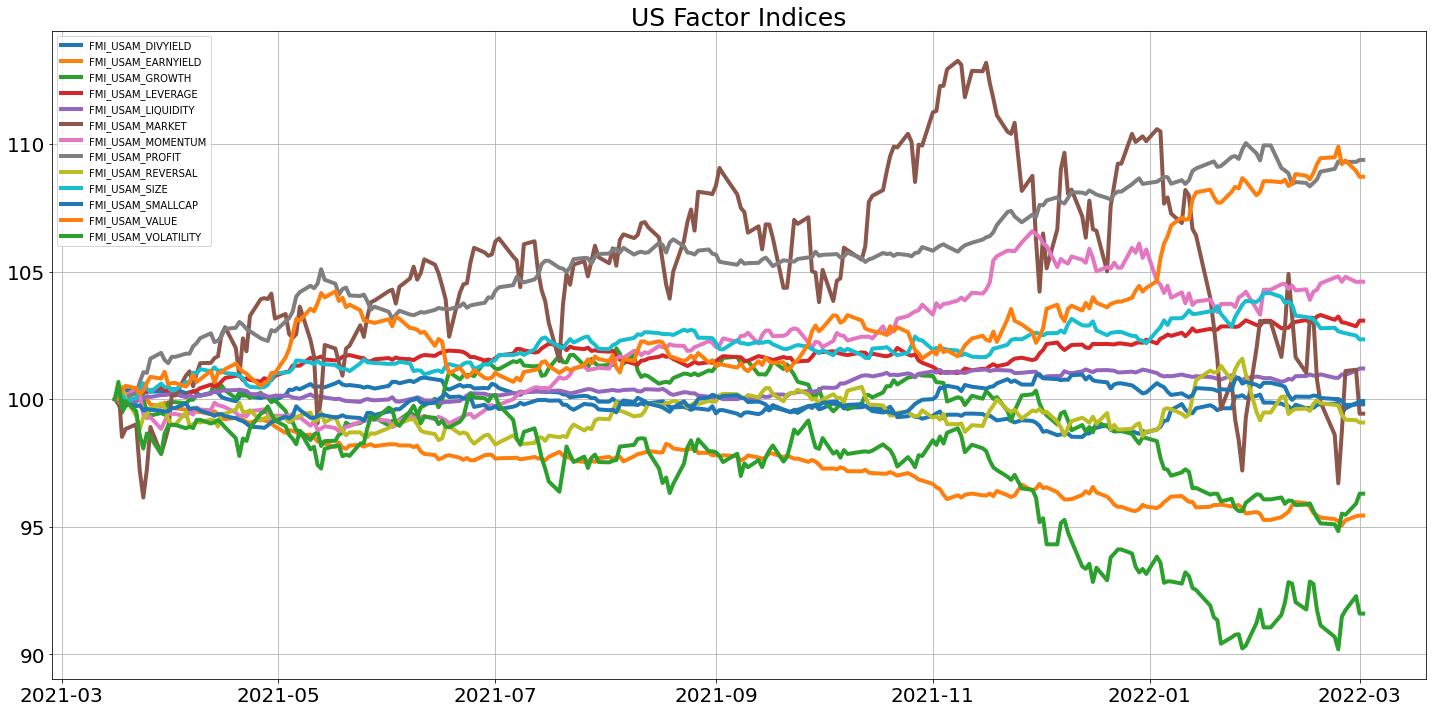

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Indices'}>)

In [99]:

MultiLinePlot(100*usfactors.loc[sdate:]/usfactors.loc[sdate],"US Factor Indices",save=True)

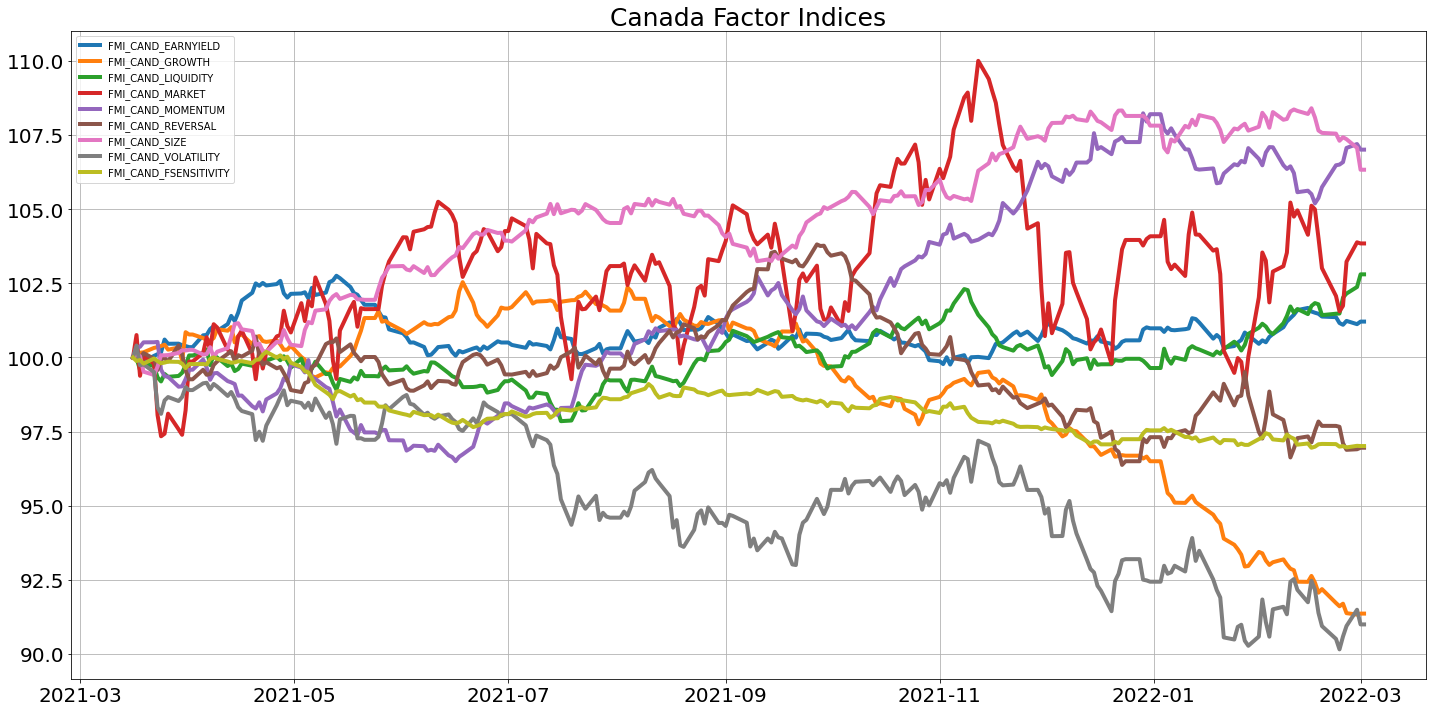

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Canada Factor Indices'}>)

In [95]:
MultiLinePlot(100*cafactors.loc[sdate:]/cafactors.loc[sdate],"Canada Factor Indices",save=True)

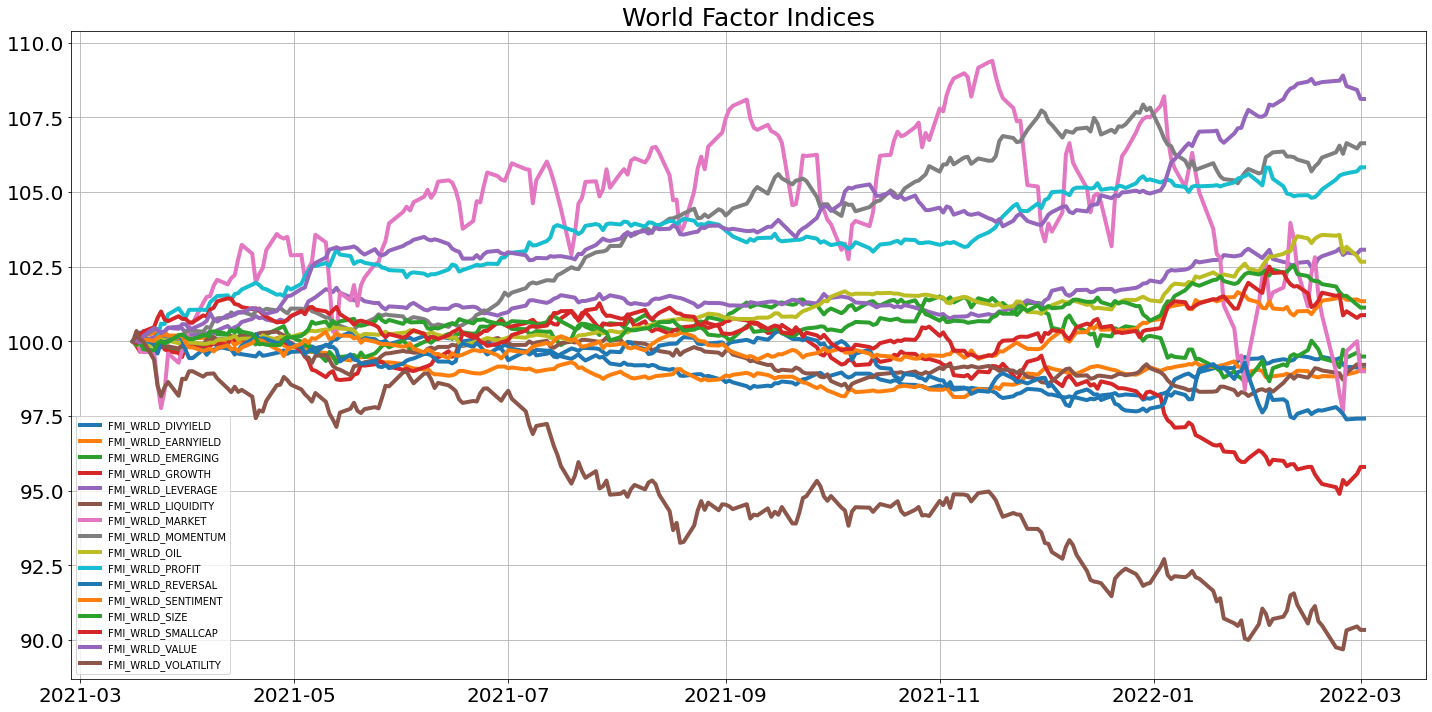

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'World Factor Indices'}>)

In [96]:
MultiLinePlot(100*wldfactors.loc[sdate:]/wldfactors.loc[sdate],"World Factor Indices",save=True)

# Sector by Factor loadings

In [3]:
dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
fbsfile = 'Factor Risk Breakdown.xlsx'

In [9]:
unclean = pd.read_excel(dirpath+fbsfile,sheet_name='ONGSS',skiprows=3).dropna(subset=['Filter Level 1'])
unclean

Title Filter Level 1          Filter Level 2  \
0                     ONGSS          ONGSS                     NaN   
1    Communication Services          ONGSS  Communication Services   
2                     STYLE          ONGSS  Communication Services   
3                    Market          ONGSS  Communication Services   
4                      Size          ONGSS  Communication Services   
..                      ...            ...                     ...   
378                INDUSTRY          ONGSS               Utilities   
379               Utilities          ONGSS               Utilities   
380                      FX          ONGSS               Utilities   
381                 CAD/CAD          ONGSS               Utilities   
382                 USD/CAD          ONGSS               Utilities   

    Filter Level 3  Level      Factor Type  Factor Level  Factor Vol  \
0              NaN 1.0000              NaN           NaN         NaN   
1              NaN 2.0000              NaN           NaN         NaN   
2            STYLE 3.0000              NaN           NaN         NaN   
3            STYLE 0.0000     Style Return        4.4550      0.1541   
4            STYLE 0.0000     Style Return        1.1322      0.0191   
..             ...    ...              ...           ...         ...   
378       INDUSTRY 3.0000              NaN           NaN         NaN   
379       INDUSTRY 0.0000  Industry Return        0.6549      0.0661   
380             FX 3.0000              NaN           NaN         NaN   
381             FX 0.0000               FX        0.0100         NaN   
382             FX 0.0000               FX           NaN      0.0581   

     Portfolio  Benchmark  Active  Portfolio (bp)  Benchmark (bp)  \
0          NaN        NaN     NaN      1,372.5650             NaN   
1          NaN        NaN     NaN        263.9339             NaN   
2       0.1838        NaN  0.1838        186.5287             NaN   
3       0.1193        NaN  0.1193        183.7853             NaN   
4       0.3022        NaN  0.3022         57.8342             NaN   
..         ...        ...     ...             ...             ...   
378     6.2917        NaN  6.2917         41.5829             NaN   
379     6.2917        NaN  6.2917         41.5829             NaN   
380        NaN        NaN     NaN         36.5565             NaN   
381    -6.2917        NaN -6.2917             NaN             NaN   
382     6.2917        NaN  6.2917         36.5565             NaN   

     Active (bp)  Portfolio (bp).1  Benchmark (bp).1  Active (bp).1  
0     1,372.5650        1,372.5650               NaN     1,372.5650  
1       263.9339          152.3655               NaN       152.3655  
2       186.5287          137.2263               NaN       137.2263  
3       183.7853          154.7120               NaN       154.7120  
4        57.8342            2.1802               NaN         2.1802  
..           ...               ...               ...            ...  
378      41.5829          -12.5528               NaN       -12.5528  
379      41.5829          -12.5528               NaN       -12.5528  
380      36.5565          -18.4022               NaN       -18.4022  
381          NaN               NaN               NaN            NaN  
382      36.5565          -18.4022               NaN       -18.4022  

[383 rows x 17 columns]

In [10]:
unclean.loc[unclean['Filter Level 3']=='STYLE']

Title Filter Level 1          Filter Level 2 Filter Level 3  Level  \
2         STYLE          ONGSS  Communication Services          STYLE 3.0000   
3        Market          ONGSS  Communication Services          STYLE 0.0000   
4          Size          ONGSS  Communication Services          STYLE 0.0000   
5    Volatility          ONGSS  Communication Services          STYLE 0.0000   
6      Momentum          ONGSS  Communication Services          STYLE 0.0000   
..          ...            ...                     ...            ...    ...   
369      Growth          ONGSS               Utilities          STYLE 0.0000   
370    Leverage          ONGSS               Utilities          STYLE 0.0000   
371   Sentiment          ONGSS               Utilities          STYLE 0.0000   
372    Emerging          ONGSS               Utilities          STYLE 0.0000   
373         Oil          ONGSS               Utilities          STYLE 0.0000   

      Factor Type  Factor Level  Factor Vol  Portfolio  Benchmark  Active  \
2             NaN           NaN         NaN     0.1838        NaN  0.1838   
3    Style Return        4.4550      0.1541     0.1193        NaN  0.1193   
4    Style Return        1.1322      0.0191     0.3022        NaN  0.3022   
5    Style Return        0.5723      0.0567    -0.0391        NaN -0.0391   
6    Style Return        3.7573      0.0459     0.0517        NaN  0.0517   
..            ...           ...         ...        ...        ...     ...   
369  Style Return        0.7656      0.0230     0.0509        NaN  0.0509   
370  Style Return        0.7294      0.0166    -0.0177        NaN -0.0177   
371  Style Return        0.9180      0.0182    -0.0104        NaN -0.0104   
372  Style Return        1.0798      0.0240    -0.0124        NaN -0.0124   
373  Style Return        1.0220      0.0161    -0.0342        NaN -0.0342   

     Portfolio (bp)  Benchmark (bp)  Active (bp)  Portfolio (bp).1  \
2          186.5287             NaN     186.5287          137.2263   
3          183.7853             NaN     183.7853          154.7120   
4           57.8342             NaN      57.8342            2.1802   
5           22.1702             NaN      22.1702          -12.9071   
6           23.6993             NaN      23.6993           -3.2007   
..              ...             ...          ...               ...   
369         11.6865             NaN      11.6865            0.1814   
370          2.9305             NaN       2.9305           -0.0546   
371          1.8901             NaN       1.8901            0.0227   
372          2.9809             NaN       2.9809           -0.7358   
373          5.4871             NaN       5.4871           -1.6745   

     Benchmark (bp).1  Active (bp).1  
2                 NaN       137.2263  
3                 NaN       154.7120  
4                 NaN         2.1802  
5                 NaN       -12.9071  
6                 NaN        -3.2007  
..                ...            ...  
369               NaN         0.1814  
370               NaN        -0.0546  
371               NaN         0.0227  
372               NaN        -0.7358  
373               NaN        -1.6745  

[170 rows x 17 columns]